# DATASETS OVERVIEW

In [ ]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
import pandas as pd
import math
     
# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_violin,
    plot_points_mean_std,
    visualize_image,
    plot_scatter_size_coded,
    plot_histogram,
    plot_histogram_by_group,
    plot_pie_chart,
    plot_bar,
    plot_xy_with_regression,
    plot_heatmap,
    plot_early_peakers_heatmap,
    plot_category_distribution_by_dataset
    )
from calcium_activity_characterization.io.csv_loader import load_dataset
from calcium_activity_characterization.analysis.statistics import (
    analyze_peak_intervals,
    build_neighbor_pair_stats,
    kw_dunn,
    brunner_pairs,
    wilcoxon_pairs,
    corr_nonparametric
)

sns.set_style(
    style="whitegrid",
    rc={"font.family": "sans-serif", "font.sans-serif": ["Arial"]}
)

# Define paths to control datasets
path = "D:/Mateo/Results"

# Load and merge datasets
peaks = load_dataset(path=path, file_name="merged_peaks.csv")
cells = load_dataset(path=path, file_name="merged_cells.csv")
events = load_dataset(path=path, file_name="merged_events.csv")
communications = load_dataset(path=path, file_name="merged_communications.csv")
experiments = load_dataset(path=path, file_name="experiments.csv")

# Define control datasets
cells_counts = cells.groupby("dataset")["Cell ID"].count()

experiments["Dataset cell density"] = experiments["dataset"].map(cells_counts)
events["Dataset cell density"] = events["dataset"].map(cells_counts)
cells["Dataset cell density"] = cells["dataset"].map(cells_counts)
peaks["Dataset cell density"] = peaks["dataset"].map(cells_counts)
communications["Dataset cell density"] = communications["dataset"].map(cells_counts)

experiments["dataset"] = experiments["dataset"].astype(str) + "_" + experiments["concentration"].astype(str)
peaks["dataset"] = peaks["dataset"].astype(str) + "_" + peaks["concentration"].astype(str)
cells["dataset"] = cells["dataset"].astype(str) + "_" + cells["concentration"].astype(str)
events["dataset"] = events["dataset"].astype(str) + "_" + events["concentration"].astype(str)
communications["dataset"] = communications["dataset"].astype(str) + "_" + communications["concentration"].astype(str)

global_events_counts = events[events["Event type"]=="GlobalEvent"].groupby("dataset")["Event ID"].count()
sequential_events_counts = events[events["Event type"]=="SequentialEvent"].groupby("dataset")["Event ID"].count()
individual_events_counts = peaks[peaks["In event"]=="individual"].groupby("dataset")["Peak ID"].count()

experiments["Number of global events"] = experiments["dataset"].map(global_events_counts)
experiments["Number of sequential events"] = experiments["dataset"].map(sequential_events_counts)
experiments["Number of individual events"] = experiments["dataset"].map(individual_events_counts)

experiments["Number of global events"] = experiments["Number of global events"].fillna(0).astype(int)
experiments["Number of sequential events"] = experiments["Number of sequential events"].fillna(0).astype(int)
experiments["Number of individual events"] = experiments["Number of individual events"].fillna(0).astype(int)

celldensity_experiments = experiments[(experiments["condition"] == "ACH - 1st run")&(experiments["time"] == "+2d")&(experiments["concentration"] == "10uM")].copy()
celldensity_events = events[(events["condition"] == "ACH - 1st run")&(events["time"] == "+2d")&(events["concentration"] == "10uM")].copy()
celldensity_cells = cells[(cells["condition"] == "ACH - 1st run")&(cells["time"] == "+2d")&(cells["concentration"] == "10uM")].copy()
celldensity_peaks = peaks[(peaks["condition"] == "ACH - 1st run")&(peaks["time"] == "+2d")&(peaks["concentration"] == "10uM")].copy()
celldensity_communications = communications[(communications["condition"] == "ACH - 1st run")&(communications["time"] == "+2d")&(communications["concentration"] == "10uM")].copy()

# datasets control spontaneous
control_experiments = experiments[(experiments["condition"] == "control - 1st run") &
                                  (experiments["Dataset cell density"] > 900)].copy()

control_peaks = peaks[peaks["dataset"].isin(control_experiments["dataset"])].copy()
control_cells = cells[cells["dataset"].isin(control_experiments["dataset"])].copy()
control_events = events[events["dataset"].isin(control_experiments["dataset"])].copy()
control_communications = communications[communications["dataset"].isin(control_experiments["dataset"])].copy()

# datasets reference
reference_dataset = experiments[experiments["dataset"] == "20250618_IS1_10uM"].copy()
reference_peaks = peaks[peaks["dataset"].isin(reference_dataset["dataset"])].copy()
reference_cells = cells[cells["dataset"].isin(reference_dataset["dataset"])].copy()
reference_events = events[events["dataset"].isin(reference_dataset["dataset"])].copy()
reference_communications = communications[communications["dataset"].isin(reference_dataset["dataset"])].copy()

"""
reference_dataset["dataset"] = reference_dataset["dataset"].astype(str) + "_" + reference_dataset["concentration"].astype(str)
reference_peaks["dataset"] = reference_peaks["dataset"].astype(str) + "_" + reference_peaks["concentration"].astype(str)
reference_cells["dataset"] = reference_cells["dataset"].astype(str) + "_" + reference_cells["concentration"].astype(str)
reference_events["dataset"] = reference_events["dataset"].astype(str) + "_" + reference_events["concentration"].astype(str)
reference_communications["dataset"] = reference_communications["dataset"].astype(str) + "_" + reference_communications["concentration"].astype(str)
"""

# datasets ACH chronic
ach_experiments = experiments[(experiments["condition"] == "ACH - 1st run") &
                               (experiments["Dataset cell density"] > 900) &
                               (experiments["time"] == "+2d")].copy()

ach_peaks = peaks[peaks["dataset"].isin(ach_experiments["dataset"])].copy()
ach_cells = cells[cells["dataset"].isin(ach_experiments["dataset"])].copy()
ach_events = events[events["dataset"].isin(ach_experiments["dataset"])].copy()
ach_communications = communications[communications["dataset"].isin(ach_experiments["dataset"])].copy()

"""
ach_experiments["dataset"] = ach_experiments["dataset"].astype(str) + "_" + ach_experiments["concentration"].astype(str)
ach_peaks["dataset"] = ach_peaks["dataset"].astype(str) + "_" + ach_peaks["concentration"].astype(str)
ach_cells["dataset"] = ach_cells["dataset"].astype(str) + "_" + ach_cells["concentration"].astype(str)
ach_events["dataset"] = ach_events["dataset"].astype(str) + "_" + ach_events["concentration"].astype(str)
ach_communications["dataset"] = ach_communications["dataset"].astype(str) + "_" + ach_communications["concentration"].astype(str)
"""
figure_path_control=Path("C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_3")
figure_path_ach=Path("C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_4")

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\io\csv_loader.py:33: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")


## Experiments nomenclature & available datasets

In [2]:
display(experiments[experiments["condition"] != "unuseful"])

path      date image_sequence experiment_type  \
0    D:/Mateo/20250326/Output/IS1  20250326            IS1     spontaneous   
1    D:/Mateo/20250326/Output/IS2  20250326            IS2     spontaneous   
2    D:/Mateo/20250326/Output/IS3  20250326            IS3     spontaneous   
3    D:/Mateo/20250326/Output/IS4  20250326            IS4     spontaneous   
4    D:/Mateo/20250404/Output/IS1  20250404            IS1     spontaneous   
5    D:/Mateo/20250404/Output/IS2  20250404            IS2     spontaneous   
6    D:/Mateo/20250404/Output/IS3  20250404            IS3     spontaneous   
9   D:/Mateo/20250409/Output/IS01  20250409           IS01     spontaneous   
10  D:/Mateo/20250409/Output/IS02  20250409           IS02     spontaneous   
11  D:/Mateo/20250409/Output/IS03  20250409           IS03     spontaneous   
12  D:/Mateo/20250409/Output/IS04  20250409           IS04     spontaneous   
13  D:/Mateo/20250409/Output/IS05  20250409           IS05     spontaneous   
14  D:/Mateo/20250409/Output/IS06  20250409           IS06     spontaneous   
15  D:/Mateo/20250409/Output/IS07  20250409           IS07     spontaneous   
16  D:/Mateo/20250409/Output/IS08  20250409           IS08     spontaneous   
17  D:/Mateo/20250409/Output/IS09  20250409           IS09     spontaneous   
18  D:/Mateo/20250409/Output/IS10  20250409           IS10     spontaneous   
19  D:/Mateo/20250409/Output/IS11  20250409           IS11     spontaneous   
20  D:/Mateo/20250409/Output/IS12  20250409           IS12     spontaneous   
25   D:/Mateo/20250416/Output/IS4  20250416            IS4     spontaneous   
26   D:/Mateo/20250416/Output/IS5  20250416            IS5     spontaneous   
28   D:/Mateo/20250424/Output/IS1  20250424            IS1      stimulated   
29   D:/Mateo/20250424/Output/IS2  20250424            IS2      stimulated   
30   D:/Mateo/20250424/Output/IS3  20250424            IS3      stimulated   
31   D:/Mateo/20250424/Output/IS4  20250424            IS4      stimulated   
32   D:/Mateo/20250424/Output/IS5  20250424            IS5      stimulated   
33   D:/Mateo/20250424/Output/IS6  20250424            IS6      stimulated   
34   D:/Mateo/20250424/Output/IS7  20250424            IS7      stimulated   
35   D:/Mateo/20250424/Output/IS8  20250424            IS8      stimulated   
38  D:/Mateo/20250501/Output/IS02  20250501           IS02      stimulated   
39  D:/Mateo/20250501/Output/IS03  20250501           IS03      stimulated   
40  D:/Mateo/20250501/Output/IS04  20250501           IS04      stimulated   
42  D:/Mateo/20250501/Output/IS06  20250501           IS06      stimulated   
43  D:/Mateo/20250501/Output/IS07  20250501           IS07      stimulated   
44  D:/Mateo/20250501/Output/IS08  20250501           IS08      stimulated   
45  D:/Mateo/20250501/Output/IS09  20250501           IS09      stimulated   
47   D:/Mateo/20250618/Output/IS1  20250618            IS1      stimulated   
48   D:/Mateo/20250618/Output/IS2  20250618            IS2      stimulated   
49   D:/Mateo/20250618/Output/IS3  20250618            IS3      stimulated   
50   D:/Mateo/20250618/Output/IS4  20250618            IS4      stimulated   
51   D:/Mateo/20250618/Output/IS5  20250618            IS5      stimulated   
52   D:/Mateo/20250618/Output/IS6  20250618            IS6      stimulated   
53   D:/Mateo/20250618/Output/IS7  20250618            IS7      stimulated   
54   D:/Mateo/20250618/Output/IS8  20250618            IS8      stimulated   
55  D:/Mateo/20250624/Output/IS01  20250624           IS01     spontaneous   
57  D:/Mateo/20250624/Output/IS03  20250624           IS03     spontaneous   
59  D:/Mateo/20250624/Output/IS05  20250624           IS05      stimulated   
60  D:/Mateo/20250624/Output/IS06  20250624           IS06      stimulated   
61  D:/Mateo/20250624/Output/IS07  20250624           IS07      stimulated   
62  D:/Mateo/20250624/Output/IS08  20250624           IS08      stimulated   
63  D:/Mateo/20250624/Output/IS09  20250624        

In [3]:
display(ach_experiments)

path      date image_sequence experiment_type  \
34   D:/Mateo/20250424/Output/IS7  20250424            IS7      stimulated   
47   D:/Mateo/20250618/Output/IS1  20250618            IS1      stimulated   
48   D:/Mateo/20250618/Output/IS2  20250618            IS2      stimulated   
49   D:/Mateo/20250618/Output/IS3  20250618            IS3      stimulated   
50   D:/Mateo/20250618/Output/IS4  20250618            IS4      stimulated   
53   D:/Mateo/20250618/Output/IS7  20250618            IS7      stimulated   
54   D:/Mateo/20250618/Output/IS8  20250618            IS8      stimulated   
59  D:/Mateo/20250624/Output/IS05  20250624           IS05      stimulated   
60  D:/Mateo/20250624/Output/IS06  20250624           IS06      stimulated   
61  D:/Mateo/20250624/Output/IS07  20250624           IS07      stimulated   
62  D:/Mateo/20250624/Output/IS08  20250624           IS08      stimulated   
63  D:/Mateo/20250624/Output/IS09  20250624           IS09      stimulated   
64  D:/Mateo/20250624/Output/IS10  20250624           IS10      stimulated   

        condition  confluency concentration time              dataset  \
34  ACH - 1st run     1200000         100nM  +2d   20250424_IS7_100nM   
47  ACH - 1st run     1000000          10uM  +2d    20250618_IS1_10uM   
48  ACH - 1st run     1000000          10uM  +2d    20250618_IS2_10uM   
49  ACH - 1st run     1000000           1uM  +2d     20250618_IS3_1uM   
50  ACH - 1st run     1000000           1uM  +2d     20250618_IS4_1uM   
53  ACH - 1st run     1000000          10nM  +2d    20250618_IS7_10nM   
54  ACH - 1st run     1000000          10nM  +2d    20250618_IS8_10nM   
59  ACH - 1st run     1000000          10uM  +2d   20250624_IS05_10uM   
60  ACH - 1st run     1000000          10uM  +2d   20250624_IS06_10uM   
61  ACH - 1st run     1000000           1uM  +2d    20250624_IS07_1uM   
62  ACH - 1st run     1000000           1uM  +2d    20250624_IS08_1uM   
63  ACH - 1st run     1000000         100nM  +2d  20250624_IS09_100nM   
64  ACH - 1st run     1000000         100nM  +2d  20250624_IS10_100nM   

    Dataset cell density  Number of global events  \
34                  1061                        2   
47                  1161                        4   
48                  1039                        4   
49                  1235                        6   
50                  1101                        5   
53                  1099                        4   
54                   920                        4   
59                  1068                        5   
60                   996                        6   
61                  1229                        7   
62                   986                        5   
63                  1244                        6   
64                  1250                        7   

    Number of sequential events  Number of individual events  
34                         1025                         1130  
47                          564                         1104  
48                          404                          838  
49                          699                          576  
50                          479                          681  
53                          626                          994  
54                          375                          463  
59                          392                          881  
60                          171                          441  
61                          246                          454  
62                          282                          704  
63                          250                          733  
64                          421                          591

## FIGURE 3.1

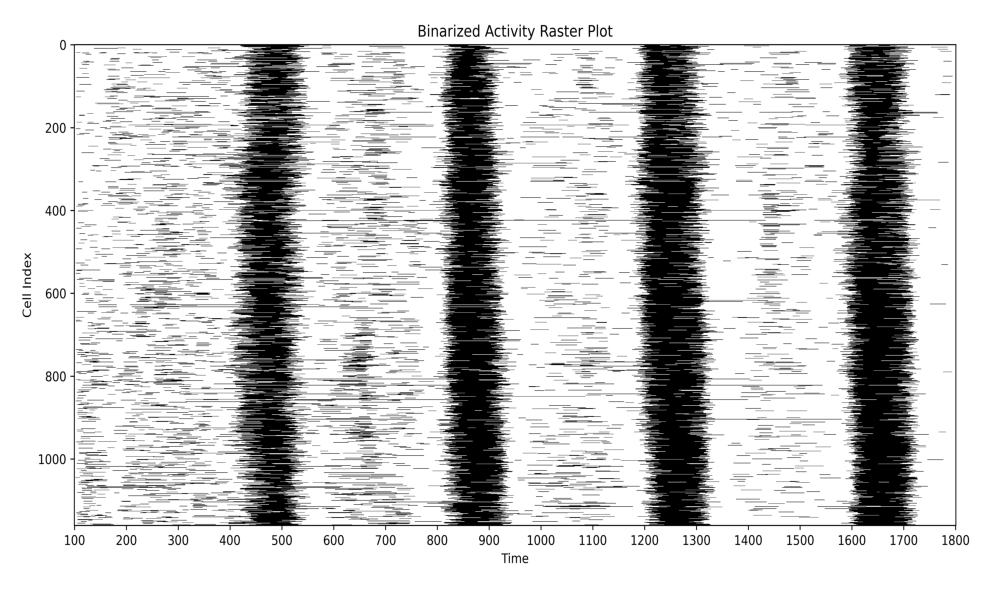

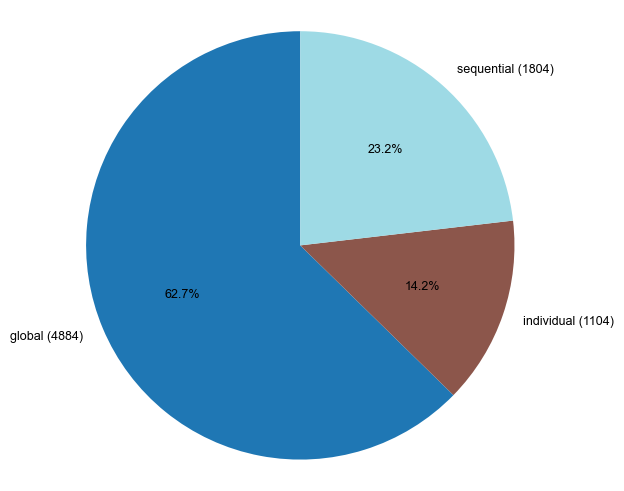

[2025-08-26 13:13:57] [INFO] calcium: plot_histogram_by_group: removed 9 outliers out of 7792 on 'Duration (s)' (lower=-197, upper=328)


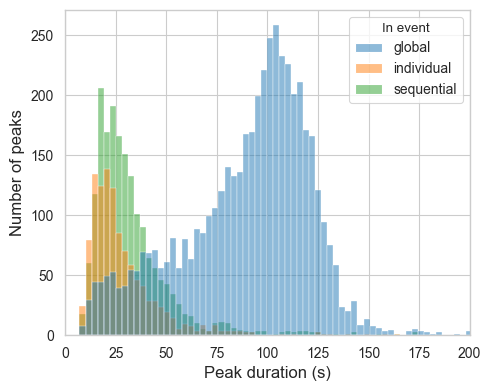

[2025-08-26 13:13:58] [INFO] calcium: plot_histogram_by_group: removed 4 outliers out of 7792 on 'Prominence (noise std units)' (lower=-464.98, upper=688.1)


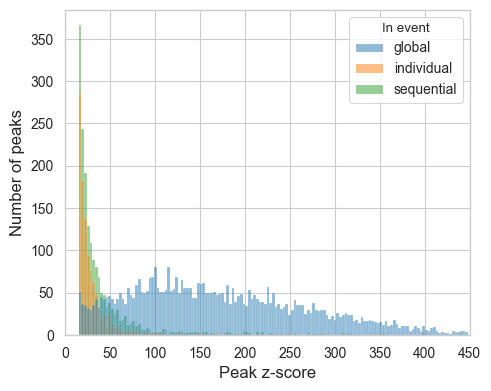

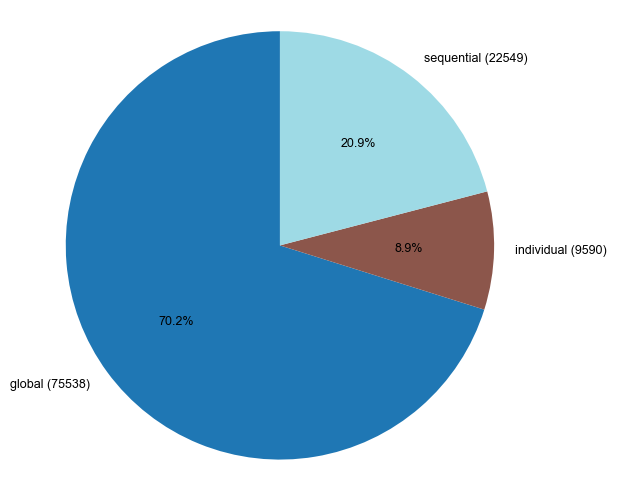

[2025-08-26 13:13:59] [INFO] calcium: plot_histogram_by_group: removed 32 outliers out of 107677 on 'Duration (s)' (lower=-173, upper=303)


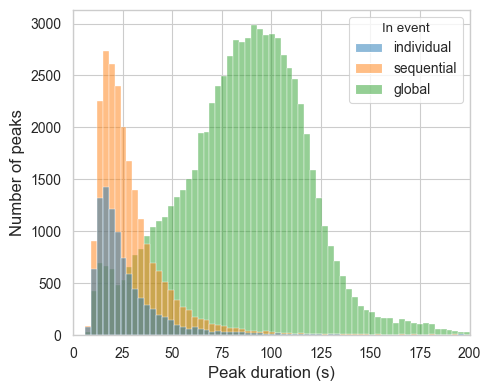

[2025-08-26 13:14:00] [INFO] calcium: plot_histogram_by_group: removed 15 outliers out of 107677 on 'Prominence (noise std units)' (lower=-578.8, upper=862.5)


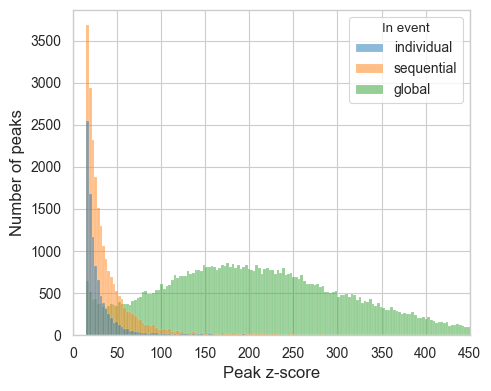

In [4]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="signal-processing/raster_plot.png",
    figsize=(10, 6)
)

plot_pie_chart(
    df=reference_peaks,
    column="In event",
    palette="tab20",
    save_svg_path=figure_path_ach / "figure_3_1/single_peaks_distribution_by_event.svg"
)

reference_peaks["In event"] = reference_peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=reference_peaks,
    value_column="Duration (s)",
    group_column="In event",
    xlabel="Peak duration (s)",
    ylabel="Number of peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 200),
    save_svg_path=figure_path_ach / "figure_3_1/single_peaks_duration_by_event.svg"
)
plot_histogram_by_group(
    df=reference_peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    xlabel="Peak z-score",
    ylabel="Number of peaks",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 450),
    save_svg_path=figure_path_ach / "figure_3_1/single_peaks_prominence_by_event.svg"
)

plot_pie_chart(
    df=ach_peaks,
    column="In event",
    palette="tab20",
    save_svg_path=figure_path_ach / "figure_3_1/control_peaks_distribution_by_event.svg"
)

ach_peaks["In event"] = ach_peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=ach_peaks,
    value_column="Duration (s)",
    group_column="In event",
    ylabel="Number of peaks",
    xlabel="Peak duration (s)",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 200),
    save_svg_path=figure_path_ach / "figure_3_1/control_peaks_duration_by_event.svg"
)
plot_histogram_by_group(
    df=ach_peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    ylabel="Number of peaks",
    xlabel="Peak z-score",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    x_axis_boundaries=(0, 450),
    save_svg_path=figure_path_ach / "figure_3_1/control_peaks_prominence_by_event.svg"
)

## FIGURE 3.2

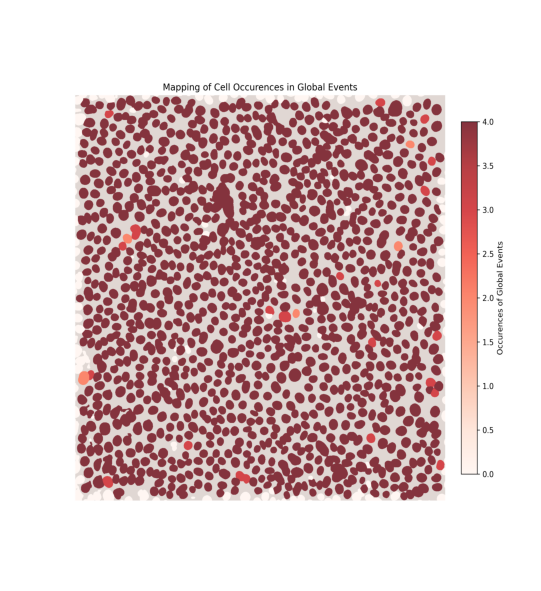

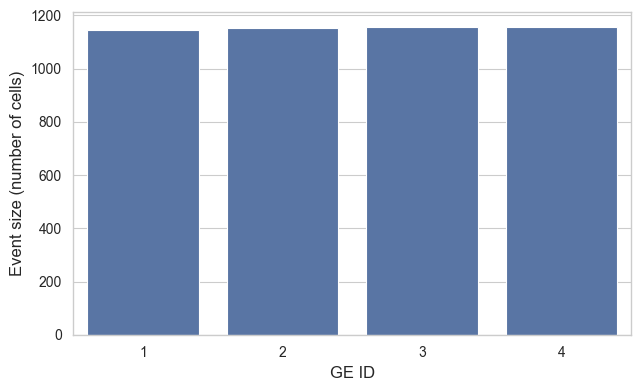

In [5]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_occurences_in_global_events_overlay.png",
    figsize=(5.5, 6)
)

reference_global_events = reference_events[reference_events["Event type"] == "GlobalEvent"].copy()
reference_global_events["% of cells involved"] = 100 * reference_global_events["Number of cells involved"] / len(cells)

plot_bar(
    df=reference_global_events,
    axis_column="Event ID",
    value_column="Number of cells involved",
    ylabel="Event size (number of cells)",
    xlabel="GE ID",
    rotation=0,
    save_svg_path=figure_path_ach / "figure_3_2/reference_global_events_cells_involved_barplot.svg",
)

control_global_events = ach_events[ach_events["Event type"] == "GlobalEvent"].copy()

cell_counts = cells.groupby("dataset").size().rename("Total number of cells").reset_index()
control_global_events = control_global_events.merge(cell_counts, on="dataset", how="left")

control_global_events["% of cells involved"] = (100 * control_global_events["Number of cells involved"] / control_global_events["Total number of cells"]).round(2)

[2025-08-26 13:14:04] [INFO] calcium: plot_points_mean_std: N=13 for Event ID=1
[2025-08-26 13:14:04] [INFO] calcium: plot_points_mean_std: N=13 for Event ID=2
[2025-08-26 13:14:04] [INFO] calcium: plot_points_mean_std: N=12 for Event ID=3
[2025-08-26 13:14:04] [INFO] calcium: plot_points_mean_std: N=12 for Event ID=4
[2025-08-26 13:14:04] [INFO] calcium: plot_points_mean_std: N=8 for Event ID=5
[2025-08-26 13:14:04] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=6
[2025-08-26 13:14:04] [INFO] calcium: plot_points_mean_std: N=2 for Event ID=7


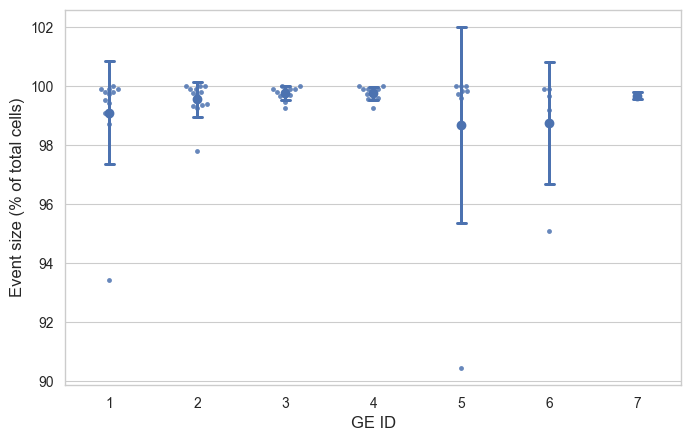

group1  group2  n1  n2  median1     q1_1    q3_1  median2     q1_2  \
0        1       2  13  13   99.720  99.1000   99.89   99.760  99.3600   
1        1       3  13  12   99.720  99.1000   99.89   99.850  99.6750   
2        1       4  13  12   99.720  99.1000   99.89   99.815  99.5850   
3        1       5  13   8   99.720  99.1000   99.89   99.840  99.6975   
4        1       6  13   5   99.720  99.1000   99.89   99.670  99.1900   
5        1       7  13   2   99.720  99.1000   99.89   99.680  99.6400   
6        2       3  13  12   99.760  99.3600   99.91   99.850  99.6750   
7        2       4  13  12   99.760  99.3600   99.91   99.815  99.5850   
8        2       5  13   8   99.760  99.3600   99.91   99.840  99.6975   
9        2       6  13   5   99.760  99.3600   99.91   99.670  99.1900   
10       2       7  13   2   99.760  99.3600   99.91   99.680  99.6400   
11       3       4  12  12   99.850  99.6750   99.92   99.815  99.5850   
12       3       5  12   8   99.850  99.6750   99.92   99.840  99.6975   
13       3       6  12   5   99.850  99.6750   99.92   99.670  99.1900   
14       3       7  12   2   99.850  99.6750   99.92   99.680  99.6400   
15       4       5  12   8   99.815  99.5850   99.92   99.840  99.6975   
16       4       6  12   5   99.815  99.5850   99.92   99.670  99.1900   
17       4       7  12   2   99.815  99.5850   99.92   99.680  99.6400   
18       5       6   8   5   99.840  99.6975  100.00   99.670  99.1900   
19       5       7   8   2   99.840  99.6975  100.00   99.680  99.6400   
20       6       7   5   2   99.670  99.1900   99.90   99.680  99.6400   

      q3_2  mw_U      mw_p      vd_A  cliffs_delta  median_diff  med_ci_low  \
0    99.91  73.0  0.578767  0.431953     -0.136095       -0.040   -0.760750   
1    99.92  53.5  0.205087  0.342949     -0.314103       -0.130   -0.800000   
2    99.92  52.5  0.186070  0.336538     -0.326923       -0.095   -0.800000   
3   100.00  35.5  0.268455  0.341346     -0.317308       -0.120   -0.820000   
4    99.90  32.5  1.000000  0.500000      0.000000        0.050   -0.800000   
5    99.72  13.0  1.000000  0.500000      0.000000        0.040   -0.660000   
6    99.92  66.0  0.538245  0.423077     -0.153846       -0.090   -0.530000   
7    99.92  66.5  0.574293  0.426282     -0.147436       -0.055   -0.540000   
8   100.00  42.5  0.546631  0.408654     -0.182692       -0.080   -0.600000   
9    99.90  40.0  0.502801  0.615385      0.230769        0.090   -0.520000   
10   99.72  14.5  0.933333  0.557692      0.115385        0.080   -0.360000   
11   99.92  72.5  1.000000  0.503472      0.006944        0.035   -0.225125   
12  100.00  44.0  0.792077  0.458333     -0.083333        0.010   -0.280250   
13   99.90  40.5  0.328378  0.675000      0.350000        0.180   -0.215000   
14   99.72  17.0  0.439560  0.708333      0.416667        0.170   -0.080000   
15  100.00  41.5  0.678431  0.432292     -0.135417       -0.025   -0.330000   
16   99.90  40.0  0.328378  0.666667      0.333333        0.145   -0.255000   
17   99.72  14.0  0.791209  0.583333      0.166667        0.135   -0.110000   
18   99.90  26.0  0.435120  0.650000      0.300000        0.170   -0.235000   
19   99.72  11.5  0.533333  0.718750      0.437500        0.160   -0.095000   
20   99.72   5.0  1.000000  0.500000      0.000000       -0.010   -4.580000   

    med_ci_high  p_adj  reject  
0      0.440000    1.0   False  
1      0.140000    1.0   False  
2      0.175250    1.0   False  
3      0.170250    1.0   False  
4      4.620000    1.0   False  
5      0.220000    1.0   False  
6      0.200000    1.0   False  
7      0.235000    1.0   False  
8      0.225000    1.0   False  
9      4.660000    1.0   False  
10     0.290000    1.0   False  
11     0.270000    1.0   False  
12     0.245000    1.0   False  
13     4.705125    1.0   False  
14     0.310000    1.0   False  
15     0.235250    1.0   False  
16     4.715000    1.0   False  
17     0.310000    1.0   False  
18     4.

In [6]:

plot_points_mean_std(
    df=control_global_events,
    x="Event ID",
    y="% of cells involved",
    ylabel="Event size (% of total cells)",
    xlabel="GE ID",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path_ach / "figure_3_2/control_global_events_percentage_cells_involved_pointplot.svg",
)
""""""
wilcoxon_pairs(
    df=control_global_events,
    group_col="Event ID",
    value_col="% of cells involved",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

[2025-08-26 13:14:06] [INFO] calcium: plot_points_mean_std: removed 0/51 outliers on 'interval' (lower=-60, upper=643.5)
[2025-08-26 13:14:06] [INFO] calcium: plot_points_mean_std: N=12 for index=0-1
[2025-08-26 13:14:06] [INFO] calcium: plot_points_mean_std: N=12 for index=1-2
[2025-08-26 13:14:06] [INFO] calcium: plot_points_mean_std: N=12 for index=2-3
[2025-08-26 13:14:06] [INFO] calcium: plot_points_mean_std: N=8 for index=3-4
[2025-08-26 13:14:06] [INFO] calcium: plot_points_mean_std: N=5 for index=4-5
[2025-08-26 13:14:06] [INFO] calcium: plot_points_mean_std: N=2 for index=5-6


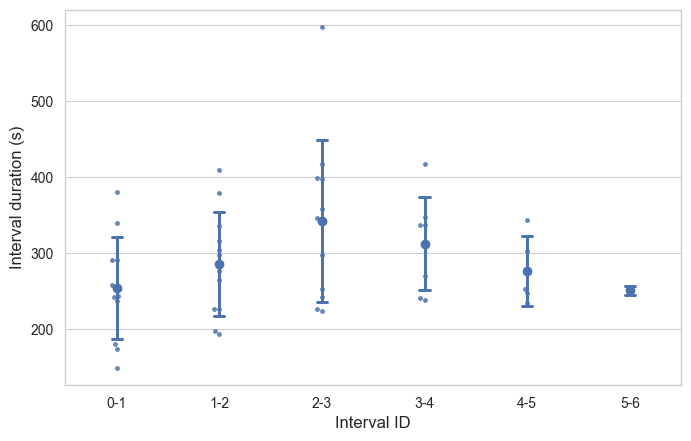

Periodicity 
 - N = 12
 - Mean = 0.88 a.u.
 - Std = 0.06 a.u.

Frequency 
 - N = 11
 - Mean = 0.0035 Hz
 - Std = 0.0007 Hz



method   n  estimate   p_value    ci_low   ci_high  theilsen_slope  \
0  kendall_tau_b  51  0.141263  0.177479 -0.050914  0.313836             8.0   
1       spearman  51  0.190729  0.180033 -0.079389  0.431706             8.0   

   theilsen_slope_ci_low  theilsen_slope_ci_high  theilsen_intercept  
0                   -4.0                    23.5               252.0  
1                   -4.0                    23.5               252.0

In [7]:

intervals_list = []
periodicity_list = []

for dataset_name, df_subset in control_global_events.groupby("dataset"):
    intervals, periodicity, frequency = analyze_peak_intervals(df_subset["Event peak time (s)"].tolist())
    if periodicity is None:
        continue
    periodicity_list.append({
        "dataset": dataset_name,
        "periodicity": periodicity,
        "frequency": frequency if periodicity > 0.8 else None
    })
    for idx, val in enumerate(intervals):
        intervals_list.append({
            "dataset": dataset_name,
            "index": f"{idx}-{idx+1}",
            "interval": val
        })

intervals_df = pd.DataFrame(intervals_list)
periodicity_df = pd.DataFrame(periodicity_list)

plot_points_mean_std(
    df=intervals_df,
    x="index",
    y="interval",
    ylabel="Interval duration (s)",
    xlabel="Interval ID",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path_ach / "figure_3_2/ach_events_intervals_distribution.svg"
)

print(f"Periodicity \n - N = {periodicity_df['periodicity'].count()}\n - Mean = {periodicity_df['periodicity'].mean():.2f} a.u.\n - Std = {periodicity_df['periodicity'].std():.2f} a.u.\n")
print(f"Frequency \n - N = {periodicity_df['frequency'].count()}\n - Mean = {periodicity_df['frequency'].mean():.4f} Hz\n - Std = {periodicity_df['frequency'].std():.4f} Hz\n")

wilcoxon_pairs(
    df=intervals_df,
    group_col="index",
    value_col="interval",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="index",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

intervals_df["index_int"] = intervals_df["index"].str.split("-").str[0].astype(int) + 1

corr_nonparametric(
    df=intervals_df,
    x_col="index_int",
    y_col="interval",
    methods=["spearman", "kendall"],
    alpha=0.05,
    n_boot_ci=1000,
    exact_kendall_if_small=True
)

## FIGURE 3.3

[2025-08-26 13:14:08] [INFO] calcium: plot_histogram_by_group: removed 303 outliers out of 75538 on 'Duration (s)' (lower=-64, upper=237)


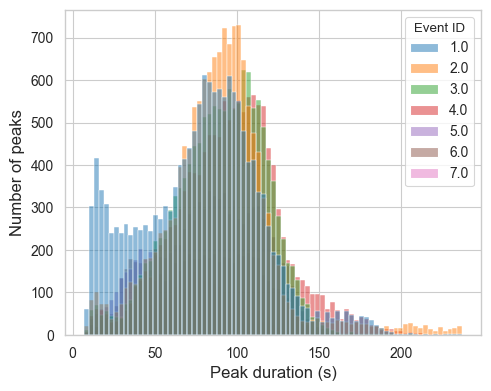

[2025-08-26 13:14:09] [INFO] calcium: plot_histogram_by_group: removed 37 outliers out of 75538 on 'Prominence (noise std units)' (lower=-319.9, upper=732.2)


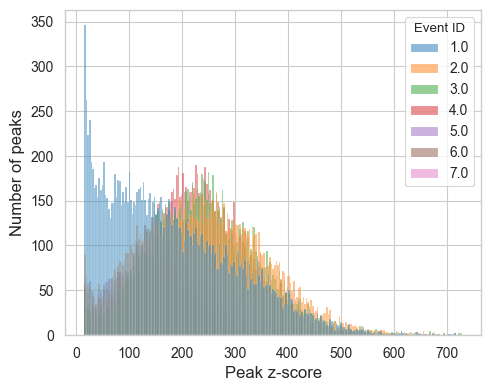

In [8]:
plot_histogram_by_group(
    df=ach_peaks[ach_peaks["In event"] == "global"],
    value_column="Duration (s)",
    group_column="Event ID",
    ylabel="Number of peaks",
    xlabel="Peak duration (s)",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path_ach / "figure_3_3/single_peaks_duration_by_event.svg"
)
plot_histogram_by_group(
    df=ach_peaks[ach_peaks["In event"] == "global"],
    value_column="Prominence (noise std units)",
    group_column="Event ID",
    ylabel="Number of peaks",
    xlabel="Peak z-score",
    bin_width=3,
    multiple="layer",
    palette="tab10",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path_ach / "figure_3_3/single_peaks_prominence_by_event.svg"
)

mapping_events_to_peaks = ach_events.loc[ach_events["Event type"] == "GlobalEvent", ["Event ID", "dataset"]]
subset_peaks_global_events = ach_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")


[2025-08-26 13:14:12] [INFO] calcium: plot_violin: removed 429 outliers out of 75538 on 'Duration (s)' (lower=-104, upper=260)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:14:13] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_3\control_peaks_duration_by_event.svg (svg)


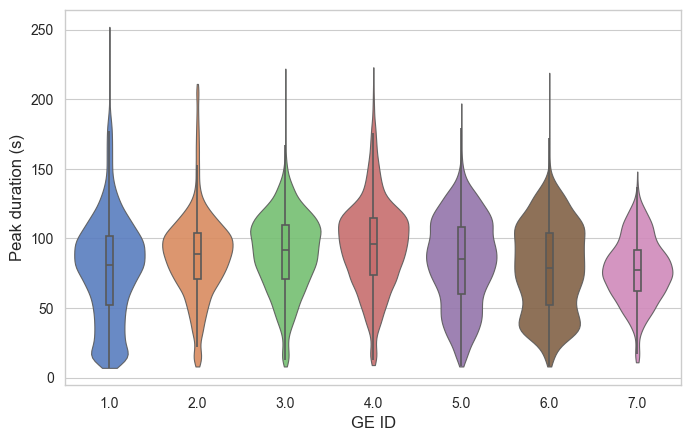

[2025-08-26 13:14:13] [INFO] calcium: plot_violin: removed 429 outliers out of 75538 on 'Duration (s)' (lower=-104, upper=260)


group1  group2     n1     n2  median1  q1_1   q3_1  median2  q1_2   q3_2  \
0      1.0     4.0  15952  13580     81.0  52.0  102.0     96.0  74.0  115.0   
1      4.0     7.0  13580   2515     96.0  74.0  115.0     77.0  62.0   92.0   
2      4.0     6.0  13580   5957     96.0  74.0  115.0     79.0  52.0  104.0   
3      1.0     3.0  15952  13630     81.0  52.0  102.0     92.0  71.0  110.0   
4      4.0     5.0  13580   9166     96.0  74.0  115.0     85.0  60.0  108.0   
5      3.0     7.0  13630   2515     92.0  71.0  110.0     77.0  62.0   92.0   
6      1.0     2.0  15952  14309     81.0  52.0  102.0     89.0  71.0  104.0   
7      2.0     4.0  14309  13580     89.0  71.0  104.0     96.0  74.0  115.0   
8      3.0     6.0  13630   5957     92.0  71.0  110.0     79.0  52.0  104.0   
9      2.0     7.0  14309   2515     89.0  71.0  104.0     77.0  62.0   92.0   
10     2.0     6.0  14309   5957     89.0  71.0  104.0     79.0  52.0  104.0   
11     3.0     5.0  13630   9166     92.0  71.0  110.0     85.0  60.0  108.0   
12     3.0     4.0  13630  13580     92.0  71.0  110.0     96.0  74.0  115.0   
13     1.0     5.0  15952   9166     81.0  52.0  102.0     85.0  60.0  108.0   
14     5.0     7.0   9166   2515     85.0  60.0  108.0     77.0  62.0   92.0   
15     2.0     3.0  14309  13630     89.0  71.0  104.0     92.0  71.0  110.0   
16     5.0     6.0   9166   5957     85.0  60.0  108.0     79.0  52.0  104.0   
17     2.0     5.0  14309   9166     89.0  71.0  104.0     85.0  60.0  108.0   
18     1.0     7.0  15952   2515     81.0  52.0  102.0     77.0  62.0   92.0   
19     6.0     7.0   5957   2515     79.0  52.0  104.0     77.0  62.0   92.0   
20     1.0     6.0  15952   5957     81.0  52.0  102.0     79.0  52.0  104.0   

      bm_stat           bm_p      vd_A  cliffs_delta  median_diff  med_ci_low  \
0   42.964827   0.000000e+00  0.362851     -0.274299        -15.0    -16.0000   
1  -35.253458  1.902104e-241  0.679591      0.359182         19.0     18.0000   
2  -32.220748  2.959842e-217  0.639708      0.279416         17.0     16.0000   
3   31.003426  1.061211e-207  0.398836     -0.202328        -11.0    -12.0000   
4  -25.483622  7.407156e-141  0.597596      0.195193         11.0     10.0000   
5  -26.223873  1.074023e-140  0.642332      0.284664         15.0     14.0000   
6   23.007308  4.186461e-116  0.424736     -0.150529         -8.0     -9.0000   
7   22.399180  4.201648e-110  0.423213     -0.153574         -7.0     -8.0000   
8  -22.519031  1.812595e-109  0.602463      0.204926         13.0     11.0000   
9  -20.255139   8.662052e-87  0.615600      0.231200         12.0     11.0000   
10 -16.072796   2.495772e-57  0.575008      0.150016         10.0      8.0000   
11 -14.462355   3.958283e-47  0.557070      0.114140          7.0      6.0000   
12  13.201861   1.138185e-39  0.454021     -0.091959         -4.0     -5.0125   
13  12.193495   4.418818e-34  0.454621     -0.090759         -4.0     -5.0000   
14 -11.652515   4.552844e-31  0.566009      0.132017          8.0      7.0000   
15   9.689135   3.639707e-22  0.466517     -0.066965         -3.0     -4.0000   
16  -8.996319   2.664407e-19  0.543085      0.086171          6.0      4.0000   
17  -7.221643   5.365875e-13  0.528773      0.057546          4.0      3.0000   
18  -3.256654   1.134768e-03  0.516676      0.033352          4.0      3.0000   
19  -1.943609   5.197979e-02  0.512242      0.024485          2.0      1.0000   
20   1.293316   1.959273e-01  0.494439     -0.011122          2.0      0.0000   

    med_ci_high          p_adj  reject  
0         -14.0   0.000000e+00    True  
1          21.0  3.804207e-240    True  
2          18.0  5.623699e-216    True  
3         -10.0  1.910179e-206    True  
4          12.0  1.259217e-139    True  
5          16.0  1.718436e-139    True  
6          -7.0  6.279691e-115    True  
7          -6.0  5.882307e-109    True  
8          14.0  2.356373e-108    True  
9          13.0   1.039446e-85    True  
10       

In [9]:

plot_violin(
    df=subset_peaks_global_events,
    x="Event ID",
    y="Duration (s)",
    ylabel="Peak duration (s)",
    xlabel="GE ID",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    dodge=False,
    save_svg_path=figure_path_ach / "figure_3_3/control_peaks_duration_by_event.svg"
)

bn_df = brunner_pairs(
    df=subset_peaks_global_events,
    group_col="Event ID",
    value_col="Duration (s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

display(bn_df)

[2025-08-26 13:14:21] [INFO] calcium: plot_violin: removed 28 outliers out of 75538 on 'Prominence (noise std units)' (lower=-464.5, upper=826.85)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)


[2025-08-26 13:14:21] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_3\control_peaks_prominence_by_event.svg (svg)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


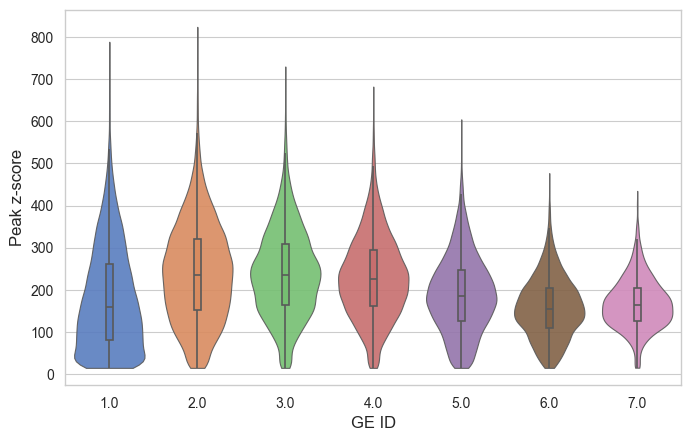

[2025-08-26 13:14:21] [INFO] calcium: plot_violin: removed 28 outliers out of 75538 on 'Prominence (noise std units)' (lower=-464.5, upper=826.85)


group1  group2     n1     n2  median1   q1_1    q3_1  median2    q1_2  \
0      1.0     2.0  15956  14715   158.45   80.2  261.80    235.9  151.80   
1      1.0     3.0  15956  13630   158.45   80.2  261.80    235.7  165.10   
2      1.0     4.0  15956  13577   158.45   80.2  261.80    225.2  160.70   
3      2.0     6.0  14715   5955   235.90  151.8  320.50    155.1  109.10   
4      2.0     7.0  14715   2514   235.90  151.8  320.50    163.4  126.25   
5      3.0     5.0  13630   9163   235.70  165.1  309.50    184.8  126.00   
6      3.0     6.0  13630   5955   235.70  165.1  309.50    155.1  109.10   
7      3.0     7.0  13630   2514   235.70  165.1  309.50    163.4  126.25   
8      4.0     6.0  13577   5955   225.20  160.7  293.60    155.1  109.10   
9      4.0     7.0  13577   2514   225.20  160.7  293.60    163.4  126.25   
10     2.0     5.0  14715   9163   235.90  151.8  320.50    184.8  126.00   
11     4.0     5.0  13577   9163   225.20  160.7  293.60    184.8  126.00   
12     5.0     6.0   9163   5955   184.80  126.0  246.80    155.1  109.10   
13     1.0     5.0  15956   9163   158.45   80.2  261.80    184.8  126.00   
14     5.0     7.0   9163   2514   184.80  126.0  246.80    163.4  126.25   
15     3.0     4.0  13630  13577   235.70  165.1  309.50    225.2  160.70   
16     2.0     4.0  14715  13577   235.90  151.8  320.50    225.2  160.70   
17     6.0     7.0   5955   2514   155.10  109.1  204.35    163.4  126.25   
18     1.0     6.0  15956   5955   158.45   80.2  261.80    155.1  109.10   
19     1.0     7.0  15956   2514   158.45   80.2  261.80    163.4  126.25   
20     2.0     3.0  14715  13630   235.90  151.8  320.50    235.7  165.10   

      q3_2    bm_stat           bm_p      vd_A  cliffs_delta  median_diff  \
0   320.50  47.357454   0.000000e+00  0.352279     -0.295443       -77.45   
1   309.50  50.838555   0.000000e+00  0.340060     -0.319880       -77.25   
2   293.60  44.380904   0.000000e+00  0.357958     -0.284084       -66.75   
3   204.35 -59.448118   0.000000e+00  0.712116      0.424232        80.80   
4   204.10 -44.538206   0.000000e+00  0.694270      0.388540        72.50   
5   246.80 -38.707028   0.000000e+00  0.641850      0.283699        50.90   
6   204.35 -65.856359   0.000000e+00  0.737102      0.474204        80.60   
7   204.10 -48.915049   0.000000e+00  0.722271      0.444543        72.30   
8   204.35 -58.339396   0.000000e+00  0.718350      0.436701        70.10   
9   204.10 -42.344725   0.000000e+00  0.701962      0.403924        61.80   
10  246.80 -35.307725  5.777245e-266  0.626778      0.253556        51.10   
11  246.80 -31.581894  1.054483e-213  0.618426      0.236852        40.40   
12  204.35 -21.835774  4.942716e-104  0.600221      0.200442        29.70   
13  246.80  13.919192   7.095277e-44  0.449754     -0.100493       -26.35   
14  204.10 -12.915166   1.108470e-37  0.573346      0.146691        21.40   
15  293.60  -7.980874   1.510055e-15  0.527890      0.055781        10.50   
16  293.60  -6.306897   2.889823e-10  0.521644      0.043289        10.70   
17  204.10   6.190106   6.411449e-10  0.459619     -0.080762        -8.30   
18  204.35  -5.235719   1.660532e-07  0.520354      0.040709         3.35   
19  204.10   2.211406   2.703480e-02  0.489998     -0.020005        -4.95   
20  309.50   1.153587   2.486793e-01  0.496044     -0.007912         0.20   

    med_ci_low  med_ci_high          p_adj  reject  
0    -80.95000    -73.59750   0.000000e+00    True  
1    -80.60250    -74.09875   0.000000e+00    True  
2    -69.80000    -63.44875   0.000000e+00    True  
3     77.30000     83.90000   0.000000e+00    True  
4     68.55000     76.50250   0.000000e+00    True  
5     47.69875     54.10250   0.000000e+00    True  
6     77.54875     83.90125   0.000000e+00    True  
7     68.89875     76.30125   0.000000e+00    True  
8     67.29750     73.00000   0.000000e+00    True  
9     58.20000     65.70000   0.000000e+00    True  
10    47.49750     54.20000  6.

In [10]:
plot_violin(
    df=subset_peaks_global_events,
    x="Event ID",
    y="Prominence (noise std units)",
    ylabel="Peak z-score",
    xlabel="GE ID",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    dodge=False,
    save_svg_path=figure_path_ach / "figure_3_3/control_peaks_prominence_by_event.svg"
)

brunner_pairs(
    df=subset_peaks_global_events,
    group_col="Event ID",
    value_col="Prominence (noise std units)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)


[2025-08-26 13:14:28] [INFO] calcium: plot_points_mean_std: removed 0/65 outliers on 'Time to 50% (s)' (lower=-18, upper=122)
[2025-08-26 13:14:28] [INFO] calcium: plot_points_mean_std: N=13 for Event ID=1
[2025-08-26 13:14:28] [INFO] calcium: plot_points_mean_std: N=13 for Event ID=2
[2025-08-26 13:14:28] [INFO] calcium: plot_points_mean_std: N=12 for Event ID=3
[2025-08-26 13:14:28] [INFO] calcium: plot_points_mean_std: N=12 for Event ID=4
[2025-08-26 13:14:28] [INFO] calcium: plot_points_mean_std: N=8 for Event ID=5
[2025-08-26 13:14:28] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=6
[2025-08-26 13:14:28] [INFO] calcium: plot_points_mean_std: N=2 for Event ID=7


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1360: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


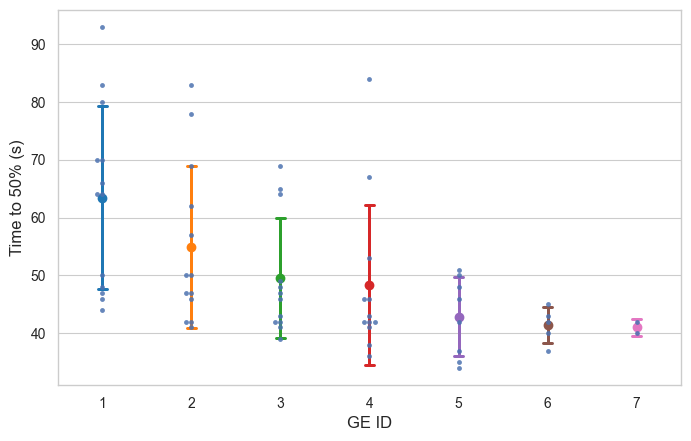

group1  group2  n1  n2  median1   q1_1   q3_1  median2   q1_2   q3_2  \
0        1       6  13   5     64.0  48.00  70.00     42.0  40.00  43.00   
1        1       4  13  12     64.0  48.00  70.00     42.5  41.75  47.75   
2        1       5  13   8     64.0  48.00  70.00     44.0  36.50  48.50   
3        1       3  13  12     64.0  48.00  70.00     46.5  42.00  52.75   
4        2       6  13   5     50.0  46.00  62.00     42.0  40.00  43.00   
5        1       7  13   2     64.0  48.00  70.00     41.0  40.50  41.50   
6        1       2  13  13     64.0  48.00  70.00     50.0  46.00  62.00   
7        2       3  13  12     50.0  46.00  62.00     46.5  42.00  52.75   
8        2       4  13  12     50.0  46.00  62.00     42.5  41.75  47.75   
9        2       5  13   8     50.0  46.00  62.00     44.0  36.50  48.50   
10       2       7  13   2     50.0  46.00  62.00     41.0  40.50  41.50   
11       3       4  12  12     46.5  42.00  52.75     42.5  41.75  47.75   
12       3       5  12   8     46.5  42.00  52.75     44.0  36.50  48.50   
13       3       6  12   5     46.5  42.00  52.75     42.0  40.00  43.00   
14       3       7  12   2     46.5  42.00  52.75     41.0  40.50  41.50   
15       4       5  12   8     42.5  41.75  47.75     44.0  36.50  48.50   
16       4       6  12   5     42.5  41.75  47.75     42.0  40.00  43.00   
17       4       7  12   2     42.5  41.75  47.75     41.0  40.50  41.50   
18       5       6   8   5     44.0  36.50  48.50     42.0  40.00  43.00   
19       5       7   8   2     44.0  36.50  48.50     41.0  40.50  41.50   
20       6       7   5   2     42.0  40.00  43.00     41.0  40.50  41.50   

     mw_U      mw_p      vd_A  cliffs_delta  median_diff  med_ci_low  \
0    64.0  0.000467  0.984615      0.969231         22.0      5.0000   
1   128.0  0.005480  0.820513      0.641026         21.5      4.0000   
2    89.5  0.005956  0.860577      0.721154         20.0      1.0000   
3   123.5  0.013519  0.791667      0.583333         17.5      0.0000   
4    57.0  0.014006  0.876923      0.753846          8.0      2.0000   
5    26.0  0.019048  1.000000      1.000000         23.0      6.0000   
6   114.0  0.138869  0.674556      0.349112         14.0     -7.0000   
7    97.5  0.320322  0.625000      0.250000          3.5     -7.0000   
8   108.5  0.109548  0.695513      0.391026          7.5     -0.5125   
9    77.5  0.075601  0.745192      0.490385          6.0     -2.0000   
10   24.0  0.076190  0.923077      0.846154          9.0      4.0000   
11   86.0  0.442833  0.597222      0.194444          4.0     -5.5000   
12   62.0  0.305390  0.645833      0.291667          2.5     -5.5000   
13   46.5  0.103749  0.775000      0.550000          4.5     -1.0000   
14   20.0  0.197802  0.833333      0.666667          5.5      0.5000   
15   55.5  0.623879  0.578125      0.156250         -1.5     -7.0000   
16   39.0  0.382676  0.650000      0.300000          0.5     -3.0000   
17   17.5  0.439560  0.729167      0.458333          1.5      0.0000   
18   23.0  0.724165  0.575000      0.150000          2.0     -7.0000   
19    9.5  0.888889  0.593750      0.187500          3.0     -6.0000   
20    6.0  0.857143  0.600000      0.200000          1.0     -4.0000   

    med_ci_high     p_adj  reject  
0       30.0000  0.009804    True  
1       28.0000  0.109594   False  
2       33.0000  0.113165   False  
3       27.5000  0.243339   False  
4       22.0000  0.243339   False  
5       30.0000  0.304762   False  
6       24.0000  1.000000   False  
7       17.5125  1.000000   False  
8       20.0000  1.000000   False  
9       22.0125  1.000000   False  
10      22.0000  1.000000   False  
11      14.0000  1.000000   False  
12      17.0000  1.000000   False  
13      16.5000  1.000000   False  
14      15.5000  1.000000   False  
15      10.0000  1.000000   False  
16       9.5000  1.000000   False  
17       8.5000  1.000000   False  
18       9.0250  1.000000   False  
19       9.0000  1.000000 

In [11]:
plot_points_mean_std(
    df=control_global_events,
    x="Event ID",
    y="Time to 50% (s)",
    ylabel="Time to 50% (s)",
    xlabel="GE ID",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path_ach / "figure_3_3/ach_events_time_to_50_percent_pointplot.svg",
    mean_palette="tab10"
)

wilcoxon_pairs(
    df=control_global_events,
    group_col="Event ID",
    value_col="Time to 50% (s)",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

[2025-08-26 13:14:29] [INFO] calcium: plot_points_mean_std: removed 0/65 outliers on 'Normalized peak rate at 50% (% of peaks/s)' (lower=-0.4, upper=5.2)
[2025-08-26 13:14:29] [INFO] calcium: plot_points_mean_std: N=13 for Event ID=1
[2025-08-26 13:14:29] [INFO] calcium: plot_points_mean_std: N=13 for Event ID=2
[2025-08-26 13:14:29] [INFO] calcium: plot_points_mean_std: N=12 for Event ID=3
[2025-08-26 13:14:29] [INFO] calcium: plot_points_mean_std: N=12 for Event ID=4
[2025-08-26 13:14:29] [INFO] calcium: plot_points_mean_std: N=8 for Event ID=5
[2025-08-26 13:14:29] [INFO] calcium: plot_points_mean_std: N=5 for Event ID=6
[2025-08-26 13:14:29] [INFO] calcium: plot_points_mean_std: N=2 for Event ID=7


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1360: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


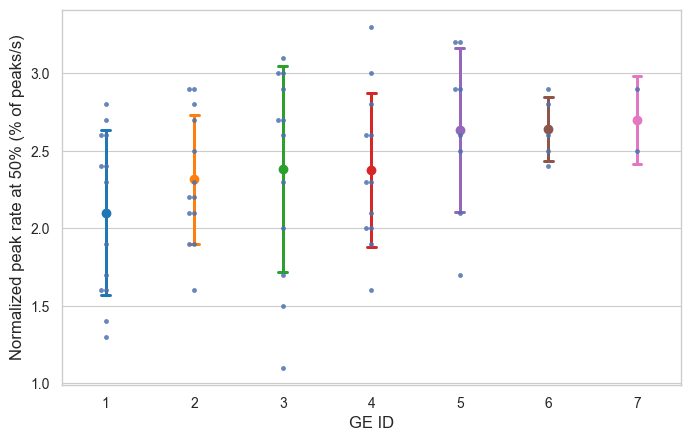

group1  group2  n1  n2  median1   q1_1   q3_1  median2   q1_2   q3_2  \
0        1       5  13   8     2.30  1.600  2.600     2.75  2.400  2.975   
1        1       2  13  13     2.30  1.600  2.600     2.20  2.100  2.700   
2        1       3  13  12     2.30  1.600  2.600     2.65  1.925  2.925   
3        1       4  13  12     2.30  1.600  2.600     2.30  2.000  2.650   
4        1       6  13   5     2.30  1.600  2.600     2.60  2.500  2.800   
5        1       7  13   2     2.30  1.600  2.600     2.70  2.600  2.800   
6        2       3  13  12     2.20  2.100  2.700     2.65  1.925  2.925   
7        2       4  13  12     2.20  2.100  2.700     2.30  2.000  2.650   
8        2       5  13   8     2.20  2.100  2.700     2.75  2.400  2.975   
9        2       6  13   5     2.20  2.100  2.700     2.60  2.500  2.800   
10       2       7  13   2     2.20  2.100  2.700     2.70  2.600  2.800   
11       3       4  12  12     2.65  1.925  2.925     2.30  2.000  2.650   
12       3       5  12   8     2.65  1.925  2.925     2.75  2.400  2.975   
13       3       6  12   5     2.65  1.925  2.925     2.60  2.500  2.800   
14       3       7  12   2     2.65  1.925  2.925     2.70  2.600  2.800   
15       4       5  12   8     2.30  2.000  2.650     2.75  2.400  2.975   
16       4       6  12   5     2.30  2.000  2.650     2.60  2.500  2.800   
17       4       7  12   2     2.30  2.000  2.650     2.70  2.600  2.800   
18       5       6   8   5     2.75  2.400  2.975     2.60  2.500  2.800   
19       5       7   8   2     2.75  2.400  2.975     2.70  2.600  2.800   
20       6       7   5   2     2.60  2.500  2.800     2.70  2.600  2.800   

    mw_U      mw_p      vd_A  cliffs_delta  median_diff  med_ci_low  \
0   22.5  0.036818  0.216346     -0.567308        -0.45    -1.30000   
1   65.5  0.362158  0.387574     -0.224852         0.10    -0.90000   
2   52.0  0.168349  0.333333     -0.333333        -0.35    -1.10000   
3   58.0  0.294537  0.371795     -0.256410         0.00    -0.90000   
4   12.5  0.059290  0.192308     -0.615385        -0.30    -1.10000   
5    4.0  0.171429  0.153846     -0.692308        -0.40    -1.20000   
6   65.5  0.538245  0.419872     -0.160256        -0.45    -0.80000   
7   74.0  0.851719  0.474359     -0.051282        -0.10    -0.60000   
8   31.5  0.161394  0.302885     -0.394231        -0.55    -0.95000   
9   17.0  0.143324  0.261538     -0.476923        -0.40    -0.70000   
10   5.5  0.304762  0.211538     -0.576923        -0.50    -0.80000   
11  78.0  0.755285  0.541667      0.083333         0.35    -0.50125   
12  38.0  0.472668  0.395833     -0.208333        -0.10    -1.05000   
13  28.0  0.878798  0.466667     -0.066667         0.05    -0.80000   
14  10.5  0.923077  0.437500     -0.125000        -0.05    -0.85125   
15  33.5  0.305390  0.348958     -0.302083        -0.45    -0.90000   
16  18.5  0.278604  0.308333     -0.383333        -0.30    -0.80000   
17   7.0  0.439560  0.291667     -0.416667        -0.40    -0.85000   
18  23.0  0.724165  0.575000      0.150000         0.15    -0.50000   
19   8.5  1.000000  0.531250      0.062500         0.05    -0.60000   
20   4.0  0.857143  0.400000     -0.200000        -0.10    -0.40000   

    med_ci_high     p_adj  reject  
0       0.10000  0.773168   False  
1       0.40250  1.000000   False  
2       0.40000  1.000000   False  
3       0.40000  1.000000   False  
4       0.10000  1.000000   False  
5      -0.10000  1.000000   False  
6       0.40125  1.000000   False  
7       0.50000  1.000000   False  
8       0.20000  1.000000   False  
9       0.20000  1.000000   False  
10      0.00000  1.000000   False  
11      0.70125  1.000000   False  
12      0.45000  1.000000   False  
13      0.40000  1.000000   False  
14      0.30000  1.000000   False  
15      0.20125  1.000000   False  
16      0.10000  1.000000   False  
17      0.10000  1.000000   False  
18      0.55000  1.000000   False  
19      0.55000  1.000000   False  
20      0.30

In [12]:
plot_points_mean_std(
    df=control_global_events,
    x="Event ID",
    y="Normalized peak rate at 50% (% of peaks/s)",
    ylabel="Normalized peak rate at 50% (% of peaks/s)",
    xlabel="GE ID",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    save_svg_path=figure_path_ach / "figure_3_3/ach_events_normalized_peak_rate_at_50_percent_pointplot.svg",
    mean_palette="tab10"
)

wilcoxon_pairs(
    df=control_global_events,
    group_col="Event ID",
    value_col="Normalized peak rate at 50% (% of peaks/s)",
    filter_outliers=False,
    outliers_bounds=(3, 3),
    outliers_bygroup="Event ID",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False, 
    p_adjust_method="holm"
)

## Figure 3.4

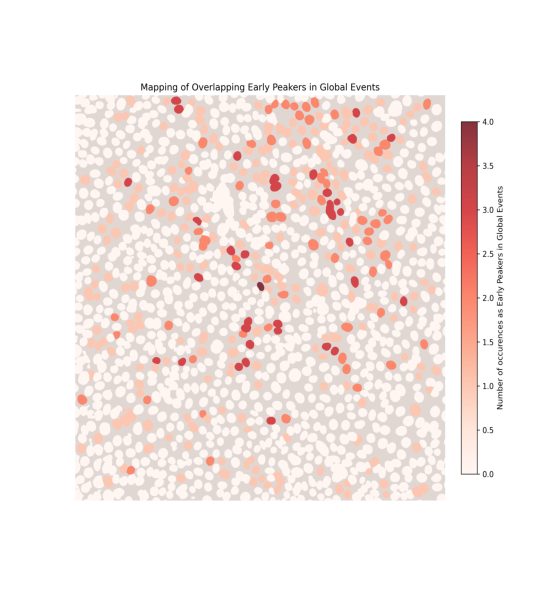

[2025-08-26 13:19:58] [WARNING] calcium: 'total_events' is deprecated and ignored. Using 4 unique event IDs.
[2025-08-26 13:19:58] [INFO] calcium: Early peakers event-matrix: 323 cells x 4 events; black squares: 459


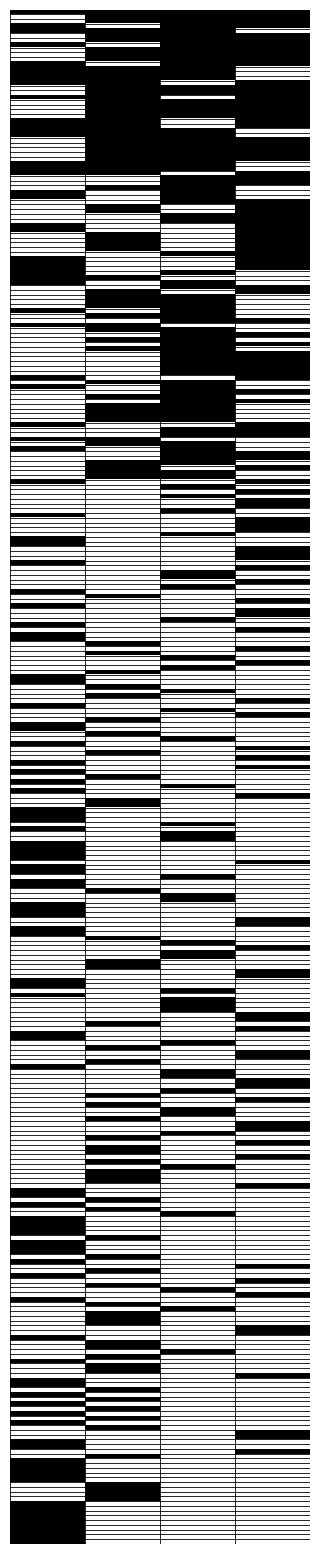

[2025-08-26 13:19:59] [INFO] calcium: Saved early peakers heatmap SVG to: C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_4\global_events_early_peakers_heatmap.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:462: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([dataset_col, category_col])


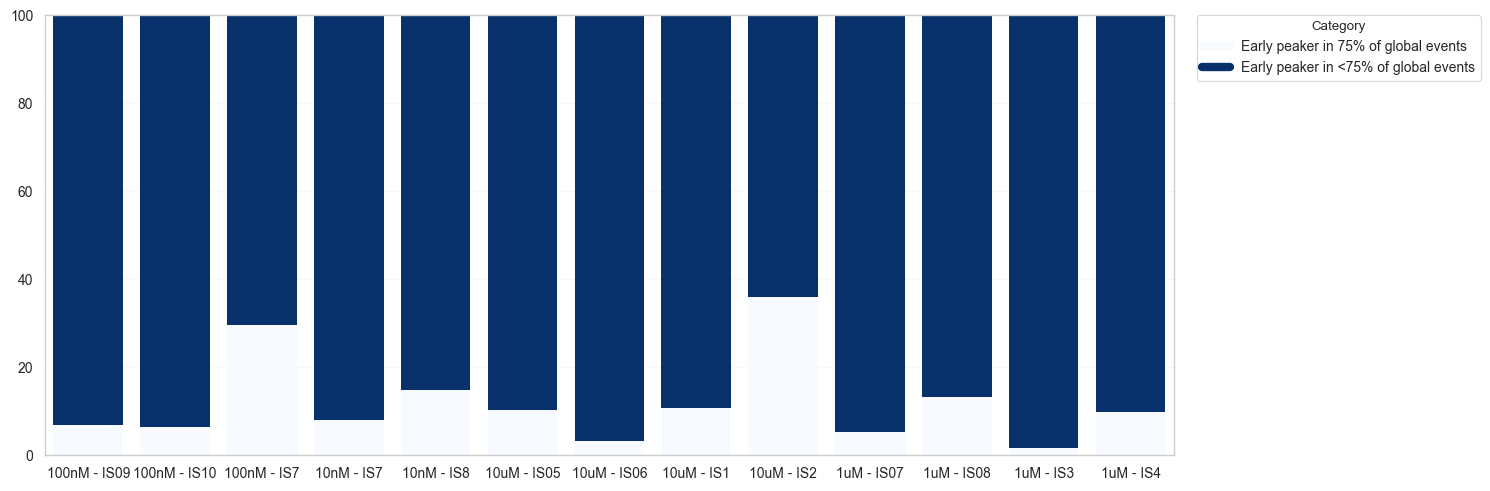

WindowsPath('C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_4/figure_3_4/ach_cells_early_peakers_in_75_percent_global_events_distribution_by_dataset.svg')

In [52]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/global_events/global_event_overlap_early_peakers_overlay.png",
    figsize=(5.5, 6)
)

plot_early_peakers_heatmap(
    cells=reference_cells,
    total_events=len(reference_global_events),
    output_svg=figure_path_ach / "figure_3_4/global_events_early_peakers_heatmap.svg",
)

total_events = len(reference_global_events)
threshold_count = math.ceil(0.75 * total_events)

reference_cells["early peakers in 75% of global events"] = (
    reference_cells["Occurrences in global events as early peaker"].fillna(0).astype(int) >= threshold_count
)

events_per_ds = control_global_events.groupby("dataset")["Event ID"].nunique().rename("total_events")
totals = ach_cells["dataset"].map(events_per_ds).fillna(0).astype(int)
threshold_count = np.ceil(0.75 * totals).astype(int)

ach_cells["early peakers in 75% of global events"] = (
    ach_cells["Occurrences in global events as early peaker"].fillna(0).astype(int) >= threshold_count
)

col = "early peakers in 75% of global events"

ach_cells[col] = (
    ach_cells[col]
    .map({
        True:  "Early peaker in 75% of global events",
        False: "Early peaker in <75% of global events",
    })
    .astype("category")  # optional: nice for plotting
)

ach_cells["dataset name"] = ach_cells["concentration"].astype(str) + " - " + ach_cells["image_sequence"].astype(str)

plot_category_distribution_by_dataset(
    df=ach_cells[ach_cells["Occurrences in global events as early peaker"] > 0],
    category_col="early peakers in 75% of global events",
    dataset_col="dataset name",
    save_path=figure_path_ach / "figure_3_4/ach_cells_early_peakers_in_75_percent_global_events_distribution_by_dataset.svg",
    palette="Blues",
    figsize=(15, 5)
)

## Figure 3.5

[2025-08-26 13:14:32] [INFO] calcium: plot_histogram: removed 38 outliers out of 1804 on 'Duration (s)' (lower=-38, upper=95)


[2025-08-26 13:14:33] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_5\reference_peaks_duration_distribution.svg (svg)


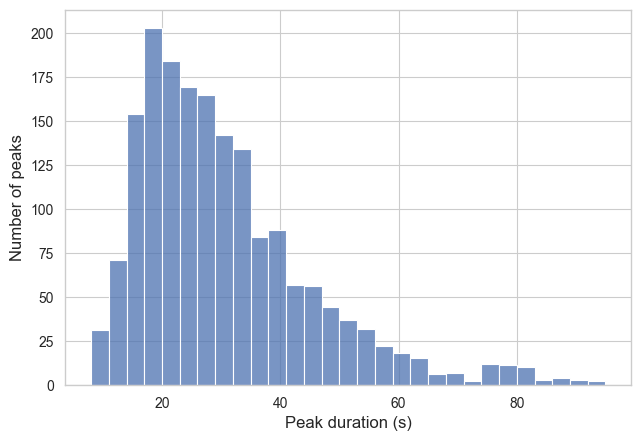

[2025-08-26 13:14:33] [INFO] calcium: plot_histogram: removed 98 outliers out of 1804 on 'Prominence (noise std units)' (lower=-56.175, upper=119)
[2025-08-26 13:14:33] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_5\reference_peaks_prominence_distribution.svg (svg)


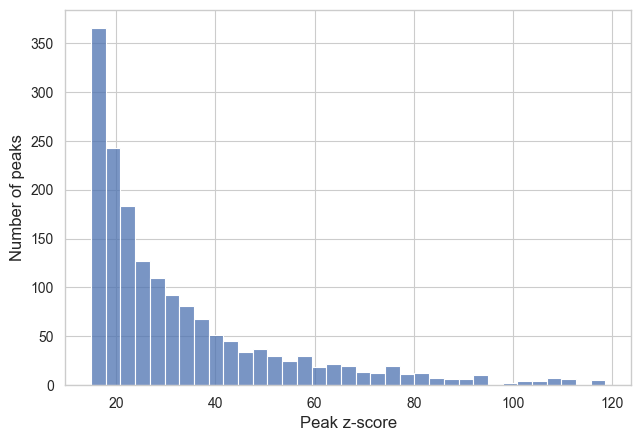

[2025-08-26 13:14:33] [INFO] calcium: plot_histogram: removed 0 outliers out of 1240 on 'Speed (um/s)' (lower=-20.348, upper=45.578)
[2025-08-26 13:14:33] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_5\communications_speed_distribution.svg (svg)


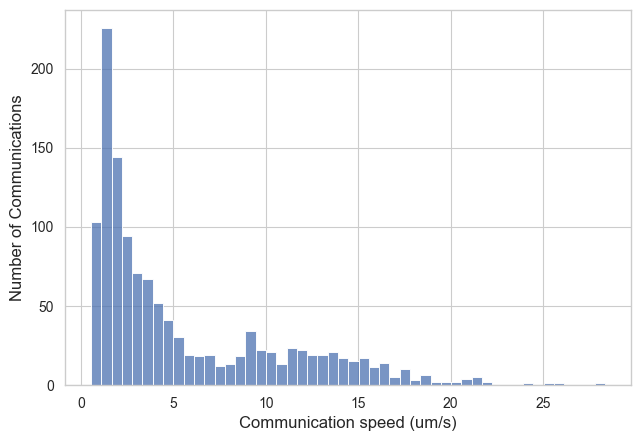

[2025-08-26 13:14:33] [INFO] calcium: plot_histogram: removed 2 outliers out of 564 on 'Number of cells involved' (lower=-4, upper=14)
[2025-08-26 13:14:33] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_5\reference_sequential_events_number_of_cells_involved_distribution.svg (svg)


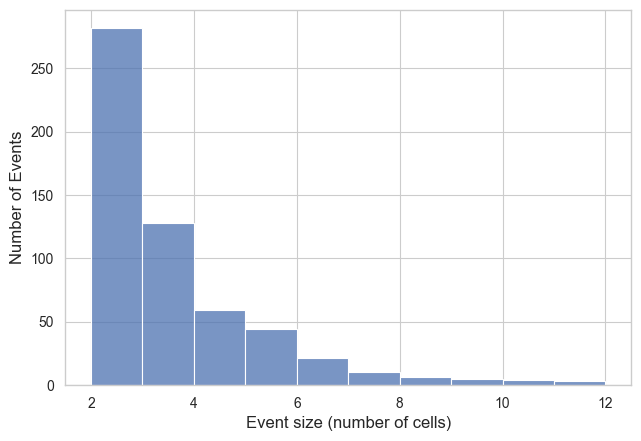

In [14]:
plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "sequential"],
    column="Duration (s)",
    ylabel="Number of peaks",
    xlabel="Peak duration (s)",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path_ach / "figure_3_5/reference_peaks_duration_distribution.svg"
)
plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "sequential"],
    column="Prominence (noise std units)",
    ylabel="Number of peaks",
    xlabel="Peak z-score",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path_ach / "figure_3_5/reference_peaks_prominence_distribution.svg"
)
plot_histogram(
    df=reference_communications,
    column="Speed (um/s)",
    ylabel="Number of Communications",
    xlabel="Communication speed (um/s)",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    return_outliers=False,
    save_svg_path=figure_path_ach / "figure_3_5/communications_speed_distribution.svg"
)
reference_sequential_events = reference_events[reference_events["Event type"] == "SequentialEvent"].copy()
plot_histogram(
    df=reference_sequential_events,
    column="Number of cells involved",
    ylabel="Number of Events",
    xlabel="Event size (number of cells)",
    bin_width=1,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    save_svg_path=figure_path_ach / "figure_3_5/reference_sequential_events_number_of_cells_involved_distribution.svg"
)


ach_peaks["dataset name"] = ach_peaks["concentration"].astype(str) + " - " + ach_peaks["image_sequence"].astype(str)

mapping_events_to_peaks = ach_events.loc[ach_events["Event type"] == "SequentialEvent", ["Event ID", "dataset"]]
subset_peaks_sequential_events = ach_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

[2025-08-26 13:14:34] [INFO] calcium: plot_violin: removed 331 outliers out of 22549 on 'Duration (s)' (lower=-48, upper=114)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:14:35] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_5\control_peaks_duration_distribution.svg (svg)


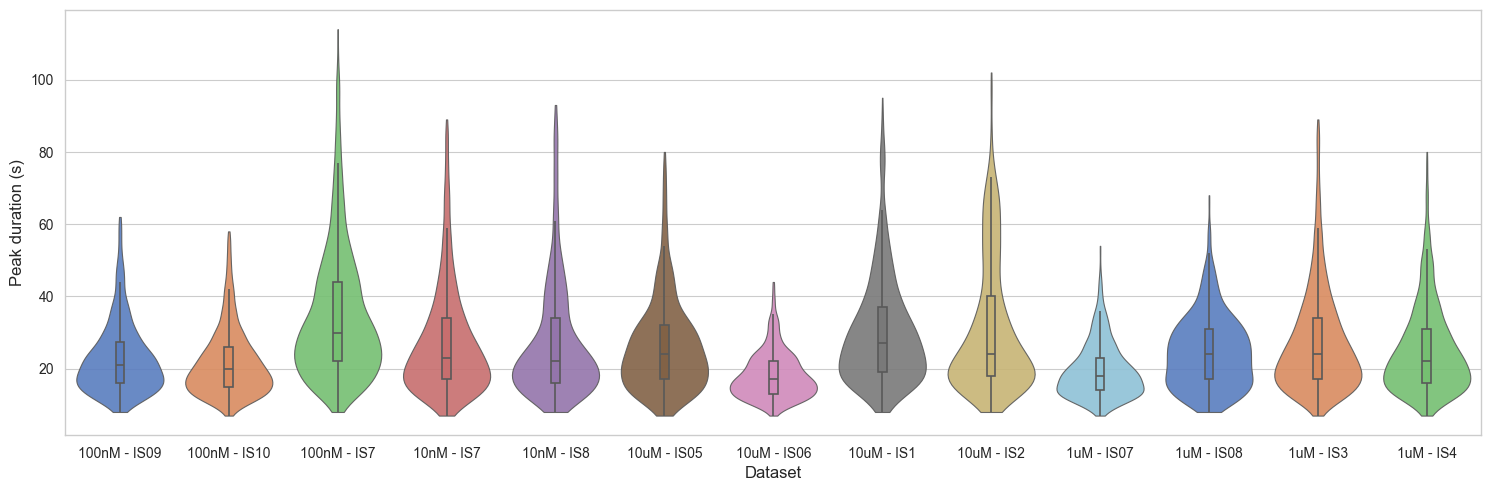

[2025-08-26 13:14:35] [INFO] calcium: plot_violin: removed 331 outliers out of 22549 on 'Duration (s)' (lower=-48, upper=114)


group1       group2    n1    n2  median1  q1_1  q3_1  median2  q1_2  \
0    100nM - IS7   1uM - IS07  4165   993     30.0  22.0  44.0     18.0  14.0   
1   100nM - IS10  100nM - IS7  1731  4165     20.0  15.0  26.0     30.0  22.0   
2    100nM - IS7  10uM - IS06  4165   540     30.0  22.0  44.0     17.0  13.0   
3     10uM - IS1   1uM - IS07  1766   993     27.0  19.0  37.0     18.0  14.0   
4    10uM - IS06   10uM - IS1   540  1766     17.0  13.0  22.0     27.0  19.0   
..           ...          ...   ...   ...      ...   ...   ...      ...   ...   
73    10nM - IS7  10uM - IS05  2316  1182     23.0  17.0  34.0     24.0  17.0   
74    10nM - IS8  10uM - IS05  1401  1182     22.0  16.0  34.0     24.0  17.0   
75    10nM - IS8   1uM - IS08  1401   954     22.0  16.0  34.0     24.0  17.0   
76    10nM - IS8    1uM - IS4  1401  1771     22.0  16.0  34.0     22.0  16.0   
77    1uM - IS08    1uM - IS4   954  1771     24.0  17.0  31.0     22.0  16.0   

    q3_2    bm_stat           bm_p      vd_A  cliffs_delta  median_diff  \
0   23.0 -42.013126  2.699231e-273  0.797189      0.594377         12.0   
1   44.0  36.877474  4.270444e-255  0.253835     -0.492330        -10.0   
2   22.0 -42.199967  2.391680e-213  0.829917      0.659833         13.0   
3   23.0 -25.707273  1.001214e-128  0.742169      0.484338          9.0   
4   37.0  27.088254  5.591413e-126  0.219786     -0.560427        -10.0   
..   ...        ...            ...       ...           ...          ...   
73  32.0  -0.386457   6.991903e-01  0.503941      0.007882         -1.0   
74  32.0   0.828308   4.075730e-01  0.490565     -0.018870         -2.0   
75  31.0  -0.860498   3.896064e-01  0.510328      0.020655         -2.0   
76  31.0  -1.342881   1.794181e-01  0.513960      0.027919          0.0   
77  31.0  -0.377715   7.056815e-01  0.504349      0.008698          2.0   

    med_ci_low  med_ci_high          p_adj  reject  
0         12.0         13.0  2.105400e-271    True  
1        -12.0        -10.0  3.288242e-253    True  
2         13.0         15.0  1.817677e-211    True  
3          8.0         10.0  7.509107e-127    True  
4        -11.0         -9.0  4.137646e-124    True  
..         ...          ...            ...     ...  
73        -2.0          1.0   1.000000e+00   False  
74        -3.0          0.0   1.000000e+00   False  
75        -3.0          0.0   1.000000e+00   False  
76        -1.0          1.0   1.000000e+00   False  
77         0.0          2.5   1.000000e+00   False  

[78 rows x 19 columns]

In [15]:
plot_violin(
    df=subset_peaks_sequential_events,
    x="dataset name",
    y="Duration (s)",
    ylabel="Peak duration (s)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path_ach / "figure_3_5/control_peaks_duration_distribution.svg",
    figsize=(15, 5)
)

brunner_pairs(
    df=subset_peaks_sequential_events,
    group_col="dataset name",
    value_col="Duration (s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="dataset name",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

[2025-08-26 13:14:45] [INFO] calcium: plot_violin: removed 666 outliers out of 22549 on 'Prominence (noise std units)' (lower=-78.3, upper=156.9)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:14:46] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_5\control_peaks_prominence_distribution.svg (svg)


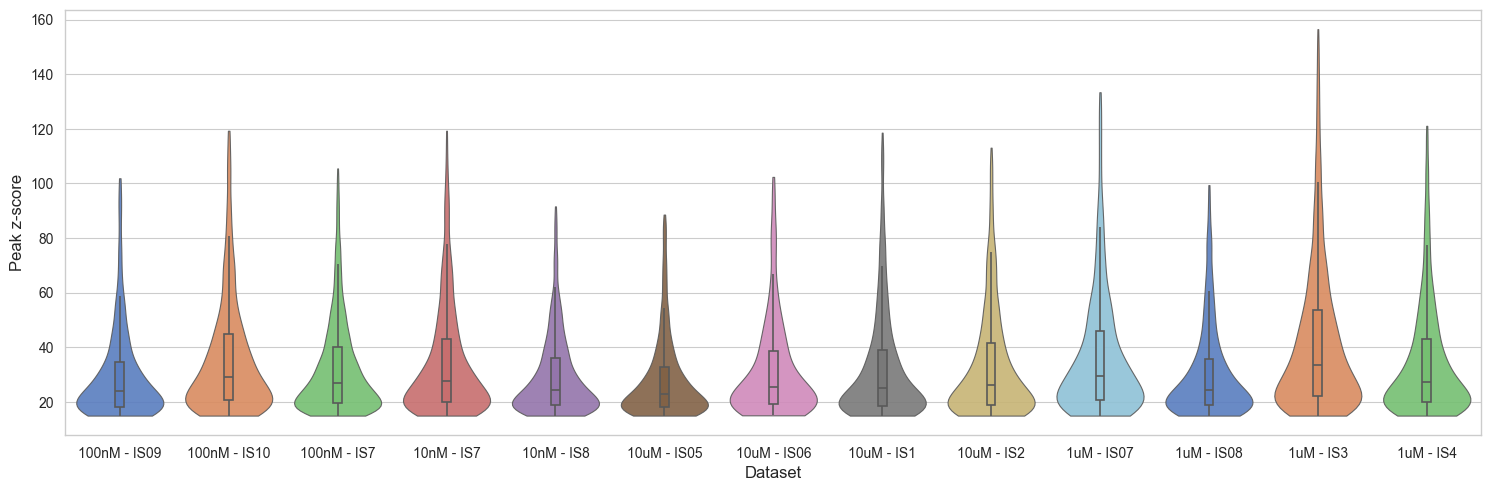

[2025-08-26 13:14:46] [INFO] calcium: plot_violin: removed 666 outliers out of 22549 on 'Prominence (noise std units)' (lower=-78.3, upper=156.9)


group1      group2    n1    n2  median1    q1_1    q3_1  median2  \
0    10uM - IS05   1uM - IS3  1139  3367     23.0  18.000  32.700    33.50   
1     10nM - IS8   1uM - IS3  1403  3367     24.5  18.900  36.250    33.50   
2    100nM - IS7   1uM - IS3  4132  3367     26.9  19.775  40.125    33.50   
3     10uM - IS1   1uM - IS3  1706  3367     25.0  18.600  39.175    33.50   
4   100nM - IS09   1uM - IS3   710  3367     24.1  18.325  34.675    33.50   
..           ...         ...   ...   ...      ...     ...     ...      ...   
73   10uM - IS06  10uM - IS1   525  1706     25.4  19.300  38.700    25.00   
74   10uM - IS06  10uM - IS2   525  1244     25.4  19.300  38.700    26.15   
75   10uM - IS06  1uM - IS08   525   920     25.4  19.300  38.700    24.50   
76    10uM - IS1  10uM - IS2  1706  1244     25.0  18.600  39.175    26.15   
77    10uM - IS1  1uM - IS08  1706   920     25.0  18.600  39.175    24.50   

    q1_2    q3_2    bm_stat          bm_p      vd_A  cliffs_delta  \
0   22.2  53.600  20.291381  3.344914e-84  0.321999     -0.356003   
1   22.2  53.600  17.834795  7.547536e-68  0.351538     -0.296924   
2   22.2  53.600  15.818840  2.327222e-55  0.395987     -0.208027   
3   22.2  53.600  14.787401  5.067037e-48  0.378005     -0.243989   
4   22.2  53.600  14.610227  2.315561e-44  0.342574     -0.314852   
..   ...     ...        ...           ...       ...           ...   
73  18.6  39.175  -0.231164  8.172377e-01  0.503254      0.006507   
74  18.8  41.525   0.759868  4.474961e-01  0.488834     -0.022332   
75  18.7  35.700  -1.248184  2.122323e-01  0.519719      0.039439   
76  18.8  41.525   1.202174  2.294041e-01  0.487032     -0.025937   
77  18.7  35.700  -1.354350  1.757745e-01  0.515773      0.031546   

    median_diff  med_ci_low  med_ci_high         p_adj  reject  
0        -10.50   -11.80000     -9.39750  2.609033e-82    True  
1         -9.00   -10.40000     -7.60000  5.811603e-66    True  
2         -6.60    -7.80000     -5.60000  1.768689e-53    True  
3         -8.50    -9.70000     -6.95000  3.800278e-46    True  
4         -9.40   -11.00000     -8.10000  1.713515e-42    True  
..          ...         ...          ...           ...     ...  
73         0.40    -1.55000      2.00000  1.000000e+00   False  
74        -0.75    -2.55125      0.95125  1.000000e+00   False  
75         0.90    -0.70000      2.50000  1.000000e+00   False  
76        -1.15    -2.55000      0.35000  1.000000e+00   False  
77         0.50    -0.60000      1.85000  1.000000e+00   False  

[78 rows x 19 columns]

In [16]:
plot_violin(
    df=subset_peaks_sequential_events,
    x="dataset name",
    y="Prominence (noise std units)",
    ylabel="Peak z-score",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path_ach / "figure_3_5/control_peaks_prominence_distribution.svg",
    figsize=(15, 5)
)

brunner_pairs(
    df=subset_peaks_sequential_events,
    group_col="dataset name",
    value_col="Prominence (noise std units)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="dataset name",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

[2025-08-26 13:14:54] [INFO] calcium: plot_violin: removed 18 outliers out of 16615 on 'Speed (um/s)' (lower=-26.75, upper=59.56)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:14:54] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_5\ach_communications_speed_distribution.svg (svg)


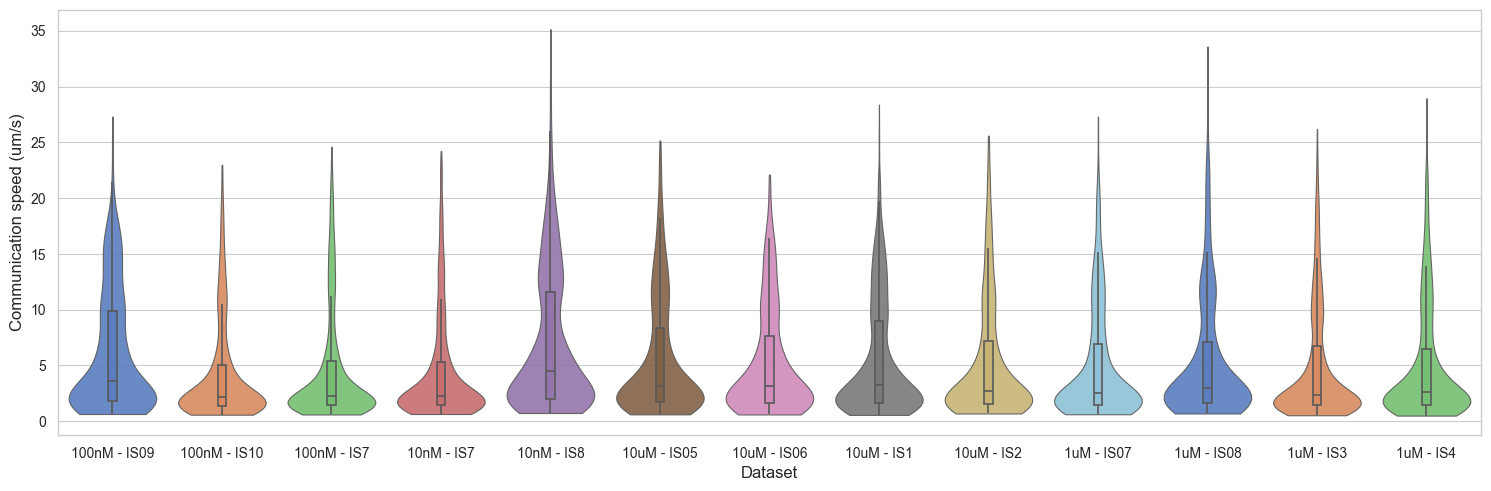

[2025-08-26 13:14:54] [INFO] calcium: plot_violin: removed 18 outliers out of 16615 on 'Speed (um/s)' (lower=-26.75, upper=59.56)


group1      group2    n1    n2  median1  q1_1    q3_1  median2  \
0    100nM - IS7  10nM - IS8  3181  1060    2.260  1.41   5.350    4.495   
1   100nM - IS10  10nM - IS8  1320  1060    2.200  1.32   5.005    4.495   
2     10nM - IS7  10nM - IS8  1738  1060    2.280  1.43   5.260    4.495   
3     10nM - IS8   1uM - IS3  1060  2764    4.495  2.02  11.610    2.370   
4     10nM - IS8   1uM - IS4  1060  1315    4.495  2.02  11.610    2.600   
..           ...         ...   ...   ...      ...   ...     ...      ...   
73    10uM - IS2  1uM - IS08   859   675    2.680  1.55   7.155    2.980   
74    10uM - IS2   1uM - IS4   859  1315    2.680  1.55   7.155    2.600   
75    1uM - IS07   1uM - IS3   761  2764    2.510  1.47   6.950    2.370   
76    1uM - IS07   1uM - IS4   761  1315    2.510  1.47   6.950    2.600   
77     1uM - IS3   1uM - IS4  2764  1315    2.370  1.40   6.690    2.600   

    q1_2    q3_2    bm_stat          bm_p      vd_A  cliffs_delta  \
0   2.02  11.610  14.911136  1.261180e-47  0.356587     -0.286827   
1   2.02  11.610  14.666371  1.234636e-46  0.337826     -0.324349   
2   2.02  11.610  13.639358  1.011834e-40  0.354219     -0.291562   
3   1.40   6.690 -13.308181  7.582125e-39  0.630220      0.260441   
4   1.47   6.465 -10.352779  1.392865e-24  0.618663      0.237326   
..   ...     ...        ...           ...       ...           ...   
73  1.65   7.105   1.301785  1.931943e-01  0.480702     -0.038596   
74  1.47   6.465  -1.598635  1.100683e-01  0.520136      0.040271   
75  1.40   6.690  -1.362762  1.731996e-01  0.515845      0.031690   
76  1.47   6.465  -0.073398  9.414983e-01  0.500964      0.001928   
77  1.47   6.465   1.513005  1.303965e-01  0.485467     -0.029065   

    median_diff  med_ci_low  med_ci_high         p_adj  reject  
0        -2.235   -2.650000    -1.804875  9.837205e-46    True  
1        -2.295   -2.710000    -1.845000  9.506696e-45    True  
2        -2.215   -2.605125    -1.794875  7.689940e-39    True  
3         2.125    1.660000     2.530000  5.686594e-37    True  
4         1.895    1.439875     2.310500  1.030720e-22    True  
..          ...         ...          ...           ...     ...  
73       -0.300   -0.570000     0.030250  1.000000e+00   False  
74        0.080   -0.180000     0.350000  1.000000e+00   False  
75        0.140   -0.145125     0.420125  1.000000e+00   False  
76       -0.090   -0.390250     0.220000  1.000000e+00   False  
77       -0.230   -0.460250    -0.020000  1.000000e+00   False  

[78 rows x 19 columns]

In [17]:
ach_communications["dataset name"] = ach_communications["concentration"].astype(str) + " - " + ach_communications["image_sequence"].astype(str)

plot_violin(
    df=ach_communications,
    x="dataset name",
    y="Speed (um/s)",
    ylabel="Communication speed (um/s)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path_ach / "figure_3_5/ach_communications_speed_distribution.svg",
    figsize=(15, 5)
)

brunner_pairs(
    df=ach_communications,
    group_col="dataset name",
    value_col="Speed (um/s)",
    filter_outliers=True,
    outliers_bounds=(3, 5),
    outliers_bygroup="dataset name",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

[2025-08-26 13:15:01] [INFO] calcium: plot_violin: removed 64 outliers out of 5934 on 'Number of cells involved' (lower=-10, upper=26)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:15:02] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_5\ach_events_number_of_cells_involved_distribution.svg (svg)


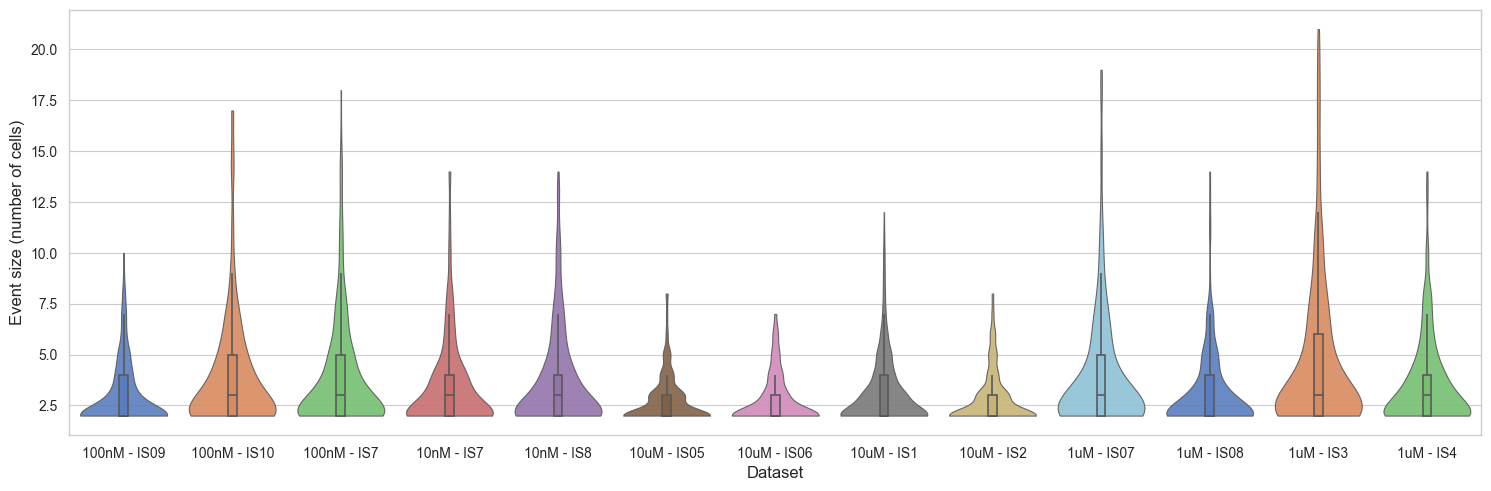

[2025-08-26 13:15:02] [INFO] calcium: plot_violin: removed 64 outliers out of 5934 on 'Number of cells involved' (lower=-10, upper=26)


group1       group2    n1   n2  median1  q1_1  q3_1  median2  q1_2  \
0   10uM - IS05    1uM - IS3   378  697      2.0   2.0   3.0      3.0   2.0   
1    10uM - IS2    1uM - IS3   391  697      2.0   2.0   3.0      3.0   2.0   
2   100nM - IS7  10uM - IS05  1022  378      3.0   2.0   5.0      2.0   2.0   
3   100nM - IS7   10uM - IS2  1022  391      3.0   2.0   5.0      2.0   2.0   
4   10uM - IS06    1uM - IS3   163  697      2.0   2.0   3.0      3.0   2.0   
..          ...          ...   ...  ...      ...   ...   ...      ...   ...   
73  10uM - IS05   1uM - IS08   378  280      2.0   2.0   3.0      2.0   2.0   
74  10uM - IS06   10uM - IS2   163  391      2.0   2.0   3.0      2.0   2.0   
75   10uM - IS1   1uM - IS08   562  280      2.0   2.0   4.0      2.0   2.0   
76   10uM - IS2   1uM - IS08   391  280      2.0   2.0   3.0      2.0   2.0   
77   1uM - IS07    1uM - IS4   245  475      3.0   2.0   5.0      3.0   2.0   

    q3_2    bm_stat          bm_p      vd_A  cliffs_delta  median_diff  \
0    6.0  11.643217  1.531608e-29  0.325217     -0.349567         -1.0   
1    6.0  11.345426  3.273951e-28  0.329211     -0.341577         -1.0   
2    3.0  -9.701330  2.954438e-21  0.638530      0.277061          1.0   
3    3.0  -9.297628  1.066017e-19  0.634003      0.268007          1.0   
4    6.0   9.491746  4.185314e-19  0.319533     -0.360933         -1.0   
..   ...        ...           ...       ...           ...          ...   
73   4.0   2.032189  4.262831e-02  0.457974     -0.084051          0.0   
74   3.0   0.559570  5.761915e-01  0.486804     -0.026391          0.0   
75   4.0  -0.776411  4.378502e-01  0.515233      0.030465          0.0   
76   4.0   1.922502  5.505267e-02  0.460746     -0.078507          0.0   
77   4.0  -0.230806  8.175709e-01  0.505100      0.010200          0.0   

    med_ci_low  med_ci_high         p_adj  reject  
0         -1.0         -1.0  1.194654e-27    True  
1         -1.0         -1.0  2.520942e-26    True  
2          1.0          1.0  2.245373e-19    True  
3          1.0          1.0  7.995128e-18    True  
4         -1.0         -1.0  3.097132e-17    True  
..         ...          ...           ...     ...  
73        -1.0          0.0  1.000000e+00   False  
74         0.0          0.0  1.000000e+00   False  
75        -1.0          1.0  1.000000e+00   False  
76        -1.0          0.0  1.000000e+00   False  
77         0.0          0.0  1.000000e+00   False  

[78 rows x 19 columns]

In [18]:
ach_events["dataset name"] = ach_events['concentration'].astype(str) + " - " + ach_events['image_sequence'].astype(str)
control_sequential_events = ach_events[ach_events["Event type"] == "SequentialEvent"].copy()


plot_violin(
    df=control_sequential_events,
    x="dataset name",
    y="Number of cells involved",
    ylabel="Event size (number of cells)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 5),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path_ach / "figure_3_5/ach_events_number_of_cells_involved_distribution.svg",
    figsize=(15, 5)
)

brunner_pairs(
    df=control_sequential_events,
    group_col="dataset name",
    value_col="Number of cells involved",
    filter_outliers=True,
    outliers_bounds=(3, 5),
    outliers_bygroup="dataset name",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

## FIGURE 3.6

In [19]:
def seq_events_category(n: int) -> str:
    if n == 2:
        return "02"
    elif n == 3:
        return "03"
    elif n == 4:
        return "04"
    elif n == 5:
        return "05"
    elif n == 6:
        return "06"
    elif n == 7:
        return "07"
    elif n == 8:
        return "08"
    elif n == 9:
        return "09"
    else:
        return "10+"

control_sequential_events["Number of cells involved category"] = control_sequential_events["Number of cells involved"].apply(seq_events_category)

seq_map = (
    control_sequential_events[
        ["dataset", "Event ID", "Number of cells involved category", "Number of cells involved"]
    ].drop_duplicates(subset=["dataset", "Event ID"])
)

subset_peaks_sequential_events = subset_peaks_sequential_events.merge(
    seq_map,
    how="left",
    on=["dataset", "Event ID"]
)

ach_communications = ach_communications.merge(
    seq_map,
    how="left",
    on=["dataset", "Event ID"]
)


[2025-08-26 13:15:08] [INFO] calcium: plot_violin: removed 429 outliers out of 22549 on 'Duration (s)' (lower=-40, upper=94)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:15:09] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_6\distribution_of_peak_values_by_number_of_cells_involved.svg (svg)


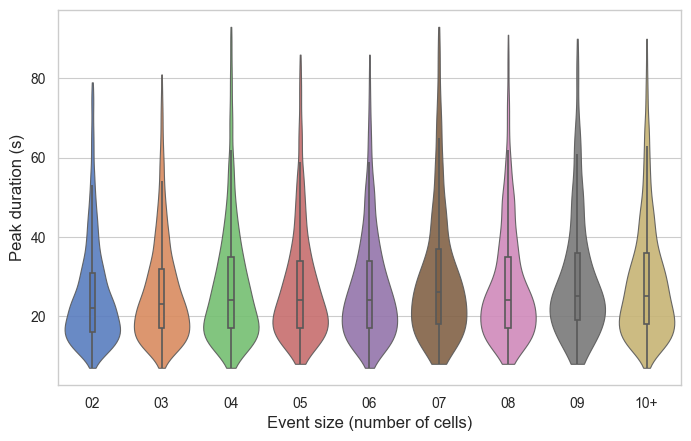

[2025-08-26 13:15:09] [INFO] calcium: plot_violin: removed 429 outliers out of 22549 on 'Duration (s)' (lower=-40, upper=94)


group1 group2    n1    n2  median1  q1_1  q3_1  median2  q1_2  q3_2  \
0      02    10+  5346  3976     22.0  16.0  31.0     25.0  18.0  36.0   
1      02     07  5346  1443     22.0  16.0  31.0     26.0  18.0  37.0   
2      03    10+  3429  3976     23.0  17.0  32.0     25.0  18.0  36.0   
3      03     07  3429  1443     23.0  17.0  32.0     26.0  18.0  37.0   
4      02     05  5346  2065     22.0  16.0  31.0     24.0  17.0  34.0   
5      02     09  5346   617     22.0  16.0  31.0     25.0  19.0  36.0   
6      02     04  5346  2606     22.0  16.0  31.0     24.0  17.0  35.0   
7      02     08  5346  1097     22.0  16.0  31.0     24.0  17.0  35.0   
8      02     06  5346  1541     22.0  16.0  31.0     24.0  17.0  34.0   
9      03     09  3429   617     23.0  17.0  32.0     25.0  19.0  36.0   
10     04     07  2606  1443     24.0  17.0  35.0     26.0  18.0  37.0   
11     04    10+  2606  3976     24.0  17.0  35.0     25.0  18.0  36.0   
12     06     07  1541  1443     24.0  17.0  34.0     26.0  18.0  37.0   
13     03     05  3429  2065     23.0  17.0  32.0     24.0  17.0  34.0   
14     05     07  2065  1443     24.0  17.0  34.0     26.0  18.0  37.0   
15     02     03  5346  3429     22.0  16.0  31.0     23.0  17.0  32.0   
16     03     08  3429  1097     23.0  17.0  32.0     24.0  17.0  35.0   
17     06    10+  1541  3976     24.0  17.0  34.0     25.0  18.0  36.0   
18     03     04  3429  2606     23.0  17.0  32.0     24.0  17.0  35.0   
19     05    10+  2065  3976     24.0  17.0  34.0     25.0  18.0  36.0   
20     04     09  2606   617     24.0  17.0  35.0     25.0  19.0  36.0   
21     03     06  3429  1541     23.0  17.0  32.0     24.0  17.0  34.0   
22     07     08  1443  1097     26.0  18.0  37.0     24.0  17.0  35.0   
23     06     09  1541   617     24.0  17.0  34.0     25.0  19.0  36.0   
24     05     09  2065   617     24.0  17.0  34.0     25.0  19.0  36.0   
25     08     09  1097   617     24.0  17.0  35.0     25.0  19.0  36.0   
26     08    10+  1097  3976     24.0  17.0  35.0     25.0  18.0  36.0   
27     04     05  2606  2065     24.0  17.0  35.0     24.0  17.0  34.0   
28     04     06  2606  1541     24.0  17.0  35.0     24.0  17.0  34.0   
29     04     08  2606  1097     24.0  17.0  35.0     24.0  17.0  35.0   
30     05     06  2065  1541     24.0  17.0  34.0     24.0  17.0  34.0   
31     05     08  2065  1097     24.0  17.0  34.0     24.0  17.0  35.0   
32     06     08  1541  1097     24.0  17.0  34.0     24.0  17.0  35.0   
33     07     09  1443   617     26.0  18.0  37.0     25.0  19.0  36.0   
34     07    10+  1443  3976     26.0  18.0  37.0     25.0  18.0  36.0   
35     09    10+   617  3976     25.0  19.0  36.0     25.0  18.0  36.0   

      bm_stat          bm_p      vd_A  cliffs_delta  median_diff  med_ci_low  \
0   11.902379  2.078340e-32  0.428875     -0.142250         -3.0        -4.0   
1    9.646703  1.339294e-21  0.417877     -0.164246         -4.0        -5.0   
2    7.758340  9.773041e-15  0.448225     -0.103549         -2.0        -3.0   
3    6.955025  4.454124e-12  0.436870     -0.126259         -3.0        -4.0   
4    6.686735  2.611103e-11  0.450622     -0.098757         -2.0        -2.0   
5    6.761862  2.685086e-11  0.419177     -0.161646         -3.0        -4.0   
6    6.088150  1.228846e-09  0.457808     -0.084385         -2.0        -3.0   
7    5.504486  4.309897e-08  0.447893     -0.104213         -2.0        -3.0   
8    5.453294  5.429088e-08  0.454739     -0.090522         -2.0        -3.0   
9    4.888771  1.212054e-06  0.438911     -0.122179         -2.0        -3.0   
10   4.118873  3.909551e-05  0.461212     -0.077576         -2.0        -3.0   
11   3.780347  1.582984e-04  0.472425     -0.055149         -1.0        -2.0   
12   3.645211  2.717926e-04  0.461567     -0.076866         -2.0        -3.0   
13   3.632449  2.839723e-04  0.470881     -0.058238         -1.0        -2.0   
14   3.535533  4.131207e-04  0.464899     -0.070201         -2.0

In [20]:

plot_violin(
    subset_peaks_sequential_events,
    x="Number of cells involved category",
    y="Duration (s)",
    xlabel="Event size (number of cells)",
    ylabel="Peak duration (s)",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="Number of cells involved category",
    save_svg_path=figure_path_ach / "figure_3_6/distribution_of_peak_values_by_number_of_cells_involved.svg"
)

brunner_pairs(
    df=subset_peaks_sequential_events,
    group_col="Number of cells involved category",
    value_col="Duration (s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Number of cells involved category",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

[2025-08-26 13:15:13] [INFO] calcium: plot_violin: removed 725 outliers out of 22549 on 'Prominence (noise std units)' (lower=-71.1, upper=145.9)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:15:13] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_6\distribution_of_peak_values_by_number_of_cells_involved_prominence.svg (svg)


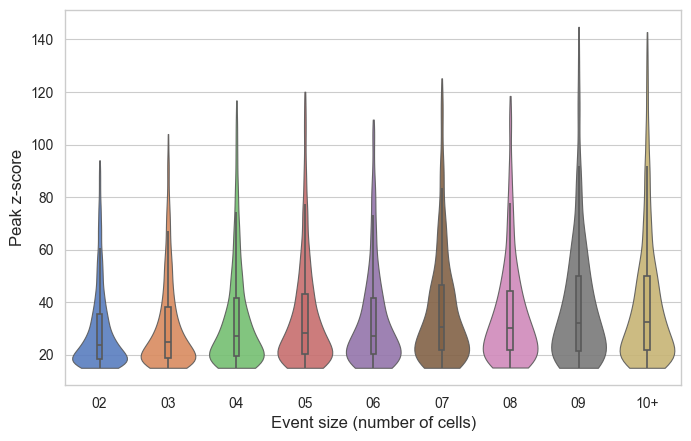

[2025-08-26 13:15:13] [INFO] calcium: plot_violin: removed 725 outliers out of 22549 on 'Prominence (noise std units)' (lower=-71.1, upper=145.9)


method      n  estimate        p_value    ci_low   ci_high  \
0  kendall_tau_b  22549  0.118728  2.564079e-141  0.109535  0.127846   
1       spearman  22549  0.167733  6.013818e-142  0.154707  0.180468   

   theilsen_slope  theilsen_slope_ci_low  theilsen_slope_ci_high  \
0        0.541667                    0.5                     0.6   
1        0.541667                    0.5                     0.6   

   theilsen_intercept  
0           25.633333  
1           25.633333

In [21]:
plot_violin(
    subset_peaks_sequential_events,
    x="Number of cells involved category",
    y="Prominence (noise std units)",
    xlabel="Event size (number of cells)",
    ylabel="Peak z-score",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="Number of cells involved category",
    save_svg_path=figure_path_ach / "figure_3_6/distribution_of_peak_values_by_number_of_cells_involved_prominence.svg"
)

brunner_pairs(
    df=subset_peaks_sequential_events,
    group_col="Number of cells involved category",
    value_col="Prominence (noise std units)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Number of cells involved category",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)


corr_nonparametric(
    df=subset_peaks_sequential_events,
    x_col="Number of cells involved",
    y_col="Prominence (noise std units)",
    methods=["spearman", "kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

[2025-08-26 13:16:45] [INFO] calcium: plot_violin: removed 206 outliers out of 16615 on 'Speed (um/s)' (lower=-17.587, upper=27.23)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:16:46] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_6\distribution_of_peak_values_by_number_of_cells_involved_speed.svg (svg)


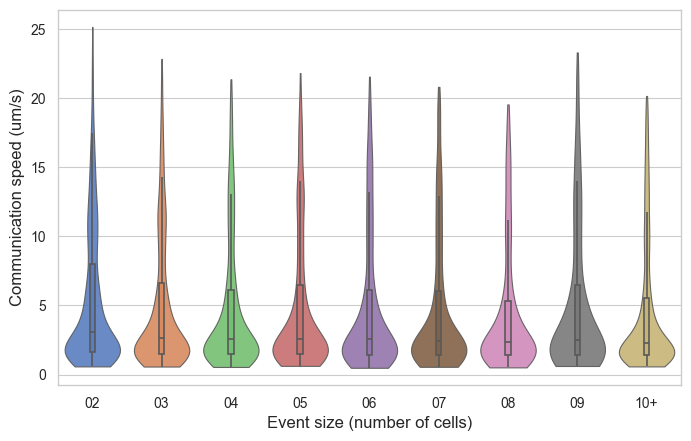

[2025-08-26 13:16:46] [INFO] calcium: plot_violin: removed 206 outliers out of 16615 on 'Speed (um/s)' (lower=-17.587, upper=27.23)


method      n  estimate       p_value    ci_low   ci_high  \
0  kendall_tau_b  16615 -0.039472  2.824015e-13 -0.050297 -0.029450   
1       spearman  16615 -0.056431  3.358577e-13 -0.072033 -0.042073   

   theilsen_slope  theilsen_slope_ci_low  theilsen_slope_ci_high  \
0           -0.02              -0.026667                  -0.015   
1           -0.02              -0.026667                  -0.015   

   theilsen_intercept  
0                 2.7  
1                 2.7

In [22]:
plot_violin(
    ach_communications,
    x="Number of cells involved category",
    y="Speed (um/s)",
    xlabel="Event size (number of cells)",
    ylabel="Communication speed (um/s)",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="Number of cells involved category",
    save_svg_path=figure_path_ach / "figure_3_6/distribution_of_peak_values_by_number_of_cells_involved_speed.svg"
)

brunner_pairs(
    df=ach_communications,
    group_col="Number of cells involved category",
    value_col="Speed (um/s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Number of cells involved category",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

corr_nonparametric(
    df=ach_communications,
    x_col="Number of cells involved",
    y_col="Speed (um/s)",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

## FIGURE 3.7

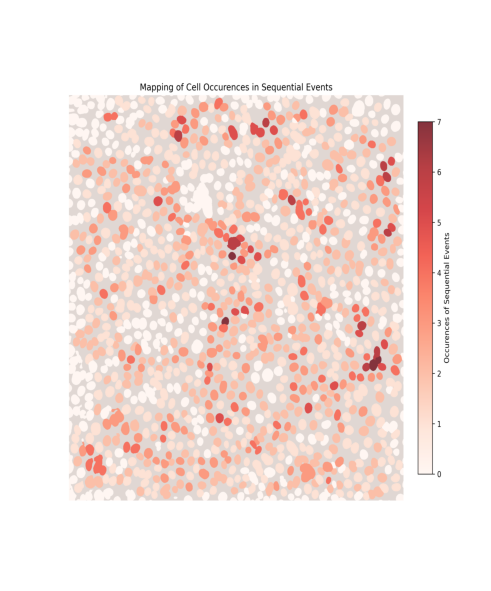

[2025-08-26 13:17:14] [INFO] calcium: build_neighbor_pair_stats: built 41332 pairs across 13 datasets (mean distance=16.26 um)
[2025-08-26 13:17:14] [INFO] calcium: plot_histogram: removed 0 outliers out of 1240 on 'Distance (um)' (lower=-3.77, upper=33.89)
[2025-08-26 13:17:14] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_7\reference_communications_distance_distribution.svg (svg)


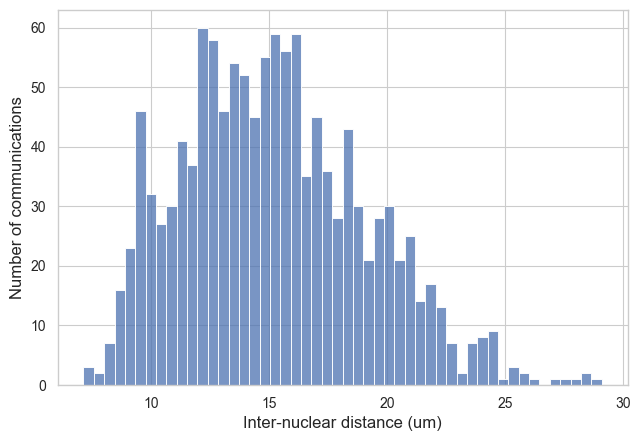

[2025-08-26 13:17:14] [WARNING] calcium: No data to plot for column 'distance_um' — DataFrame is empty.
[2025-08-26 13:17:15] [WARNING] calcium: plot_bar: received empty DataFrame


In [23]:
visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_occurences_in_sequential_events_overlay.png",
    figsize=(5, 6)
)

pairs_communication_df = build_neighbor_pair_stats(
    cells_df=ach_cells,
    comm_df=ach_communications,
    dataset_col="dataset",
    cell_id_col="Cell ID",
    centroid_x_col="Centroid X coordinate (um)",
    centroid_y_col="Centroid Y coordinate (um)",
    neighbors_col="Neighbors (labels)",
    edge_cols=("Cell ID", "Neighbor ID")
    )

plot_histogram(
    df=reference_communications,
    column="Distance (um)",
    ylabel="Number of communications",
    xlabel="Inter-nuclear distance (um)",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3,3),
    save_svg_path=figure_path_ach / "figure_3_7/reference_communications_distance_distribution.svg"
)

plot_histogram(
    df=pairs_communication_df[pairs_communication_df["dataset"]=="20250326_IS1"],
    column="distance_um",
    ylabel="Number of pairs",
    xlabel="Inter-nuclear distance (um)",
    bin_count=50,
    filter_outliers=True,
    outliers_bounds=(3,3),
    save_svg_path=figure_path_ach / "figure_3_7/pairs_communication_distance_distribution.svg"
)

pairs_communication_df["Distance truncated (um)"] = np.floor(pairs_communication_df["distance_um"]).astype(int)
average = pairs_communication_df.groupby(["dataset", "Distance truncated (um)"], as_index=False)
comm_by_distance_df = average.agg(n_pairs=("n_communications", "size"), total_communications=("n_communications", "sum"))
comm_by_distance_df["average number of communications"] = comm_by_distance_df["total_communications"] / comm_by_distance_df["n_pairs"]

events_df = control_sequential_events.groupby("dataset", as_index=False).size().rename(columns={"size": "n_events"})
comm_by_distance_df = comm_by_distance_df.merge(events_df, on="dataset", how="left")
comm_by_distance_df["n_events"] = comm_by_distance_df["n_events"].fillna(0).astype(int)
comm_by_distance_df["average number of communications normalized"] = comm_by_distance_df["average number of communications"] / comm_by_distance_df["n_events"]

plot_bar(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23) & (comm_by_distance_df["dataset"]=="20250326_IS1")],
    axis_column="Distance truncated (um)",
    value_column="average number of communications normalized",
    xlabel="Inter-nuclear distance (um)",
    ylabel="Number of communications normalized by number of SE and pair",
    rotation=0,
    palette="muted",
    hue_column="dataset",
    save_svg_path=figure_path_ach / "figure_3_7/reference_dataset_average_number_of_communications_by_distance_barplot.svg"
)

[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=8
[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=9
[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=10
[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=11
[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=12
[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=13
[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=14
[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=15
[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=16
[2025-08-26 13:17:15] [INFO] calcium: plot_points_mean_std: N=13 for Distance truncated (um)=17
[2025-08-26 13:17:15] [INFO] calcium: plot

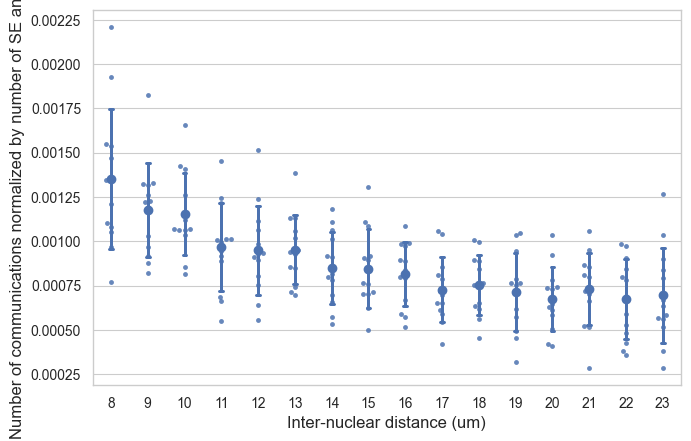

group1  group2  n1  n2   median1      q1_1      q3_1   median2      q1_2  \
0         8      20  13  13  0.001340  0.001083  0.001536  0.000647  0.000581   
1        10      20  13  13  0.001071  0.001065  0.001259  0.000647  0.000581   
2         8      19  13  13  0.001340  0.001083  0.001536  0.000752  0.000574   
3         8      18  13  13  0.001340  0.001083  0.001536  0.000753  0.000635   
4        10      17  13  13  0.001071  0.001065  0.001259  0.000696  0.000613   
..      ...     ...  ..  ..       ...       ...       ...       ...       ...   
115      20      22  13  13  0.000647  0.000581  0.000739  0.000688  0.000481   
116      20      23  13  13  0.000647  0.000581  0.000739  0.000635  0.000562   
117      21      22  13  13  0.000744  0.000665  0.000857  0.000688  0.000481   
118      21      23  13  13  0.000744  0.000665  0.000857  0.000635  0.000562   
119      22      23  13  13  0.000688  0.000481  0.000843  0.000635  0.000562   

         q3_2   mw_U      mw_p      vd_A  cliffs_delta  median_diff  \
0    0.000739  165.0  0.000002  0.976331      0.952663     0.000693   
1    0.000739  165.0  0.000002  0.976331      0.952663     0.000424   
2    0.000788  163.0  0.000006  0.964497      0.928994     0.000587   
3    0.000888  162.0  0.000009  0.958580      0.917160     0.000586   
4    0.000809  162.0  0.000009  0.958580      0.917160     0.000375   
..        ...    ...       ...       ...           ...          ...   
115  0.000843   83.0  0.959818  0.491124     -0.017751    -0.000042   
116  0.000841   84.0  1.000000  0.497041     -0.005917     0.000012   
117  0.000843   97.0  0.544604  0.573964      0.147929     0.000056   
118  0.000841   97.0  0.544604  0.573964      0.147929     0.000110   
119  0.000841   84.0  1.000000  0.497041     -0.005917     0.000054   

     med_ci_low  med_ci_high     p_adj  reject  
0      0.000350     0.000908  0.000277    True  
1      0.000326     0.000649  0.000277    True  
2      0.000314     0.000856  0.000681    True  
3      0.000241     0.000819  0.001012    True  
4      0.000260     0.000606  0.001012    True  
..          ...          ...       ...     ...  
115   -0.000232     0.000214  1.000000   False  
116   -0.000230     0.000170  1.000000   False  
117   -0.000139     0.000319  1.000000   False  
118   -0.000137     0.000272  1.000000   False  
119   -0.000309     0.000273  1.000000   False  

[120 rows x 19 columns]

method    n  estimate       p_value    ci_low   ci_high  \
0  kendall_tau_b  208 -0.441261  3.340415e-20 -0.518323 -0.353650   
1       spearman  208 -0.602065  6.667638e-22 -0.690112 -0.490231   

   theilsen_slope  theilsen_slope_ci_low  theilsen_slope_ci_high  \
0       -0.000037              -0.000044                -0.00003   
1       -0.000037              -0.000044                -0.00003   

   theilsen_intercept  
0            0.001423  
1            0.001423

In [24]:
plot_points_mean_std(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23)],
    x="Distance truncated (um)",
    y="average number of communications normalized",
    xlabel="Inter-nuclear distance (um)",
    ylabel="Number of communications normalized by number of SE and pair",
    save_svg_path=figure_path_ach / "figure_3_7/reference_dataset_average_number_of_communications_by_distance_points.svg"
)

wilcoxon_results = wilcoxon_pairs(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23)],
    group_col="Distance truncated (um)",
    value_col="average number of communications normalized",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(wilcoxon_results)

corr_results = corr_nonparametric(
    df=comm_by_distance_df[(comm_by_distance_df["Distance truncated (um)"] >= 8) & (comm_by_distance_df["Distance truncated (um)"] <= 23)],
    x_col="Distance truncated (um)",
    y_col="average number of communications normalized",
    methods=["spearman", "kendall"],
    alpha=0.05,
    n_boot_ci=1000,
    exact_kendall_if_small=True
)

display(corr_results)

## FIGURE 3.8

In [59]:
# --- 1) Pair stats & per-dataset 95th percentile --------------------------------
pairs_communication_df = build_neighbor_pair_stats(
    cells_df=ach_cells,
    comm_df=ach_communications,
    dataset_col="dataset",
    cell_id_col="Cell ID",
    centroid_x_col="Centroid X coordinate (um)",
    centroid_y_col="Centroid Y coordinate (um)",
    neighbors_col="Neighbors (labels)",
    edge_cols=("Cell ID", "Neighbor ID")
)

# Per-dataset 95th percentile
pairs_communication_df["p95"] = (
    pairs_communication_df.groupby("dataset")["n_communications"]
    .transform(lambda s: s.quantile(0.97))
)

top_pair_communication_df = pairs_communication_df.loc[
    pairs_communication_df["n_communications"] >= pairs_communication_df["p95"],
    ["dataset", "Cell A", "Cell B", "n_communications"]
].copy()

# Canonical pair key in top pairs (Cell A < Cell B assumed)
top_pair_communication_df["pair_key"] = list(
    zip(top_pair_communication_df["Cell A"], top_pair_communication_df["Cell B"])
)

# --- 2) Communications tagging with (dataset, pair_key) -------------------------
origin_com = ach_communications["Origin cell ID"]
cause_com = ach_communications["Cause cell ID"]

# Canonicalize the pair for every communication row
ach_communications["pair_key"] = list(
    zip(
        origin_com.where(origin_com <= cause_com, cause_com),
        cause_com.where(cause_com >= origin_com, origin_com),
    )
)

top_pairs_idx = pd.MultiIndex.from_frame(
    top_pair_communication_df[["dataset", "pair_key"]].drop_duplicates()
)

# Tag directly via MultiIndex.isin (safe to run many times)
ach_communications = ach_communications.copy()
ach_communications["from_high_comm_pair"] = pd.MultiIndex.from_frame(
    ach_communications[["dataset", "pair_key"]]
).isin(top_pairs_idx)

ach_communications["from_high_comm_pair"] = ach_communications["from_high_comm_pair"].fillna(False)

# --- 3) Peaks tagging with (dataset, Cell ID, Peak ID) --------------------------
peaks_in_top_comms = pd.concat(
    [
        ach_communications.loc[
            ach_communications["from_high_comm_pair"],
            ["dataset", "Origin cell ID", "Origin cell peak ID"],
        ].rename(columns={"Origin cell ID": "Cell ID", "Origin cell peak ID": "Peak ID"}),
        ach_communications.loc[
            ach_communications["from_high_comm_pair"],
            ["dataset", "Cause cell ID", "Cause cell peak ID"],
        ].rename(columns={"Cause cell ID": "Cell ID", "Cause cell peak ID": "Peak ID"}),
    ],
    ignore_index=True,
).drop_duplicates()

ach_peaks["from_high_comm_pair"] = pd.MultiIndex.from_frame(
    ach_peaks[["dataset", "Cell ID", "Peak ID"]]
).isin(
    pd.MultiIndex.from_frame(peaks_in_top_comms[["dataset", "Cell ID", "Peak ID"]])
)

# --- 4) Highly connected cells (per dataset) ------------------------------------
# Count, per dataset, how many top pairs each cell belongs to
cells_in_pairs = pd.concat(
    [
        top_pair_communication_df[["dataset", "Cell A"]].rename(columns={"Cell A": "Cell ID"}),
        top_pair_communication_df[["dataset", "Cell B"]].rename(columns={"Cell B": "Cell ID"}),
    ],
    ignore_index=True,
)

highly_connected_cells = (
    cells_in_pairs.groupby(["dataset", "Cell ID"]).size()
    .reset_index(name="Number of highly connected pairs")
)

# --- 5) Per-cell comm stats within top pairs, per dataset -----------------------
comms_high = ach_communications.loc[
    ach_communications["from_high_comm_pair"], ["dataset", "Origin cell ID", "Cause cell ID"]
].copy()

origin_counts = (
    comms_high.groupby("dataset")["Origin cell ID"]
    .value_counts()
    .rename("n_origin")
    .reset_index()
    .rename(columns={"Origin cell ID": "Cell ID"})
)

cause_counts = (
    comms_high.groupby("dataset")["Cause cell ID"]
    .value_counts()
    .rename("n_cause")
    .reset_index()
    .rename(columns={"Cause cell ID": "Cell ID"})
)

per_cell_comm = origin_counts.merge(
    cause_counts, on=["dataset", "Cell ID"], how="outer"
).fillna(0)

per_cell_comm[["n_origin", "n_cause"]] = per_cell_comm[["n_origin", "n_cause"]].astype(int)
per_cell_comm["Number of communications (top pairs)"] = (
    per_cell_comm["n_origin"] + per_cell_comm["n_cause"]
)
per_cell_comm["Origin ratio (origin/communications)"] = (
    per_cell_comm["n_origin"]
    / per_cell_comm["Number of communications (top pairs)"].replace({0: pd.NA})
)

# Merge into highly_connected_cells (by dataset + Cell ID)
highly_connected_cells = highly_connected_cells.merge(
    per_cell_comm[[
        "dataset", "Cell ID",
        "Number of communications (top pairs)",
        "n_origin",
        "Origin ratio (origin/communications)"
    ]],
    on=["dataset", "Cell ID"],
    how="left"
)

# Fill any missing stats
highly_connected_cells[["Number of communications (top pairs)", "n_origin"]] = (
    highly_connected_cells[["Number of communications (top pairs)", "n_origin"]]
    .fillna(0).astype(int)
)
highly_connected_cells["Origin ratio (origin/communications)"] = (
    highly_connected_cells["Origin ratio (origin/communications)"].fillna(0.0)
)

highly_connected_cells["Highly connected pairs"] = highly_connected_cells["Number of highly connected pairs"].apply(lambda x: True if x > 2 else False)

highly_connected_cells["is"] = highly_connected_cells["dataset"].str.split("_").str[1]
highly_connected_cells["dataset name"] = highly_connected_cells["dataset"].str.split("_", n=2).str[2] + "_" + highly_connected_cells["is"]


[2025-08-26 13:31:09] [INFO] calcium: build_neighbor_pair_stats: built 41332 pairs across 13 datasets (mean distance=16.26 um)


[2025-08-26 13:31:15] [WARNING] calcium: No data to plot for column 'n_communications' — DataFrame is empty.


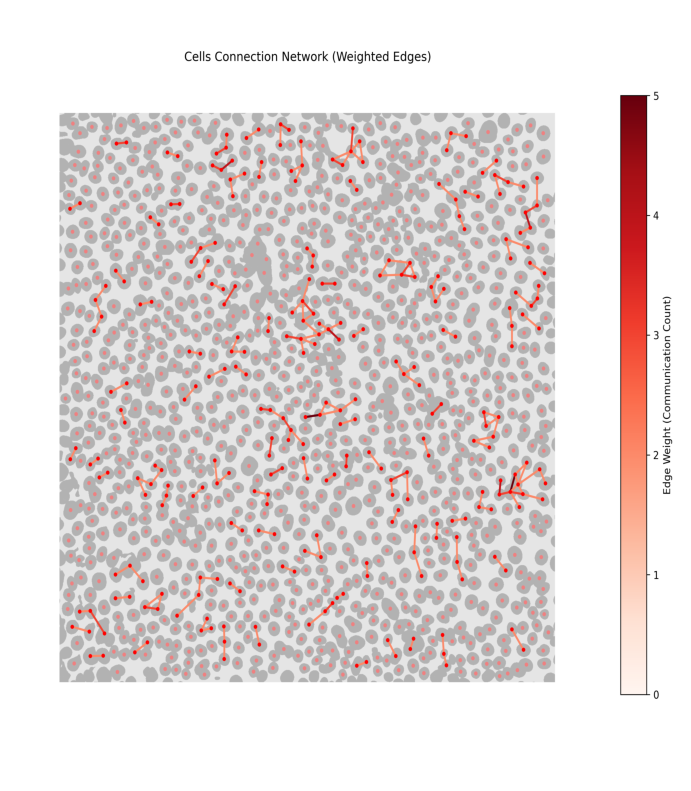

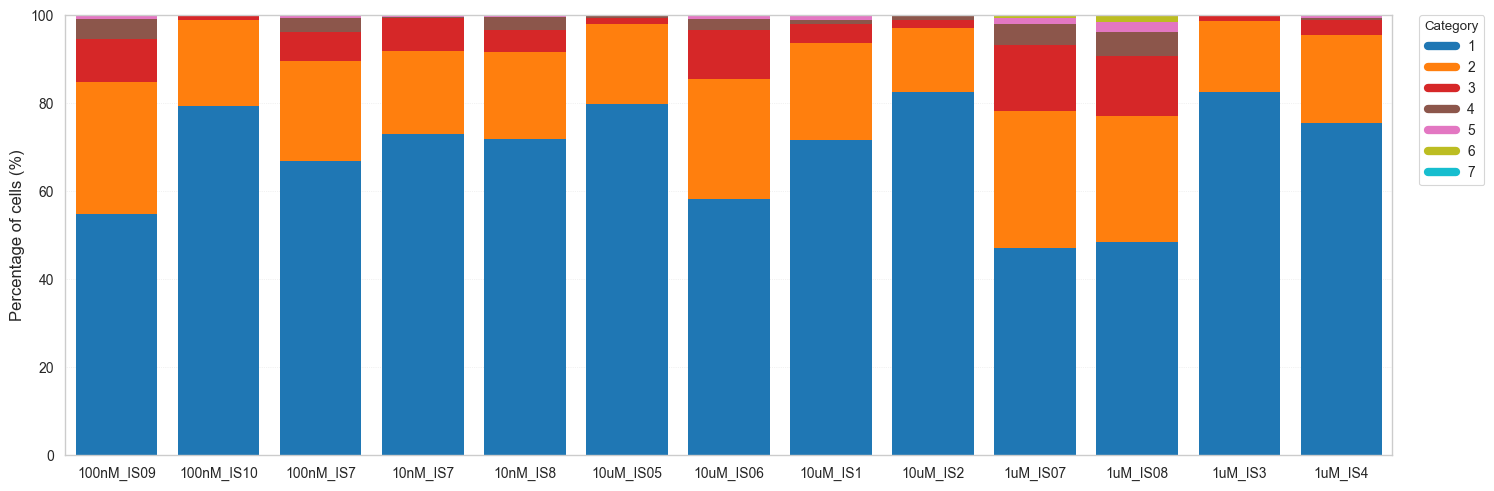

WindowsPath('C:/Users/poseidon/OneDrive/Documents/01_ETHZ/Master_Degree/Spring_Semester_2025/Master_Thesis/Report/Figures/Chapter_4/figure_3_8/distribution_highly_connected_cells_by_dataset.svg')

In [60]:
plot_histogram(
    df=pairs_communication_df[pairs_communication_df["dataset"]=="20250326_IS1"],
    column="n_communications",
    ylabel="Number of pairs",
    xlabel="Number of communications per pair",
    bin_width=1,
    filter_outliers=False,
    outliers_bounds=(3,3),
    save_svg_path=figure_path_ach / "figure_3_8/reference_pair_communication_frequency_distribution.svg"
)

visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_connection_network/cell_connection_network_95.png",
    figsize=(7, 8)
)

plot_category_distribution_by_dataset(
    df=highly_connected_cells,
    category_col="Number of highly connected pairs",
    dataset_col="dataset name",
    ylabel="Percentage of cells (%)",
    save_path=figure_path_ach / "figure_3_8/distribution_highly_connected_cells_by_dataset.svg",
    figsize=(15, 5)
)

[2025-08-26 13:17:24] [INFO] calcium: plot_points_mean_std: N=3141 for Number of highly connected pairs=1
[2025-08-26 13:17:24] [INFO] calcium: plot_points_mean_std: N=1204 for Number of highly connected pairs=2
[2025-08-26 13:17:24] [INFO] calcium: plot_points_mean_std: N=415 for Number of highly connected pairs=3
[2025-08-26 13:17:24] [INFO] calcium: plot_points_mean_std: N=133 for Number of highly connected pairs=4
[2025-08-26 13:17:24] [INFO] calcium: plot_points_mean_std: N=43 for Number of highly connected pairs=5
[2025-08-26 13:17:24] [INFO] calcium: plot_points_mean_std: N=15 for Number of highly connected pairs=6
[2025-08-26 13:17:24] [INFO] calcium: plot_points_mean_std: N=1 for Number of highly connected pairs=7


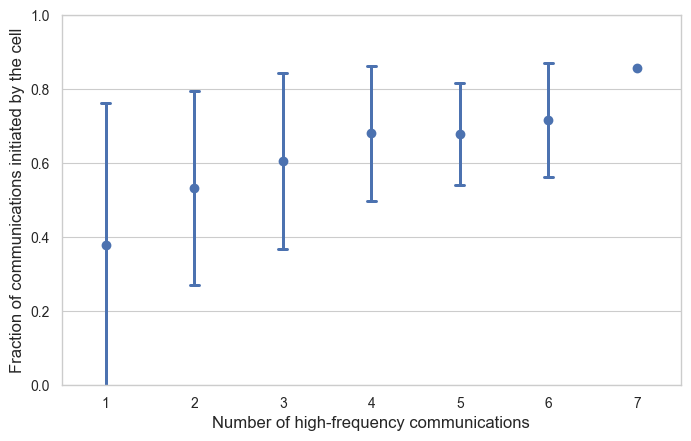

group1  group2    n1    n2   median1      q1_1      q3_1   median2  \
0        1       2  3141  1204  0.333333  0.000000  0.666667  0.500000   
1        1       3  3141   415  0.333333  0.000000  0.666667  0.666667   
2        1       4  3141   133  0.333333  0.000000  0.666667  0.666667   
3        2       4  1204   133  0.500000  0.500000  0.666667  0.666667   
4        1       5  3141    43  0.333333  0.000000  0.666667  0.650000   
5        2       3  1204   415  0.500000  0.500000  0.666667  0.666667   
6        2       5  1204    43  0.500000  0.500000  0.666667  0.650000   
7        1       6  3141    15  0.333333  0.000000  0.666667  0.714286   
8        2       6  1204    15  0.500000  0.500000  0.666667  0.714286   
9        3       4   415   133  0.666667  0.477273  0.714286  0.666667   
10       3       5   415    43  0.666667  0.477273  0.714286  0.650000   
11       3       6   415    15  0.666667  0.477273  0.714286  0.714286   
12       1       7  3141     1  0.333333  0.000000  0.666667  0.857143   
13       2       7  1204     1  0.500000  0.500000  0.666667  0.857143   
14       3       7   415     1  0.666667  0.477273  0.714286  0.857143   
15       4       5   133    43  0.666667  0.500000  0.800000  0.650000   
16       4       6   133    15  0.666667  0.500000  0.800000  0.714286   
17       4       7   133     1  0.666667  0.500000  0.800000  0.857143   
18       5       6    43    15  0.650000  0.600000  0.800000  0.714286   
19       5       7    43     1  0.650000  0.600000  0.800000  0.857143   
20       6       7    15     1  0.714286  0.598214  0.857143  0.857143   

        q1_2      q3_2       mw_U          mw_p      vd_A  cliffs_delta  \
0   0.500000  0.666667  1381580.5  5.014016e-46  0.365327     -0.269346   
1   0.477273  0.714286   403548.0  2.183505e-39  0.309584     -0.380831   
2   0.500000  0.800000   106926.0  1.317449e-23  0.255955     -0.488090   
3   0.500000  0.800000    49506.0  6.987596e-14  0.309157     -0.381685   
4   0.600000  0.800000    33186.5  1.568781e-09  0.245711     -0.508577   
5   0.477273  0.714286   202368.0  3.325903e-09  0.405011     -0.189977   
6   0.600000  0.800000    14328.0  2.319918e-07  0.276752     -0.446496   
7   0.598214  0.857143    10977.5  2.047645e-04  0.232994     -0.534013   
8   0.598214  0.857143     4595.5  7.522433e-04  0.254457     -0.491085   
9   0.500000  0.800000    22975.5  3.318114e-03  0.416261     -0.167479   
10  0.600000  0.800000     7409.0  6.348923e-02  0.415186     -0.169627   
11  0.598214  0.857143     2223.5  5.991318e-02  0.357189     -0.285622   
12  0.857143  0.857143      623.0  3.971992e-01  0.198344     -0.603311   
13  0.857143  0.857143      159.0  2.655602e-01  0.132060     -0.735880   
14  0.857143  0.857143       60.5  2.980769e-01  0.145783     -0.708434   
15  0.600000  0.800000     2751.5  7.092957e-01  0.481116     -0.037769   
16  0.598214  0.857143      871.5  4.308259e-01  0.436842     -0.126316   
17  0.857143  0.857143       20.5  3.283582e-01  0.154135     -0.691729   
18  0.598214  0.857143      273.0  3.881941e-01  0.423256     -0.153488   
19  0.857143  0.857143        3.0  1.818182e-01  0.069767     -0.860465   
20  0.857143  0.857143        4.0  6.250000e-01  0.266667     -0.466667   

    median_diff  med_ci_low  med_ci_high         p_adj  reject  
0     -0.166667   -0.166667     0.000000  1.052943e-44    True  
1     -0.333333   -0.333333    -0.166667  4.367009e-38    True  
2     -0.333333   -0.416667    -0.166667  2.503153e-22    True  
3     -0.166667   -0.250000    -0.100000  1.257767e-12    True  
4     -0.316667   -0.380952    -0.166667  2.666928e-08    True  
5     -0.166667   -0.166667    -0.166667  5.321444e-08    True  
6     -0.150000   -0.215659    -0.100000  3.479876e-06    True  
7     -0.380952   -0.523810    -0.214286  2.866703e-03    True  
8     -0.214286   -0.357143    -0.125000  9.779163e-03    True  
9      0.000000   -0.083333     0.066667  3.981737e-02    True  
10     0.

method     n  estimate       p_value    ci_low   ci_high  \
0  kendall_tau_b  4952  0.252411  9.727328e-97  0.229774  0.273637   
1       spearman  4952  0.288694  1.131524e-95  0.262912  0.313253   

   theilsen_slope  theilsen_slope_ci_low  theilsen_slope_ci_high  \
0        0.138889               0.111111                0.166667   
1        0.138889               0.111111                0.166667   

   theilsen_intercept  
0            0.361111  
1            0.361111

In [27]:
plot_points_mean_std(
    df=highly_connected_cells,
    x="Number of highly connected pairs",
    y="Origin ratio (origin/communications)",
    xlabel="Number of high-frequency communications",
    ylabel="Fraction of communications initiated by the cell",
    show_points=False,
    y_axis_boundaries=(0, 1),
    save_svg_path=figure_path_ach / "figure_3_8/origin_ratios_by_highly_connected_pairs.svg"
)

wilcoxon_results = wilcoxon_pairs(
    df=highly_connected_cells,
    group_col="Number of highly connected pairs",
    value_col="Origin ratio (origin/communications)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(wilcoxon_results)

corr_results = corr_nonparametric(
    df=highly_connected_cells,
    x_col="Number of highly connected pairs",
    y_col="Origin ratio (origin/communications)",
    methods=["spearman", "kendall"],
    alpha=0.05,
    n_boot_ci=1000,
)

display(corr_results)

[2025-08-26 13:17:28] [INFO] calcium: plot_violin: removed 393 outliers out of 22549 on 'Duration (s)' (lower=-39, upper=94)
[2025-08-26 13:17:28] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_8\distribution_peaks_duration_by_highly_connected_pairs.svg (svg)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


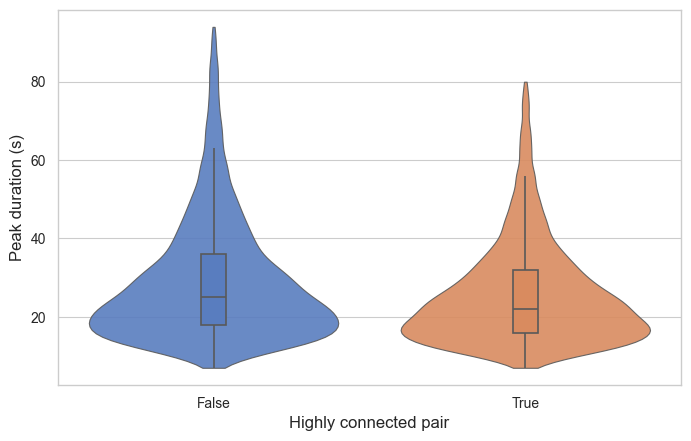

[2025-08-26 13:17:28] [INFO] calcium: plot_violin: removed 393 outliers out of 22549 on 'Duration (s)' (lower=-39, upper=94)


group1  group2     n1     n2  median1  q1_1  q3_1  median2  q1_2  q3_2  \
0   False    True  11692  10464     25.0  18.0  36.0     22.0  16.0  32.0   

     bm_stat          bm_p      vd_A  cliffs_delta  median_diff  med_ci_low  \
0 -16.282937  2.895986e-59  0.562517      0.125034          3.0         2.0   

   med_ci_high         p_adj  reject  
0          3.0  2.895986e-59    True

In [28]:
plot_violin(
    df=ach_peaks[ach_peaks["In event"] == "sequential"],
    x="from_high_comm_pair",
    y="Duration (s)",
    xlabel="Highly connected pair",
    ylabel="Peak duration (s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair",
    save_svg_path=figure_path_ach / "figure_3_8/distribution_peaks_duration_by_highly_connected_pairs.svg"
)

brunner_pairs(
    df=ach_peaks[ach_peaks["In event"] == "sequential"],
    group_col="from_high_comm_pair",
    value_col="Duration (s)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair"
)

[2025-08-26 13:17:29] [INFO] calcium: plot_violin: removed 689 outliers out of 22549 on 'Prominence (noise std units)' (lower=-56.1, upper=121)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:17:29] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_8\distribution_peaks_prominence_by_highly_connected_pairs.svg (svg)


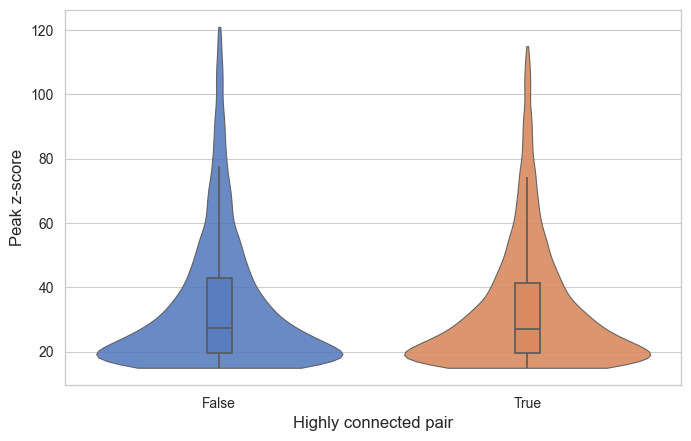

[2025-08-26 13:17:29] [INFO] calcium: plot_violin: removed 689 outliers out of 22549 on 'Prominence (noise std units)' (lower=-56.1, upper=121)


group1  group2     n1     n2  median1  q1_1  q3_1  median2  q1_2  q3_2  \
0   False    True  11555  10305     27.3  19.7  42.9     27.0  19.7  41.5   

    bm_stat      bm_p     vd_A  cliffs_delta  median_diff  med_ci_low  \
0 -1.699531  0.089233  0.50664      0.013281          0.3        -0.3   

   med_ci_high     p_adj  reject  
0          0.7  0.089233   False

In [29]:
plot_violin(
    df=ach_peaks[ach_peaks["In event"] == "sequential"],
    x="from_high_comm_pair",
    y="Prominence (noise std units)",
    xlabel="Highly connected pair",
    ylabel="Peak z-score",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair",
    save_svg_path=figure_path_ach / "figure_3_8/distribution_peaks_prominence_by_highly_connected_pairs.svg"
)

brunner_pairs(
    df=ach_peaks[ach_peaks["In event"] == "sequential"],
    group_col="from_high_comm_pair",
    value_col="Prominence (noise std units)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair"
)

[2025-08-26 13:17:29] [INFO] calcium: plot_violin: removed 232 outliers out of 16615 on 'Speed (um/s)' (lower=-16.89, upper=26.09)
[2025-08-26 13:17:30] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_8\distribution_speeds_by_highly_connected_pairs.svg (svg)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


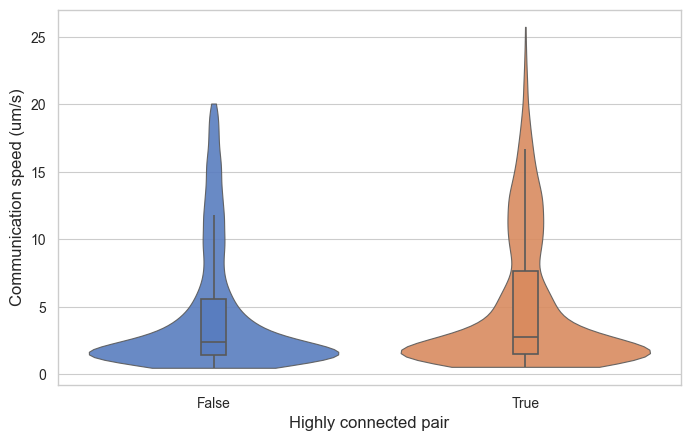

[2025-08-26 13:17:30] [INFO] calcium: plot_violin: removed 232 outliers out of 16615 on 'Speed (um/s)' (lower=-16.89, upper=26.09)


group1  group2    n1    n2  median1  q1_1  q3_1  median2  q1_2   q3_2  \
0   False    True  9769  6614     2.42  1.44   5.6     2.76  1.53  7.625   

    bm_stat          bm_p     vd_A  cliffs_delta  median_diff  med_ci_low  \
0  8.259233  1.599502e-16  0.46196     -0.076079        -0.34   -0.475125   

   med_ci_high         p_adj  reject  
0        -0.25  1.599502e-16    True

In [30]:
plot_violin(
    df=ach_communications,
    x="from_high_comm_pair",
    y="Speed (um/s)",
    xlabel="Highly connected pair",
    ylabel="Communication speed (um/s)",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair",
    save_svg_path=figure_path_ach / "figure_3_8/distribution_speeds_by_highly_connected_pairs.svg"
)

brunner_pairs(
    df=ach_communications,
    group_col="from_high_comm_pair",
    value_col="Speed (um/s)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="from_high_comm_pair"
)

## FIGURE 3.10

[2025-08-26 13:17:30] [ERROR] calcium: Failed to read image 'D:\Mateo\20250618\Output\IS1\cell-mapping\cell_Occurrences_in_individual_events_overlay.png': [Errno 2] No such file or directory: 'D:\\Mateo\\20250618\\Output\\IS1\\cell-mapping\\cell_Occurrences_in_individual_events_overlay.png'
Traceback (most recent call last):
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py", line 243, in visualize_image
    img = imread(img_path)
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\matplotlib\image.py", line 1512, in imread
    with img_open(fname) as image:
  File "c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\.venv\lib\site-packages\PIL\ImageFile.py", line 132, in __init__
    self.fp = 

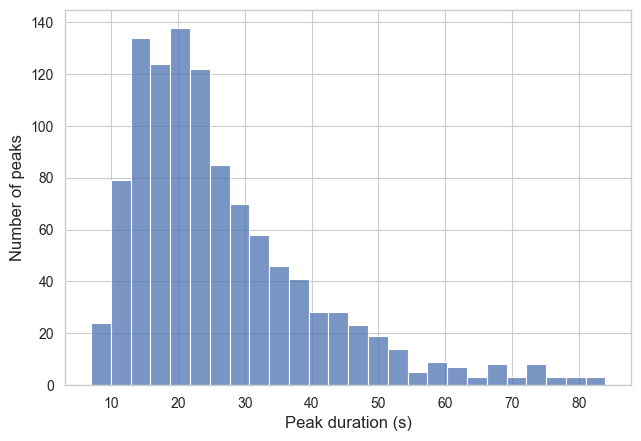

[2025-08-26 13:17:31] [INFO] calcium: plot_histogram: removed 50 outliers out of 1104 on 'Prominence (noise std units)' (lower=-26.6, upper=77)
[2025-08-26 13:17:31] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_10\reference_peaks_prominence_distribution_individual_events.svg (svg)


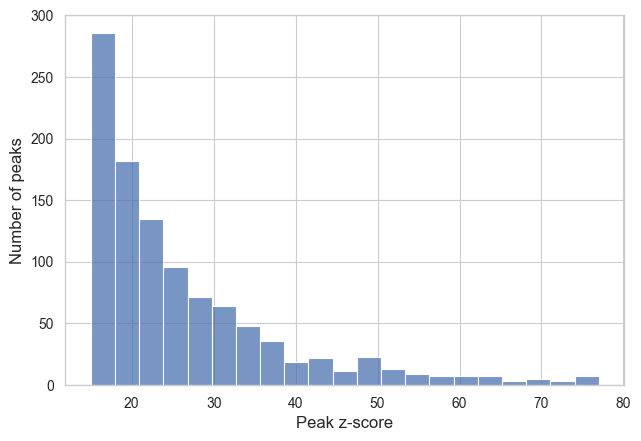

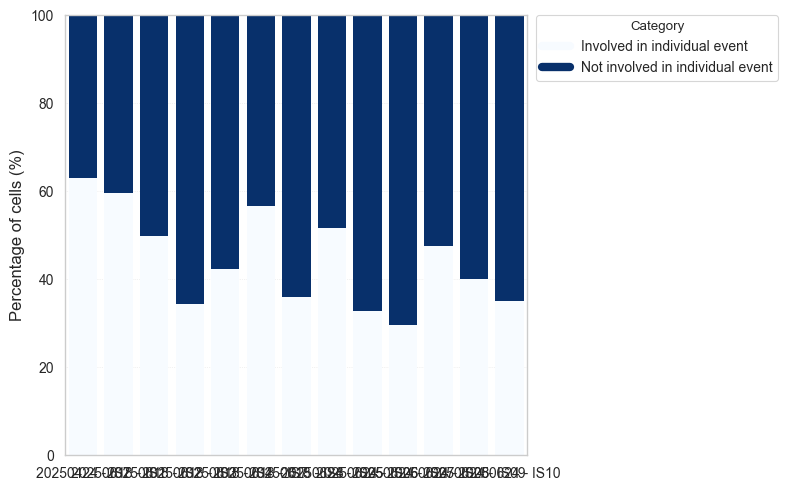

In [31]:
control_individual_peaks = ach_peaks[ach_peaks["In event"] == "individual"].copy()

visualize_image(
    image_source=reference_dataset["path"],
    image_name="cell-mapping/cell_Occurrences_in_individual_events_overlay.png",
    figsize=(7, 8)
)

plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "individual"],
    column="Duration (s)",
    ylabel="Number of peaks",
    xlabel="Peak duration (s)",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path_ach / "figure_3_10/reference_peaks_duration_distribution_individual_events.svg"
)
plot_histogram(
    df=reference_peaks[reference_peaks["In event"] == "individual"],
    column="Prominence (noise std units)",
    ylabel="Number of peaks",
    xlabel="Peak z-score",
    bin_width=3,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    return_outliers=False,
    save_svg_path=figure_path_ach / "figure_3_10/reference_peaks_prominence_distribution_individual_events.svg"
)

ach_cells["Involved in individual event"] = ach_cells["Occurrences in individual events"].apply(lambda x: "Involved in individual event" if x > 0 else "Not involved in individual event")
ach_cells["dataset name"] = ach_cells['date'].astype(str) + " - " + ach_cells['image_sequence'].astype(str)

plot_category_distribution_by_dataset(
    df=ach_cells,
    category_col="Involved in individual event",
    dataset_col="dataset name",
    ylabel="Percentage of cells (%)",
    save_path=figure_path_ach / "figure_3_10/ach_cells_involvement_in_individual_events_by_dataset.svg",
    palette="Blues"
)

ach_peaks["dataset name"] = ach_peaks['date'].astype(str) + " - " + ach_peaks['image_sequence'].astype(str)

[2025-08-26 13:33:08] [INFO] calcium: plot_violin: removed 182 outliers out of 9590 on 'Duration (s)' (lower=-54, upper=121)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:33:08] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_10\control_individual_peaks_duration_distribution.svg (svg)


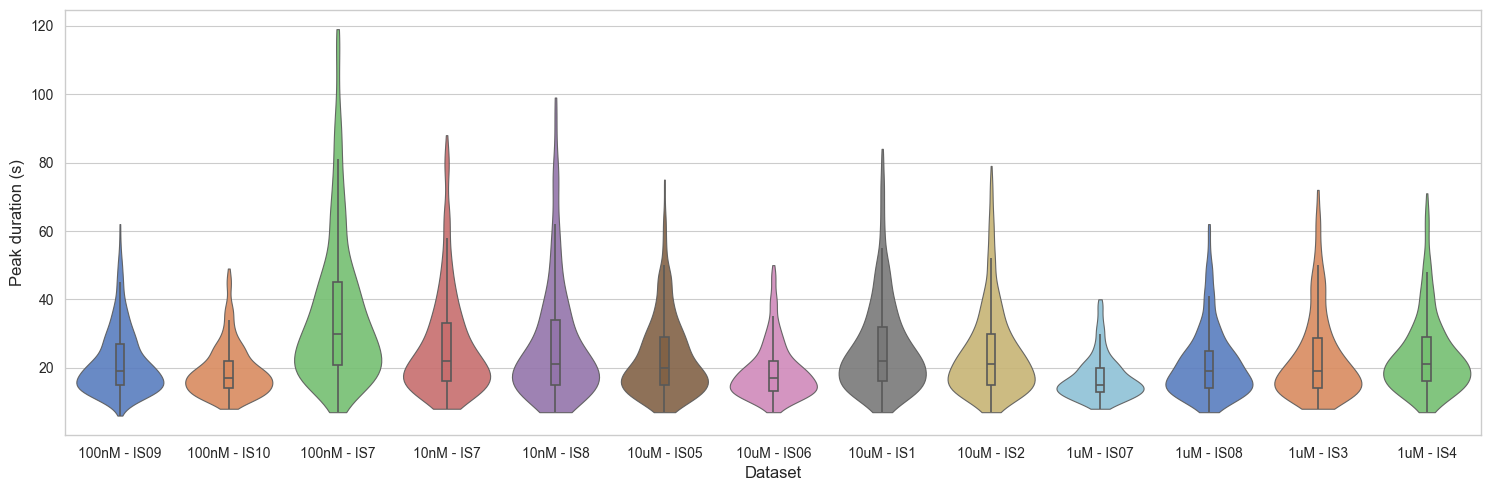

[2025-08-26 13:33:09] [INFO] calcium: plot_violin: removed 182 outliers out of 9590 on 'Duration (s)' (lower=-54, upper=121)


group1       group2    n1    n2  median1   q1_1  q3_1  median2  \
0    100nM - IS7   1uM - IS07  1108   448     30.0  20.75  45.0     15.0   
1   100nM - IS10  100nM - IS7   577  1108     17.0  14.00  22.0     30.0   
2    100nM - IS7  10uM - IS06  1108   430     30.0  20.75  45.0     17.0   
3    100nM - IS7   1uM - IS08  1108   695     30.0  20.75  45.0     19.0   
4   100nM - IS09  100nM - IS7   720  1108     19.0  15.00  27.0     30.0   
..           ...          ...   ...   ...      ...    ...   ...      ...   
73    10nM - IS8    1uM - IS4   449   663     21.0  15.00  34.0     21.0   
74   10uM - IS05    1uM - IS3   869   562     20.0  15.00  29.0     19.0   
75   10uM - IS05    1uM - IS4   869   663     20.0  15.00  29.0     21.0   
76    10uM - IS2    1uM - IS4   823   663     21.0  15.00  30.0     21.0   
77    1uM - IS08    1uM - IS3   695   562     19.0  14.00  25.0     19.0   

     q1_2   q3_2    bm_stat           bm_p      vd_A  cliffs_delta  \
0   13.00  20.00 -34.882405  4.242046e-179  0.848557      0.697114   
1   20.75  45.00  27.554107  6.288641e-135  0.203054     -0.593893   
2   13.25  22.00 -25.266391  1.789462e-107  0.799761      0.599521   
3   14.00  25.00 -21.493034   4.090665e-90  0.747204      0.494408   
4   20.75  45.00  20.935281   7.424887e-87  0.260183     -0.479634   
..    ...    ...        ...            ...       ...           ...   
73  16.00  29.00  -1.330443   1.837488e-01  0.524087      0.048175   
74  14.00  28.75  -1.052635   2.927276e-01  0.516549      0.033097   
75  16.00  29.00   1.513928   1.302549e-01  0.477635     -0.044730   
76  16.00  29.00  -0.223832   8.229192e-01  0.503358      0.006717   
77  14.00  28.75   1.608269   1.080539e-01  0.473523     -0.052953   

    median_diff  med_ci_low  med_ci_high          p_adj  reject  
0          15.0        13.0         16.0  3.308796e-177    True  
1         -13.0       -14.0        -11.0  4.842254e-133    True  
2          13.0        11.0         14.0  1.359991e-105    True  
3          11.0         9.0         13.0   3.067998e-88    True  
4         -11.0       -12.0         -9.0   5.494416e-85    True  
..          ...         ...          ...            ...     ...  
73          0.0        -1.0          2.0   1.000000e+00   False  
74          1.0        -1.0          2.0   1.000000e+00   False  
75         -1.0        -2.0          0.0   1.000000e+00   False  
76          0.0        -1.0          1.0   1.000000e+00   False  
77          0.0        -2.0          1.0   1.000000e+00   False  

[78 rows x 19 columns]

In [62]:
plot_violin(
    df=control_individual_peaks,
    x="dataset name",
    y="Duration (s)",
    ylabel="Peak duration (s)",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path_ach / "figure_3_10/control_individual_peaks_duration_distribution.svg",
    figsize=(15, 5)
)

brunner_pairs(
    df=control_individual_peaks,
    group_col="dataset name",
    value_col="Duration (s)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="dataset name"
)

[2025-08-26 13:33:39] [INFO] calcium: plot_violin: removed 356 outliers out of 9590 on 'Prominence (noise std units)' (lower=-52.075, upper=112.77)


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1092: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(**violin_kwargs)
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp_ax = sns.boxplot(


[2025-08-26 13:33:39] [INFO] calcium: plot_violin: figure saved to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_10\control_individual_peaks_prominence_distribution.svg (svg)


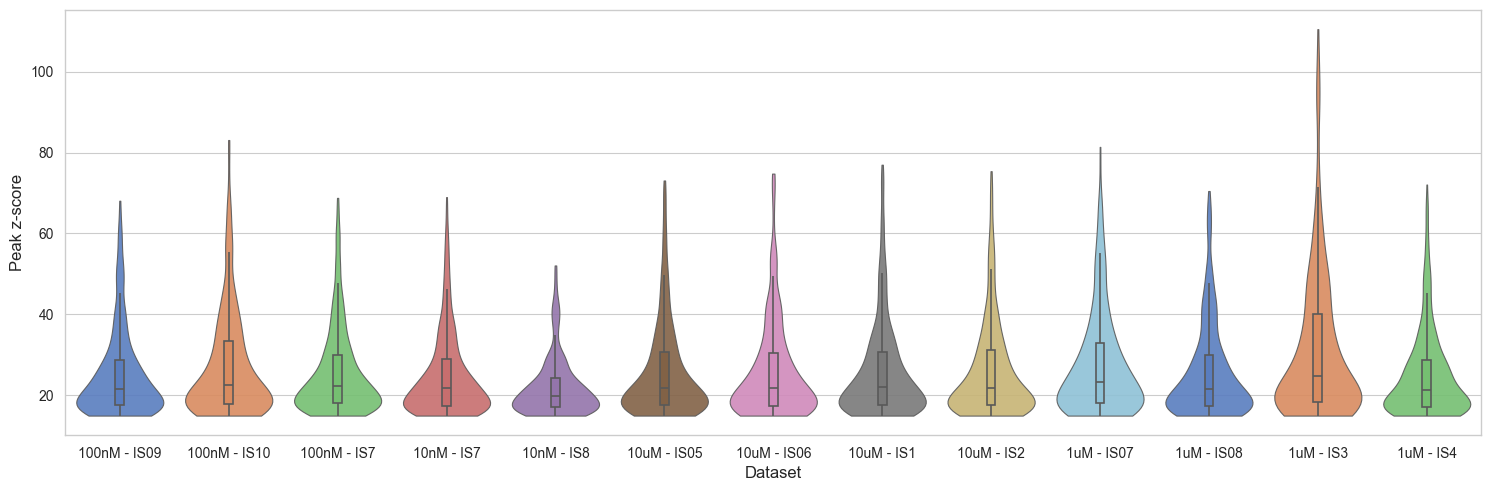

[2025-08-26 13:33:39] [INFO] calcium: plot_violin: removed 356 outliers out of 9590 on 'Prominence (noise std units)' (lower=-52.075, upper=112.77)


group1      group2    n1    n2  median1  q1_1    q3_1  median2  \
0     10nM - IS8   1uM - IS3   437   557     19.9  17.1  24.400     24.8   
1     10nM - IS8  1uM - IS07   437   439     19.9  17.1  24.400     23.3   
2    100nM - IS7  10nM - IS8  1104   437     22.2  18.1  30.000     19.9   
3   100nM - IS10  10nM - IS8   574   437     22.6  17.9  33.375     19.9   
4     10nM - IS8  10uM - IS1   437  1054     19.9  17.1  24.400     22.0   
..           ...         ...   ...   ...      ...   ...     ...      ...   
73    10uM - IS2  1uM - IS07   811   439     21.7  17.5  31.100     23.3   
74    10uM - IS2  1uM - IS08   811   681     21.7  17.5  31.100     21.6   
75    10uM - IS2   1uM - IS4   811   643     21.7  17.5  31.100     21.4   
76    1uM - IS07   1uM - IS3   439   557     23.3  18.0  32.850     24.8   
77    1uM - IS08   1uM - IS4   681   643     21.6  17.4  29.900     21.4   

      q1_2    q3_2   bm_stat          bm_p      vd_A  cliffs_delta  \
0   18.400  40.100  9.158265  3.010492e-19  0.343849     -0.312302   
1   18.000  32.850  6.749192  2.814852e-11  0.372818     -0.254364   
2   17.100  24.400 -6.598061  7.151466e-11  0.602328      0.204656   
3   17.100  24.400 -6.245042  6.234017e-10  0.609593      0.219185   
4   17.525  30.675  6.083671  1.677652e-09  0.406081     -0.187838   
..     ...     ...       ...           ...       ...           ...   
73  18.000  32.850  2.057341  3.995189e-02  0.464635     -0.070730   
74  17.400  29.900 -0.641121  5.215466e-01  0.509635      0.019271   
75  17.200  28.700 -1.400908  1.614669e-01  0.521350      0.042700   
76  18.400  40.100  2.265177  2.371849e-02  0.458656     -0.082688   
77  17.200  28.700 -0.697210  4.857942e-01  0.511073      0.022145   

    median_diff  med_ci_low  med_ci_high         p_adj  reject  
0          -4.9    -7.10000     -2.90000  2.348184e-17    True  
1          -3.4    -5.20000     -2.30000  2.167436e-09    True  
2           2.3     1.20000      3.10125  5.435114e-09    True  
3           2.7     1.50000      3.85125  4.675513e-08    True  
4          -2.1    -3.00125     -1.40000  1.241462e-07    True  
..          ...         ...          ...           ...     ...  
73         -1.6    -3.50000     -0.40000  1.000000e+00   False  
74          0.1    -1.10000      1.30000  1.000000e+00   False  
75          0.3    -1.20000      1.50000  1.000000e+00   False  
76         -1.5    -3.60000      1.00000  1.000000e+00   False  
77          0.2    -1.40250      1.40000  1.000000e+00   False  

[78 rows x 19 columns]

In [63]:
plot_violin(
    df=control_individual_peaks,
    x="dataset name",
    y="Prominence (noise std units)",
    ylabel="Peak z-score",
    xlabel="Dataset",
    width=0.8,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    dodge=False,
    outliers_bygroup="dataset name",
    save_svg_path=figure_path_ach / "figure_3_10/control_individual_peaks_prominence_distribution.svg",
    figsize=(15, 5)
)

brunner_pairs(
    df=control_individual_peaks,
    group_col="dataset name",
    value_col="Prominence (noise std units)",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm",
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="dataset name"
)

## FIGURE 3.11

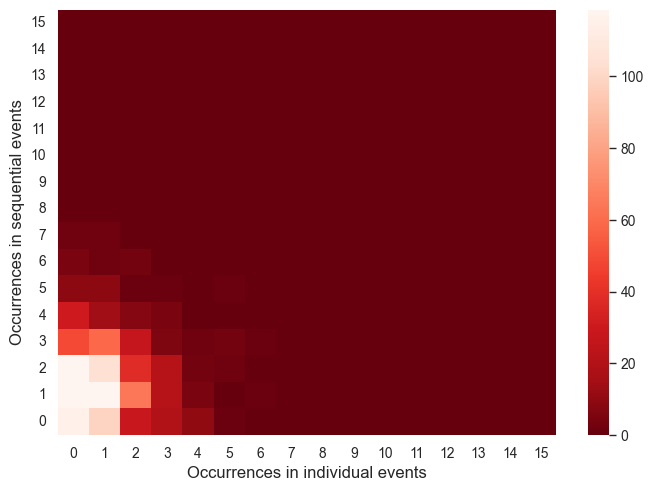

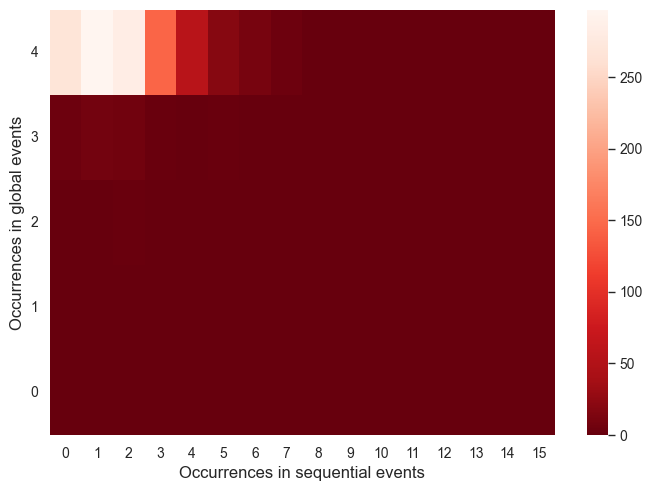

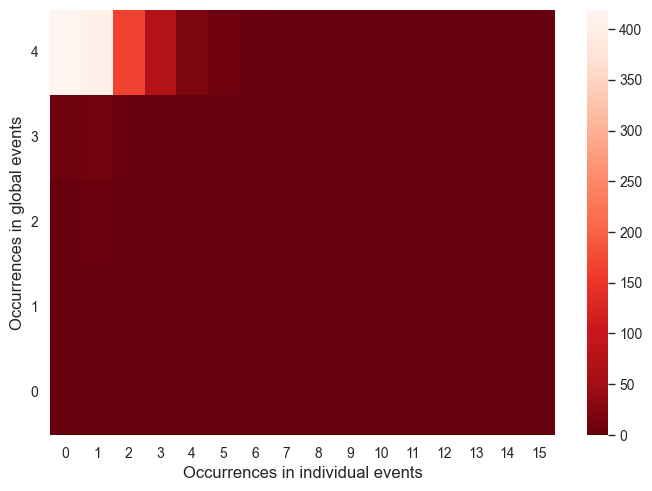

In [65]:
plot_heatmap(
    df=reference_cells,
    x="Occurrences in individual events",
    y="Occurrences in sequential events",
    bins_x=16,
    bins_y=16,
    range_x=(0,16),
    range_y=(0,16),
    stat="count",
    clip_quantiles=(0.01, 0.99),
    cmap="Reds_r",
    save_svg_path=figure_path_ach / "figure_3_11/reference_cells_individual_vs_sequential_events_heatmap.svg"
)

plot_heatmap(
    df=reference_cells,
    y="Occurrences in global events",
    x="Occurrences in sequential events",
    bins_y=5,
    bins_x=16,
    range_y=(0,5),
    range_x=(0,16),
    stat="count",
    clip_quantiles=(0.01, 0.99),
    cmap="Reds_r",
    save_svg_path=figure_path_ach / "figure_3_11/reference_cells_global_vs_sequential_events_heatmap.svg"
)

plot_heatmap(
    df=reference_cells,
    y="Occurrences in global events",
    x="Occurrences in individual events",
    bins_y=5,
    bins_x=16,
    range_y=(0,5),
    range_x=(0,16),
    stat="count",
    clip_quantiles=(0.01, 0.99),
    cmap="Reds_r",
    save_svg_path=figure_path_ach / "figure_3_11/reference_cells_individual_vs_global_events_heatmap.svg"
)


x_col = "Occurrences in individual events"
counts = ach_cells[x_col].value_counts()

valid_x = counts[counts >= 20].index
indiv_filtered_cells = ach_cells[ach_cells[x_col].isin(valid_x)]

x_col = "Occurrences in sequential events"
counts = ach_cells[x_col].value_counts()

valid_x = counts[counts >= 20].index
seq_filtered_cells = ach_cells[ach_cells[x_col].isin(valid_x)]

[2025-08-26 13:17:41] [INFO] calcium: plot_points_mean_std: removed 21/14370 outliers on 'Occurrences in sequential events' (lower=-6, upper=8)
[2025-08-26 13:17:41] [INFO] calcium: plot_points_mean_std: N=8008 for Occurrences in individual events=0
[2025-08-26 13:17:41] [INFO] calcium: plot_points_mean_std: N=4152 for Occurrences in individual events=1
[2025-08-26 13:17:41] [INFO] calcium: plot_points_mean_std: N=1506 for Occurrences in individual events=2
[2025-08-26 13:17:41] [INFO] calcium: plot_points_mean_std: N=497 for Occurrences in individual events=3
[2025-08-26 13:17:41] [INFO] calcium: plot_points_mean_std: N=142 for Occurrences in individual events=4
[2025-08-26 13:17:41] [INFO] calcium: plot_points_mean_std: N=44 for Occurrences in individual events=5


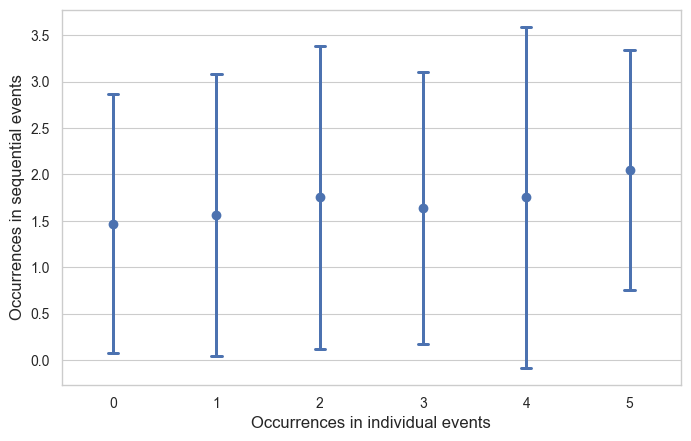

group1  group2    n1    n2  median1  q1_1  q3_1  median2  q1_2  q3_2  \
0        0       2  8015  1510      1.0   0.0   2.0      1.0   1.0   3.0   
1        1       2  4161  1510      1.0   0.0   2.0      1.0   1.0   3.0   
2        0       5  8015    44      1.0   0.0   2.0      2.0   1.0   3.0   
3        1       5  4161    44      1.0   0.0   2.0      2.0   1.0   3.0   
4        0       3  8015   497      1.0   0.0   2.0      1.0   1.0   2.0   
5        3       5   497    44      1.0   1.0   2.0      2.0   1.0   3.0   
6        0       1  8015  4161      1.0   0.0   2.0      1.0   0.0   2.0   
7        2       5  1510    44      1.0   1.0   3.0      2.0   1.0   3.0   
8        4       5   143    44      1.0   0.0   2.0      2.0   1.0   3.0   
9        1       3  4161   497      1.0   0.0   2.0      1.0   1.0   2.0   
10       0       4  8015   143      1.0   0.0   2.0      1.0   0.0   2.0   
11       1       4  4161   143      1.0   0.0   2.0      1.0   0.0   2.0   
12       2       3  1510   497      1.0   1.0   3.0      1.0   1.0   2.0   
13       2       4  1510   143      1.0   1.0   3.0      1.0   0.0   2.0   
14       3       4   497   143      1.0   1.0   2.0      1.0   0.0   2.0   

     bm_stat          bm_p      vd_A  cliffs_delta  median_diff  med_ci_low  \
0   5.565207  2.967416e-08  0.455226     -0.089549          0.0         0.0   
1   3.864846  1.138781e-04  0.467245     -0.065510          0.0         0.0   
2   3.441346  1.289761e-03  0.359621     -0.280758         -1.0        -2.0   
3   3.137467  3.033755e-03  0.374446     -0.251109         -1.0        -2.0   
4   2.558562  1.077286e-02  0.467004     -0.065992          0.0         0.0   
5   2.525075  1.464085e-02  0.392034     -0.215932         -1.0        -2.0   
6   2.139850  3.239680e-02  0.488481     -0.023037          0.0         0.0   
7   2.228533  3.070852e-02  0.411439     -0.177122         -1.0        -2.0   
8   2.205946  2.996148e-02  0.398999     -0.202003         -1.0        -2.0   
9   1.592603  1.117474e-01  0.479261     -0.041478          0.0         0.0   
10  1.097894  2.740623e-01  0.472010     -0.055981          0.0        -1.0   
11  0.671655  5.028379e-01  0.483079     -0.033842          0.0        -1.0   
12 -0.910507  3.627963e-01  0.512949      0.025897          0.0         0.0   
13 -0.554628  5.798996e-01  0.514197      0.028393          0.0        -1.0   
14 -0.084112  9.330502e-01  0.502357      0.004714          0.0        -1.0   

    med_ci_high         p_adj  reject  
0           0.0  4.451124e-07    True  
1           0.0  1.594293e-03    True  
2          -1.0  1.676690e-02    True  
3          -1.0  3.640507e-02    True  
4           0.0  1.185015e-01   False  
5          -1.0  1.464085e-01   False  
6           0.0  2.696534e-01   False  
7          -1.0  2.696534e-01   False  
8           0.0  2.696534e-01   False  
9           0.0  6.704846e-01   False  
10          0.0  1.000000e+00   False  
11          0.0  1.000000e+00   False  
12          0.0  1.000000e+00   False  
13          0.0  1.000000e+00   False  
14          0.0  1.000000e+00   False

method      n  estimate       p_value    ci_low   ci_high  \
0  kendall_tau_b  14370  0.040620  1.265674e-08  0.025548  0.054750   
1       spearman  14370  0.047584  1.150863e-08  0.029996  0.064093   

   theilsen_slope  theilsen_slope_ci_low  theilsen_slope_ci_high  \
0             0.0                    0.0                     0.0   
1             0.0                    0.0                     0.0   

   theilsen_intercept  
0                 1.0  
1                 1.0

In [35]:
plot_points_mean_std(
    df= indiv_filtered_cells,
    y="Occurrences in sequential events",
    x="Occurrences in individual events",
    save_svg_path=figure_path_ach / "figure_3_11/ach_cells_individual_vs_sequential_events_points.svg",
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)

brunner_results = brunner_pairs(
    df=indiv_filtered_cells,
    group_col="Occurrences in individual events",
    value_col="Occurrences in sequential events",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(brunner_results)

corr_results = corr_nonparametric(
    df=indiv_filtered_cells,
    x_col="Occurrences in individual events",
    y_col="Occurrences in sequential events",
    methods=["spearman", "kendall"],
    n_boot_ci=1000,
    alpha=0.05
)

display(corr_results)

[2025-08-26 13:17:50] [INFO] calcium: plot_points_mean_std: removed 0/14368 outliers on 'Occurrences in global events' (lower=-2, upper=12)
[2025-08-26 13:17:50] [INFO] calcium: plot_points_mean_std: N=3823 for Occurrences in sequential events=0
[2025-08-26 13:17:50] [INFO] calcium: plot_points_mean_std: N=4591 for Occurrences in sequential events=1
[2025-08-26 13:17:50] [INFO] calcium: plot_points_mean_std: N=2935 for Occurrences in sequential events=2
[2025-08-26 13:17:50] [INFO] calcium: plot_points_mean_std: N=1567 for Occurrences in sequential events=3
[2025-08-26 13:17:50] [INFO] calcium: plot_points_mean_std: N=782 for Occurrences in sequential events=4
[2025-08-26 13:17:50] [INFO] calcium: plot_points_mean_std: N=374 for Occurrences in sequential events=5
[2025-08-26 13:17:50] [INFO] calcium: plot_points_mean_std: N=183 for Occurrences in sequential events=6
[2025-08-26 13:17:50] [INFO] calcium: plot_points_mean_std: N=75 for Occurrences in sequential events=7
[2025-08-26 13:17

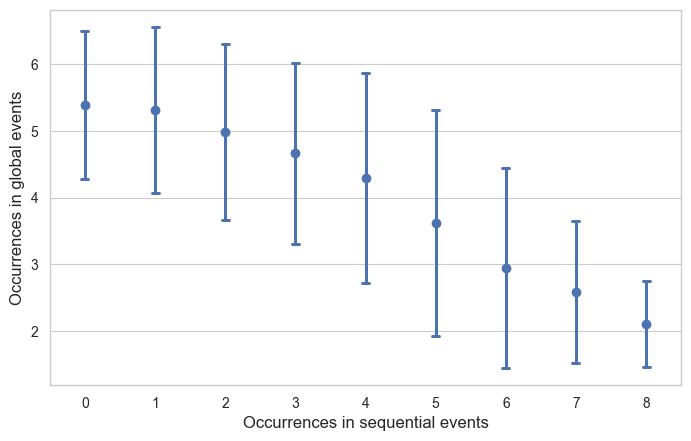

group1  group2    n1    n2  median1  q1_1  q3_1  median2  q1_2  q3_2  \
0        0       3  3823  1567      6.0   4.0   6.0      5.0   4.0   6.0   
1        0       4  3823   782      6.0   4.0   6.0      4.0   4.0   6.0   
2        0       5  3823   374      6.0   4.0   6.0      4.0   2.0   5.0   
3        1       3  4591  1567      5.0   4.0   6.0      5.0   4.0   6.0   
4        1       4  4591   782      5.0   4.0   6.0      4.0   4.0   6.0   
5        1       5  4591   374      5.0   4.0   6.0      4.0   2.0   5.0   
6        0       6  3823   183      6.0   4.0   6.0      2.0   2.0   4.0   
7        1       6  4591   183      5.0   4.0   6.0      2.0   2.0   4.0   
8        0       7  3823    75      6.0   4.0   6.0      2.0   2.0   2.5   
9        1       7  4591    75      5.0   4.0   6.0      2.0   2.0   2.5   
10       2       6  2935   183      5.0   4.0   6.0      2.0   2.0   4.0   
11       0       2  3823  2935      6.0   4.0   6.0      5.0   4.0   6.0   
12       2       5  2935   374      5.0   4.0   6.0      4.0   2.0   5.0   
13       2       7  2935    75      5.0   4.0   6.0      2.0   2.0   2.5   
14       3       6  1567   183      5.0   4.0   6.0      2.0   2.0   4.0   
15       3       7  1567    75      5.0   4.0   6.0      2.0   2.0   2.5   
16       0       8  3823    38      6.0   4.0   6.0      2.0   2.0   2.0   
17       1       2  4591  2935      5.0   4.0   6.0      5.0   4.0   6.0   
18       1       8  4591    38      5.0   4.0   6.0      2.0   2.0   2.0   
19       4       7   782    75      4.0   4.0   6.0      2.0   2.0   2.5   
20       2       8  2935    38      5.0   4.0   6.0      2.0   2.0   2.0   
21       4       8   782    38      4.0   4.0   6.0      2.0   2.0   2.0   
22       3       8  1567    38      5.0   4.0   6.0      2.0   2.0   2.0   
23       4       6   782   183      4.0   4.0   6.0      2.0   2.0   4.0   
24       2       4  2935   782      5.0   4.0   6.0      4.0   4.0   6.0   
25       3       5  1567   374      5.0   4.0   6.0      4.0   2.0   5.0   
26       5       8   374    38      4.0   2.0   5.0      2.0   2.0   2.0   
27       2       3  2935  1567      5.0   4.0   6.0      5.0   4.0   6.0   
28       5       7   374    75      4.0   2.0   5.0      2.0   2.0   2.5   
29       4       5   782   374      4.0   4.0   6.0      4.0   2.0   5.0   
30       6       8   183    38      2.0   2.0   4.0      2.0   2.0   2.0   
31       5       6   374   183      4.0   2.0   5.0      2.0   2.0   4.0   
32       3       4  1567   782      5.0   4.0   6.0      4.0   4.0   6.0   
33       7       8    75    38      2.0   2.0   2.5      2.0   2.0   2.0   
34       0       1  3823  4591      6.0   4.0   6.0      5.0   4.0   6.0   
35       6       7   183    75      2.0   2.0   4.0      2.0   2.0   2.5   

      bm_stat          bm_p      vd_A  cliffs_delta  median_diff  med_ci_low  \
0  -18.495651  8.390178e-72  0.650106      0.300212          1.0         0.0   
1  -17.886503  4.510863e-62  0.691630      0.383260          2.0         1.0   
2  -19.051053  5.810020e-58  0.776303      0.552607          2.0         1.0   
3  -16.327103  3.222278e-57  0.627552      0.255104          0.0         0.0   
4  -16.592748  1.001209e-54  0.673775      0.347549          1.0         1.0   
5  -18.221521  2.003758e-54  0.762914      0.525828          1.0         1.0   
6  -21.608629  1.546653e-52  0.871564      0.743128          4.0         3.0   
7  -20.984680  6.421102e-51  0.861384      0.722767          3.0         3.0   
8  -30.960385  1.156347e-44  0.939721      0.879442          4.0         3.0   
9  -27.197460  9.370222e-41  0.926363      0.852726          3.0         3.0   
10 -17.121621  2.549471e-40  0.826920      0.653840          3.0         3.0   
11 -13.138033  7.646737e-39  0.590390      0.180779          1.0         0.0   
12 -13.511417  1.038763e-34  0.714949      0.429897          1.0         1.0   
13 -20.910506  1.886697e-33  0.895205      0.790410          3.0       

method      n  estimate        p_value    ci_low   ci_high  \
0  kendall_tau_b  14368 -0.216056  3.099570e-222 -0.228915 -0.203257   
1       spearman  14368 -0.263015  5.971054e-226 -0.278281 -0.247504   

   theilsen_slope  theilsen_slope_ci_low  theilsen_slope_ci_high  \
0             0.0                  -0.25                     0.0   
1             0.0                  -0.25                     0.0   

   theilsen_intercept  
0                 5.0  
1                 5.0

In [36]:

plot_points_mean_std(
    df= seq_filtered_cells,
    x="Occurrences in sequential events",
    y="Occurrences in global events",
    save_svg_path=figure_path_ach / "figure_3_11/ach_cells_sequential_vs_global_events_points.svg",
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)

brunner_results = brunner_pairs(
    df=seq_filtered_cells,
    group_col="Occurrences in sequential events",
    value_col="Occurrences in global events",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(brunner_results)

corr_results = corr_nonparametric(
    df=seq_filtered_cells,
    x_col="Occurrences in sequential events",
    y_col="Occurrences in global events",
    methods=["spearman", "kendall"],
    n_boot_ci=1000,
    alpha=0.05
)

display(corr_results)

[2025-08-26 13:18:00] [INFO] calcium: plot_points_mean_std: removed 0/14370 outliers on 'Occurrences in global events' (lower=-2, upper=12)
[2025-08-26 13:18:00] [INFO] calcium: plot_points_mean_std: N=8015 for Occurrences in individual events=0
[2025-08-26 13:18:00] [INFO] calcium: plot_points_mean_std: N=4161 for Occurrences in individual events=1
[2025-08-26 13:18:00] [INFO] calcium: plot_points_mean_std: N=1510 for Occurrences in individual events=2
[2025-08-26 13:18:00] [INFO] calcium: plot_points_mean_std: N=497 for Occurrences in individual events=3
[2025-08-26 13:18:00] [INFO] calcium: plot_points_mean_std: N=143 for Occurrences in individual events=4
[2025-08-26 13:18:00] [INFO] calcium: plot_points_mean_std: N=44 for Occurrences in individual events=5


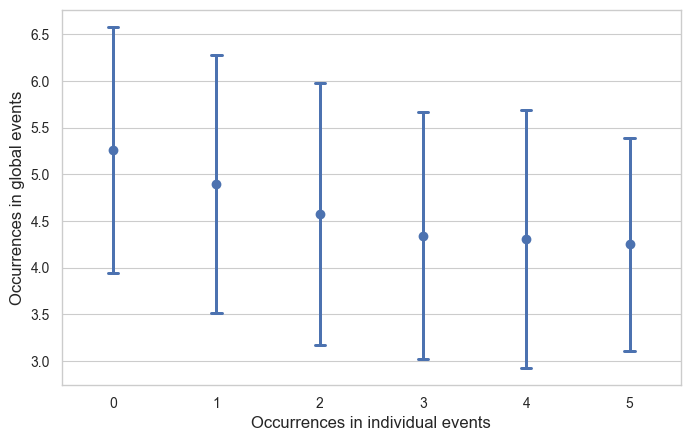

group1  group2    n1    n2  median1  q1_1  q3_1  median2  q1_2  q3_2  \
0        0       2  8015  1510      5.0   4.0   6.0      4.0   4.0   6.0   
1        0       3  8015   497      5.0   4.0   6.0      4.0   4.0   5.0   
2        0       1  8015  4161      5.0   4.0   6.0      5.0   4.0   6.0   
3        1       3  4161   497      5.0   4.0   6.0      4.0   4.0   5.0   
4        0       4  8015   143      5.0   4.0   6.0      4.0   4.0   5.0   
5        1       2  4161  1510      5.0   4.0   6.0      4.0   4.0   6.0   
6        0       5  8015    44      5.0   4.0   6.0      4.0   4.0   5.0   
7        1       4  4161   143      5.0   4.0   6.0      4.0   4.0   5.0   
8        1       5  4161    44      5.0   4.0   6.0      4.0   4.0   5.0   
9        2       3  1510   497      4.0   4.0   6.0      4.0   4.0   5.0   
10       2       4  1510   143      4.0   4.0   6.0      4.0   4.0   5.0   
11       2       5  1510    44      4.0   4.0   6.0      4.0   4.0   5.0   
12       3       4   497   143      4.0   4.0   5.0      4.0   4.0   5.0   
13       3       5   497    44      4.0   4.0   5.0      4.0   4.0   5.0   
14       4       5   143    44      4.0   4.0   5.0      4.0   4.0   5.0   

      bm_stat          bm_p      vd_A  cliffs_delta  median_diff  med_ci_low  \
0  -18.178330  9.254210e-69  0.635751      0.271502          1.0         0.0   
1  -16.572852  1.158951e-50  0.687319      0.374637          1.0         1.0   
2  -14.056076  2.273952e-44  0.574513      0.149025          0.0         0.0   
3   -9.355917  1.322229e-19  0.614536      0.229071          1.0         1.0   
4   -9.163325  3.736665e-16  0.682555      0.365111          1.0         0.0   
5   -7.515326  7.657038e-14  0.562164      0.124327          1.0         0.0   
6   -7.141930  7.074700e-09  0.713950      0.427899          1.0         0.0   
7   -4.917969  2.217073e-06  0.607444      0.214887          1.0         0.0   
8   -4.105945  1.681775e-04  0.635626      0.271253          1.0         0.0   
9   -3.747092  1.900653e-04  0.552069      0.104137          0.0         0.0   
10  -1.858035  6.485715e-02  0.544063      0.088126          0.0        -1.0   
11  -1.936555  5.872811e-02  0.568867      0.137733          0.0        -1.0   
12   0.335453  7.376049e-01  0.490974     -0.018052          0.0        -1.0   
13  -0.285372  7.764361e-01  0.511318      0.022636          0.0        -1.0   
14  -0.594739  5.534448e-01  0.526383      0.052765          0.0        -1.0   

    med_ci_high         p_adj  reject  
0           1.0  1.388131e-67    True  
1           1.0  1.622531e-49    True  
2           0.0  2.956138e-43    True  
3           1.0  1.586675e-18    True  
4           1.0  4.110331e-15    True  
5           1.0  7.657038e-13    True  
6           1.0  6.367230e-08    True  
7           1.0  1.773659e-05    True  
8           1.0  1.177242e-03    True  
9           1.0  1.177242e-03    True  
10          1.0  2.936405e-01   False  
11          1.0  2.936405e-01   False  
12          0.0  1.000000e+00   False  
13          0.0  1.000000e+00   False  
14          1.0  1.000000e+00   False

method      n  estimate        p_value    ci_low   ci_high  \
0  kendall_tau_b  14370 -0.169631  1.439513e-124 -0.183383 -0.156197   
1       spearman  14370 -0.197920  7.097046e-127 -0.213901 -0.182475   

   theilsen_slope  theilsen_slope_ci_low  theilsen_slope_ci_high  \
0             0.0                    0.0                     0.0   
1             0.0                    0.0                     0.0   

   theilsen_intercept  
0                 5.0  
1                 5.0

x = 0: 8015 points
x = 1: 4161 points
x = 2: 1510 points
x = 3: 497 points
x = 4: 143 points
x = 5: 44 points
x = 6: 12 points
x = 7: 3 points
x = 8: 3 points
x = 9: 1 points


In [37]:

plot_points_mean_std(
    df= indiv_filtered_cells,
    x="Occurrences in individual events",
    y="Occurrences in global events",
    save_svg_path=figure_path_ach / "figure_3_11/ach_cells_individual_vs_global_events_points.svg",
    show_points=False,
    filter_outliers=True,
    outliers_bounds=(3, 3),
)


brunner_results = brunner_pairs(
    df=indiv_filtered_cells,
    group_col="Occurrences in individual events",
    value_col="Occurrences in global events",
    n_boot_ci=1000,
    alpha=0.05,
    print_results=False,
    p_adjust_method="holm"
)

display(brunner_results)

corr_results = corr_nonparametric(
    df=indiv_filtered_cells,
    x_col="Occurrences in individual events",
    y_col="Occurrences in global events",
    methods=["spearman", "kendall"],
    n_boot_ci=1000,
    alpha=0.05
)

display(corr_results)

# Count number of points per unique x value
counts = ach_cells.groupby("Occurrences in individual events").size()

# Print nicely
for x_val, n in counts.items():
    print(f"x = {x_val}: {n} points")


## CELL DENSITY

### GE & CELL DENSITY

[2025-08-26 13:37:35] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_12\global_events_vs_cells.svg


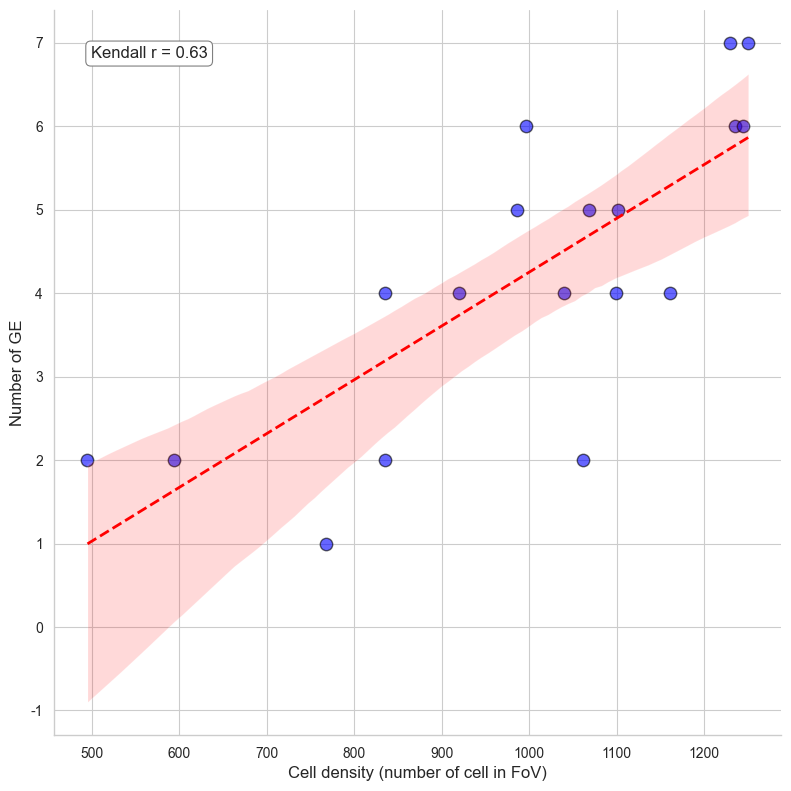

method   n  estimate   p_value    ci_low   ci_high  theilsen_slope  \
0  kendall_tau_b  18  0.633135  0.000545  0.360080  0.822121        0.006486   
1       spearman  18  0.776236  0.000152  0.454522  0.918868        0.006486   

   theilsen_slope_ci_low  theilsen_slope_ci_high  theilsen_intercept  
0               0.003937                0.010204           -2.810155  
1               0.003937                0.010204           -2.810155

In [68]:
plot_xy_with_regression(
    data=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of global events",
    xlabel= "Cell density (number of cell in FoV)",
    ylabel="Number of GE",
    corr_method="kendall",
    save_path=figure_path_ach / "figure_3_12/global_events_vs_cells.svg"
)

corr_nonparametric(
    df=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of global events",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

[2025-08-26 13:37:46] [INFO] calcium: plot_box_median_iqr_with_trend: removed 46/83762 outliers (-464, 691)
[2025-08-26 13:37:46] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_12\control_peaks_duration_by_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


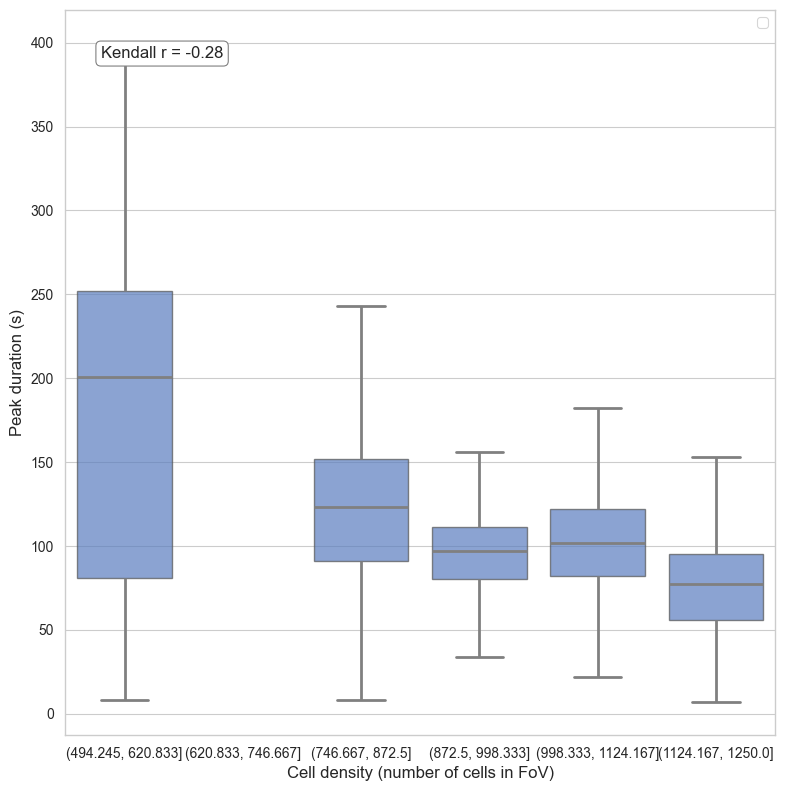

In [69]:
mapping_events_to_peaks = celldensity_events.loc[celldensity_events["Event type"] == "GlobalEvent", ["Event ID", "dataset"]]
subset_peaks_global_events = celldensity_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

plot_xy_with_regression(
    data=subset_peaks_global_events,
    x_col="Dataset cell density",
    y_col="Duration (s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak duration (s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_12/control_peaks_duration_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

[2025-08-26 13:37:53] [INFO] calcium: plot_box_median_iqr_with_trend: removed 65/83762 outliers (-1.54e+03, 2.15e+03)
[2025-08-26 13:37:54] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_12\control_peaks_prominence_by_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


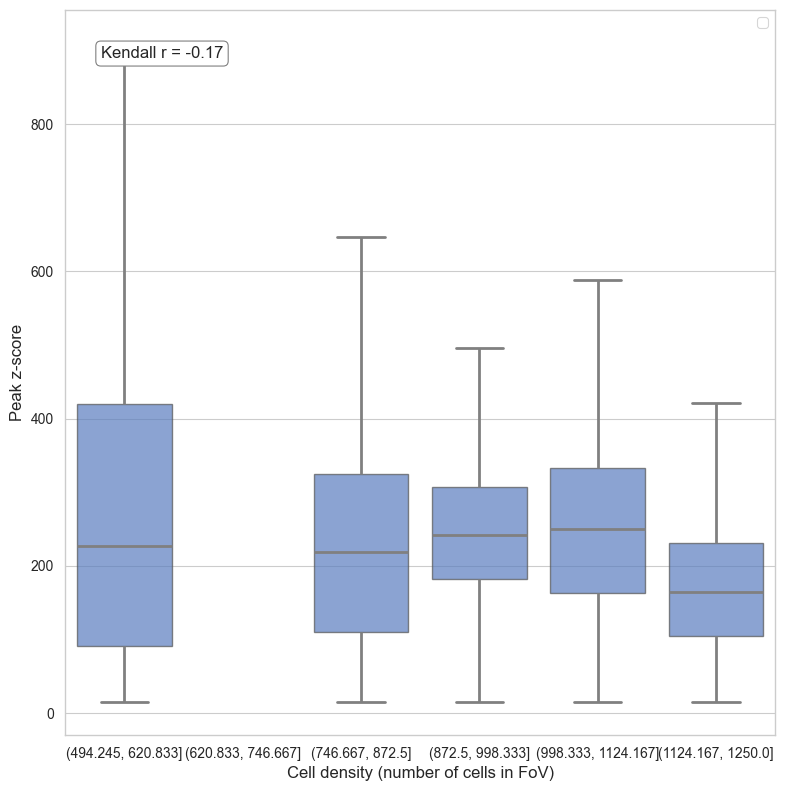

In [70]:
plot_xy_with_regression(
    data=subset_peaks_global_events,
    x_col="Dataset cell density",
    y_col="Prominence (noise std units)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak z-score",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_12/control_peaks_prominence_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

[2025-08-26 13:37:59] [INFO] calcium: plot_box_median_iqr_with_trend: removed 3/76 outliers (-6.75, 210)
[2025-08-26 13:37:59] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_12\control_t50_by_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


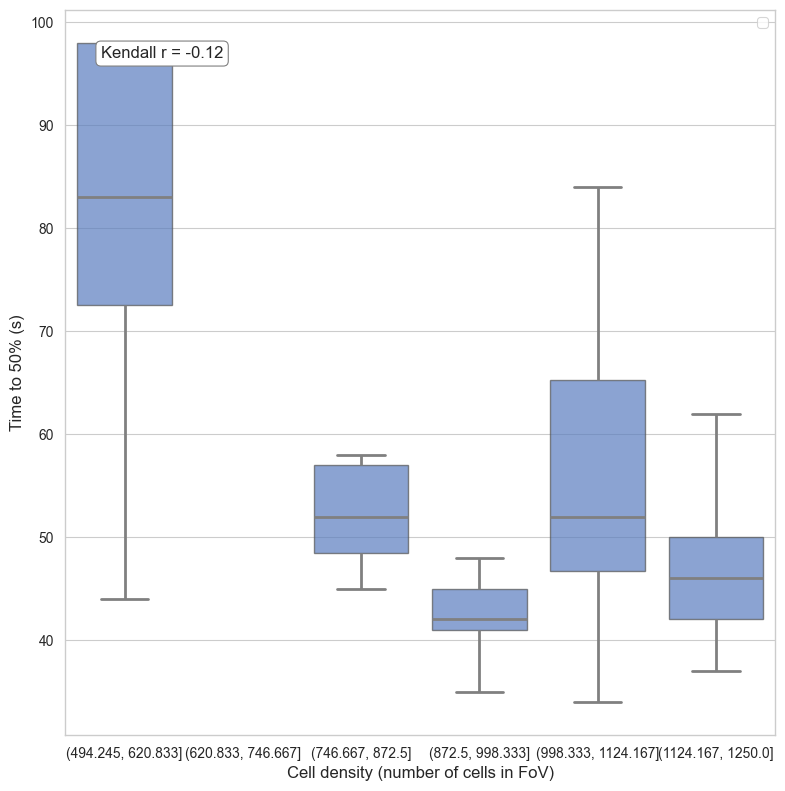

In [71]:
global_events = celldensity_events[celldensity_events["Event type"] == "GlobalEvent"].copy()

plot_xy_with_regression(
    data=global_events,
    x_col="Dataset cell density",
    y_col="Time to 50% (s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Time to 50% (s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_12/control_t50_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

[2025-08-26 13:38:07] [INFO] calcium: plot_box_median_iqr_with_trend: removed 4/76 outliers (0.075, 5.1)
[2025-08-26 13:38:07] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_12\control_normalized_peak_rate_by_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


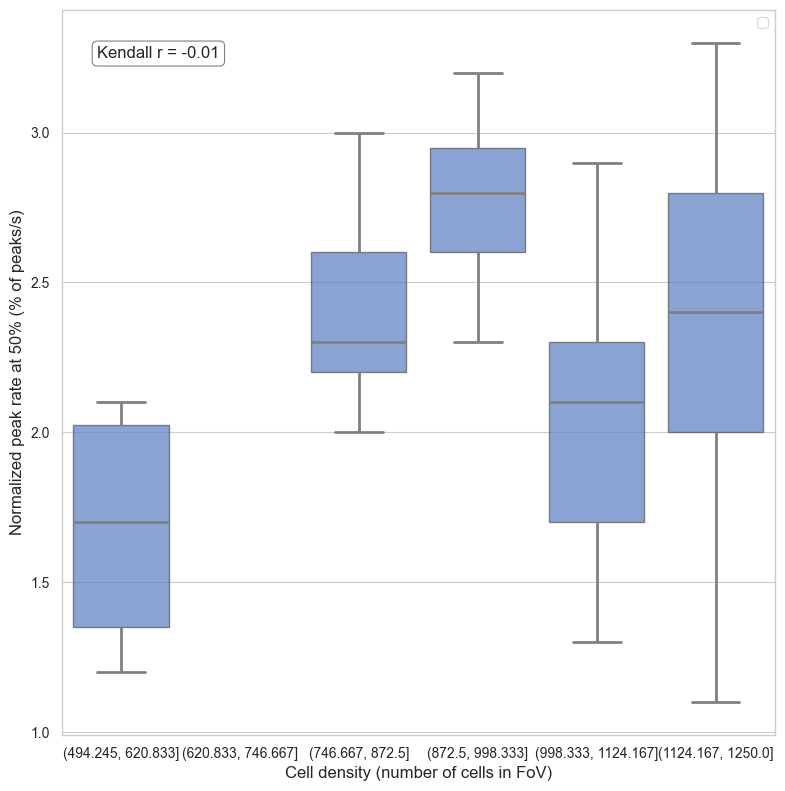

In [72]:
plot_xy_with_regression(
    data=global_events,
    x_col="Dataset cell density",
    y_col="Normalized peak rate at 50% (% of peaks/s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Normalized peak rate at 50% (% of peaks/s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_12/control_normalized_peak_rate_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

[2025-08-26 13:38:10] [INFO] calcium: plot_box_median_iqr_with_trend: removed 3/76 outliers (73.3, 114)


[2025-08-26 13:38:10] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_12\control_event_size_by_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


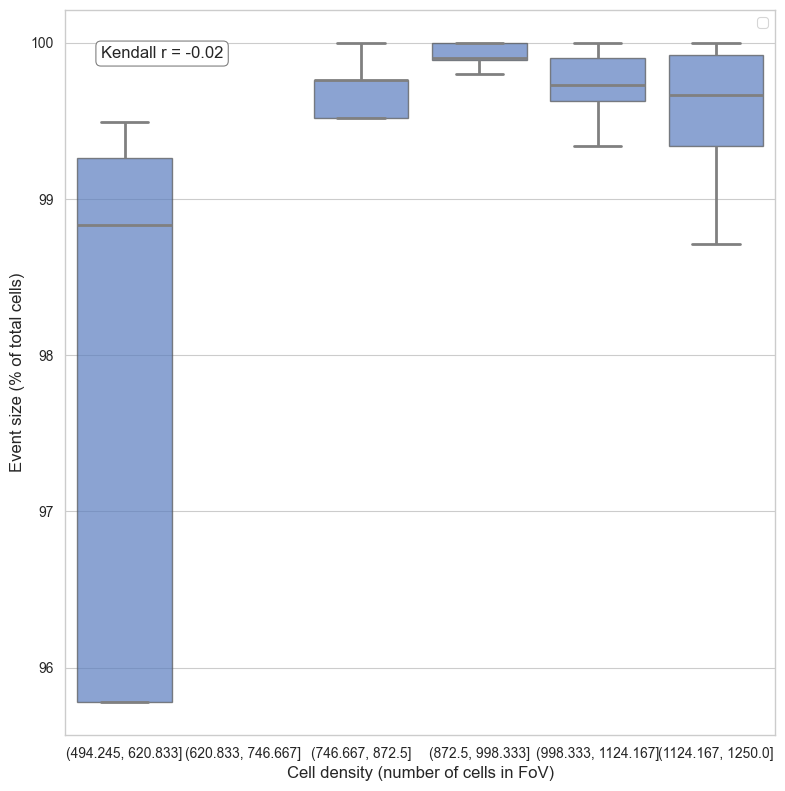

In [73]:
global_events["% of cells involved"] = (100 * global_events["Number of cells involved"] / global_events["Dataset cell density"]).round(2)

plot_xy_with_regression(
    data=global_events,
    x_col="Dataset cell density",
    y_col="% of cells involved",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Event size (% of total cells)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_12/control_event_size_by_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

### SE & CELL DENSITY

[2025-08-26 13:38:13] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_13\sequential_events_vs_cells.svg


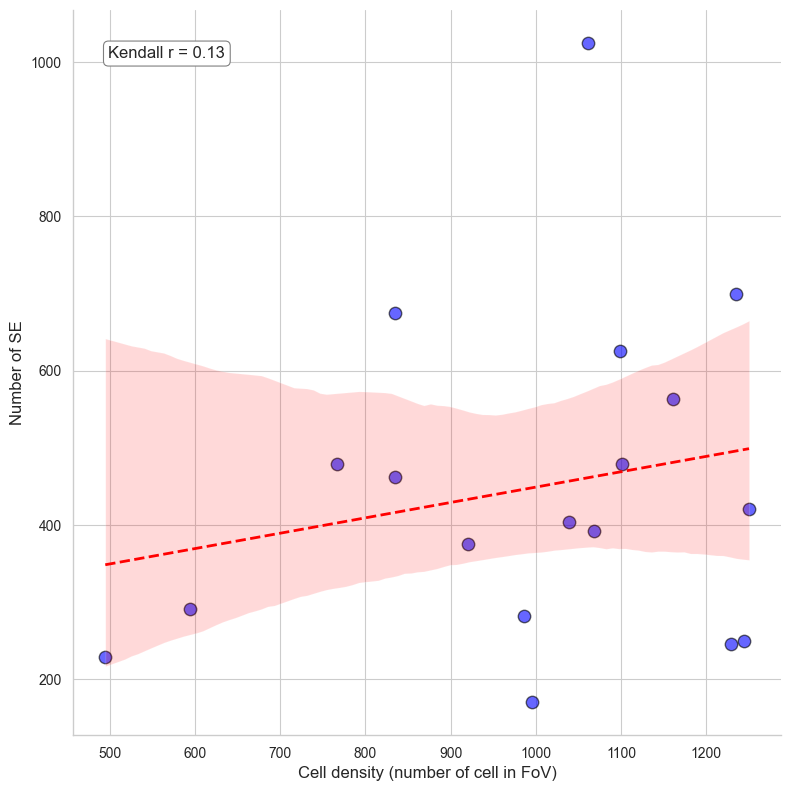

method   n  estimate   p_value    ci_low   ci_high  theilsen_slope  \
0  kendall_tau_b  18  0.125000  0.471089 -0.230844  0.463189        0.178756   
1       spearman  18  0.177686  0.480573 -0.324992  0.616824        0.178756   

   theilsen_slope_ci_low  theilsen_slope_ci_high  theilsen_intercept  
0              -0.385802                0.635135           224.80652  
1              -0.385802                0.635135           224.80652

In [74]:
plot_xy_with_regression(
    data=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of sequential events",
    xlabel= "Cell density (number of cell in FoV)",
    ylabel="Number of SE",
    corr_method="kendall",
    save_path=figure_path_ach / "figure_3_13/sequential_events_vs_cells.svg"
)

corr_nonparametric(
    df=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of sequential events",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

[2025-08-26 13:38:17] [INFO] calcium: plot_box_median_iqr_with_trend: removed 438/30450 outliers (-69, 149)
[2025-08-26 13:38:18] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_13\control_peaks_duration_by_sequential_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


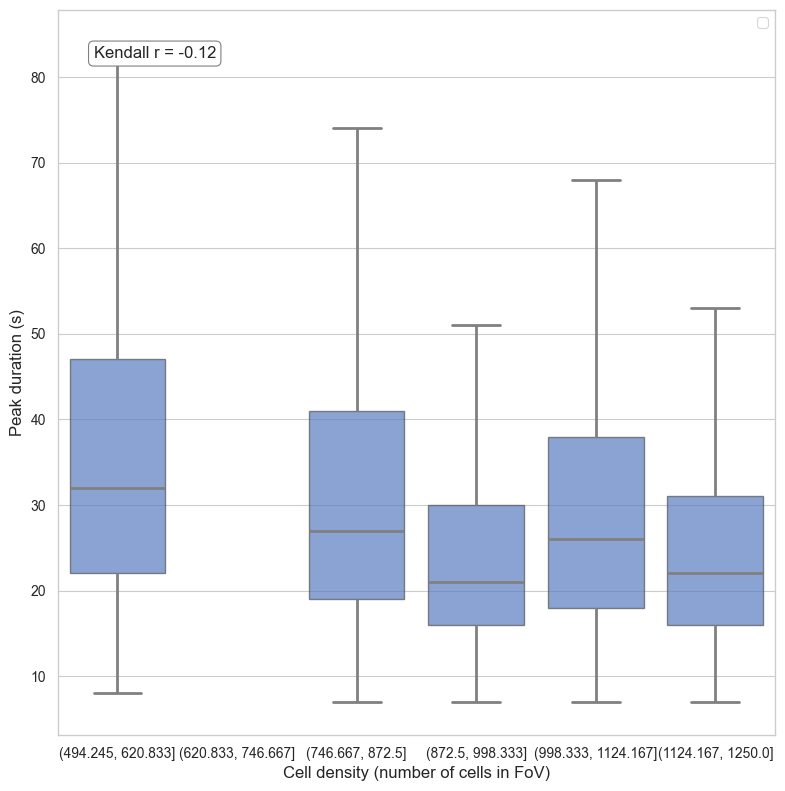

In [75]:
mapping_events_to_peaks = celldensity_events.loc[celldensity_events["Event type"] == "SequentialEvent", ["Event ID", "dataset"]]
subset_peaks_sequential_events = celldensity_peaks.merge(mapping_events_to_peaks, 
                                                     on=["Event ID", "dataset"], 
                                                     how="inner", 
                                                     validate="m:1")

plot_xy_with_regression(
    data=subset_peaks_sequential_events,
    x_col="Dataset cell density",
    y_col="Duration (s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak duration (s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_13/control_peaks_duration_by_sequential_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

[2025-08-26 13:38:21] [INFO] calcium: plot_box_median_iqr_with_trend: removed 807/30450 outliers (-78.3, 157)
[2025-08-26 13:38:21] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_13\control_peaks_prominence_by_sequential_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


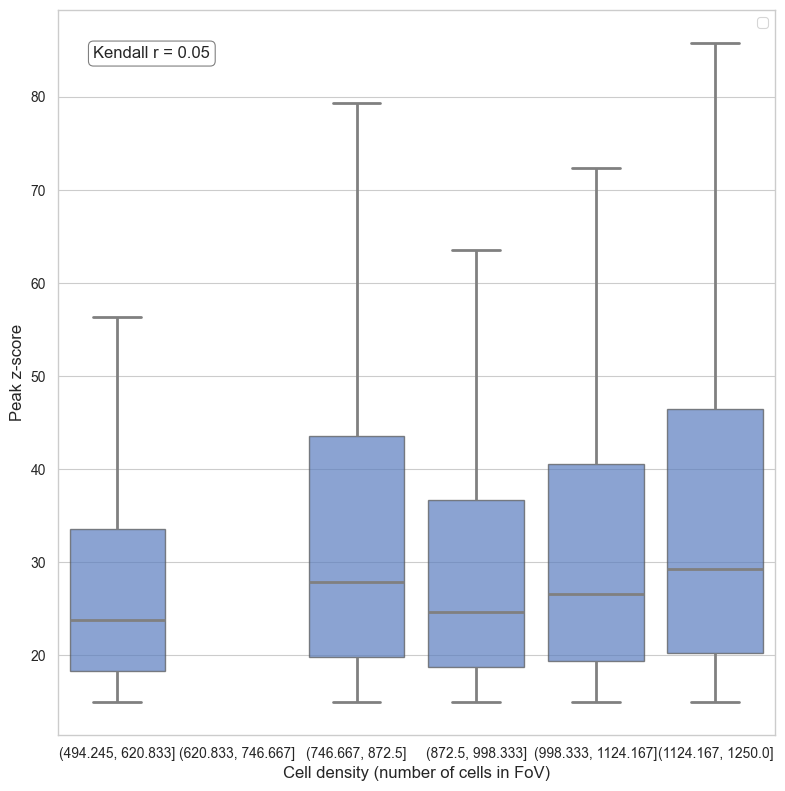

In [76]:
plot_xy_with_regression(
    data=subset_peaks_sequential_events,
    x_col="Dataset cell density",
    y_col="Prominence (noise std units)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak z-score",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_13/control_peaks_prominence_by_sequential_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

[2025-08-26 13:38:25] [INFO] calcium: plot_box_median_iqr_with_trend: removed 663/22380 outliers (-26.8, 40.4)
[2025-08-26 13:38:25] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_13\control_speed_by_sequential_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


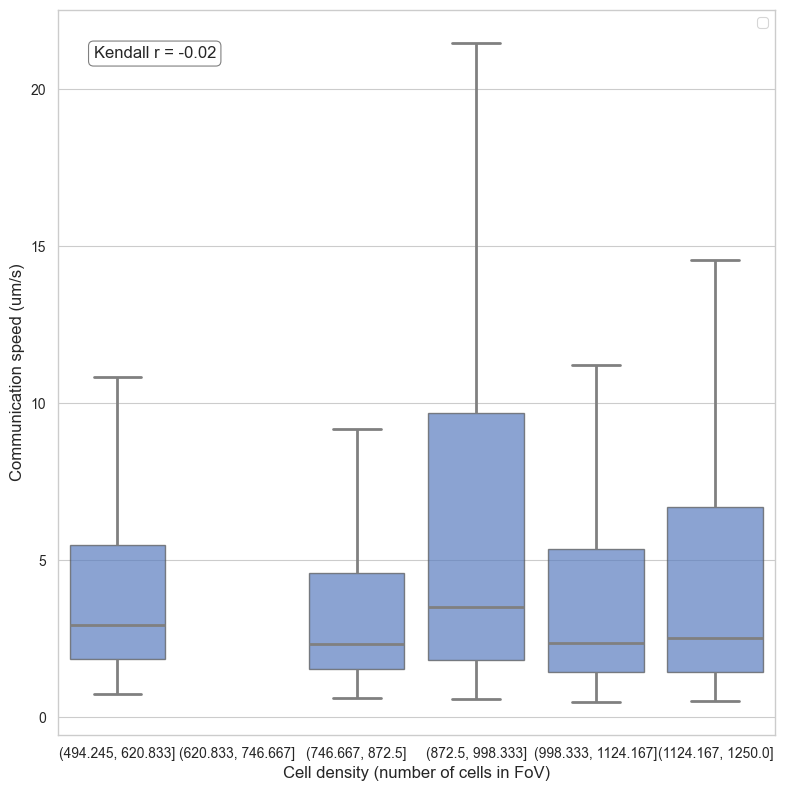

In [77]:
plot_xy_with_regression(
    data=celldensity_communications,
    x_col="Dataset cell density",
    y_col="Speed (um/s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Communication speed (um/s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_13/control_speed_by_sequential_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

### IE & CELL DENSITY

[2025-08-26 13:38:28] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_14\individual_events_corr.svg


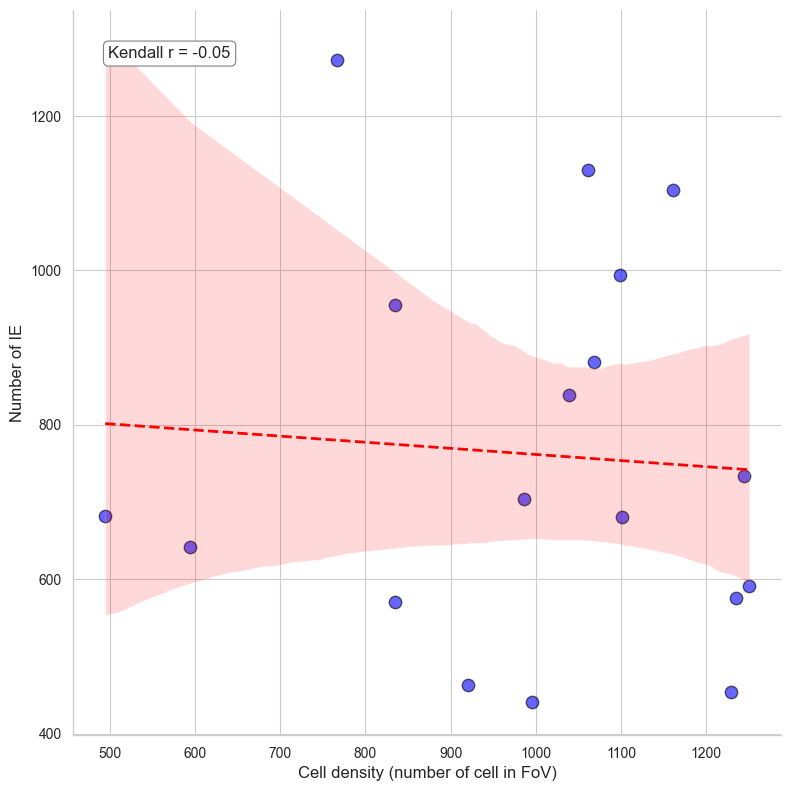

method   n  estimate   p_value    ci_low   ci_high  theilsen_slope  \
0  kendall_tau_b  18 -0.052459  0.761708 -0.343962  0.289878       -0.111747   
1       spearman  18 -0.075374  0.766275 -0.483260  0.400754       -0.111747   

   theilsen_slope_ci_low  theilsen_slope_ci_high  theilsen_intercept  
0              -0.840361                0.590551          810.334308  
1              -0.840361                0.590551          810.334308

In [78]:
plot_xy_with_regression(
    data=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of individual events",
    xlabel= "Cell density (number of cell in FoV)",
    ylabel="Number of IE",
    corr_method="kendall",
    save_path=figure_path_ach / "figure_3_14/individual_events_corr.svg",
)

corr_nonparametric(
    df=celldensity_experiments,
    x_col="Dataset cell density",
    y_col="Number of individual events",
    methods=["spearman","kendall"],
    alpha=0.05,
    n_boot_ci=1000
)

[2025-08-26 13:38:32] [INFO] calcium: plot_box_median_iqr_with_trend: removed 254/13713 outliers (-90, 176)
[2025-08-26 13:38:32] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_14\control_peaks_duration_by_individual_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


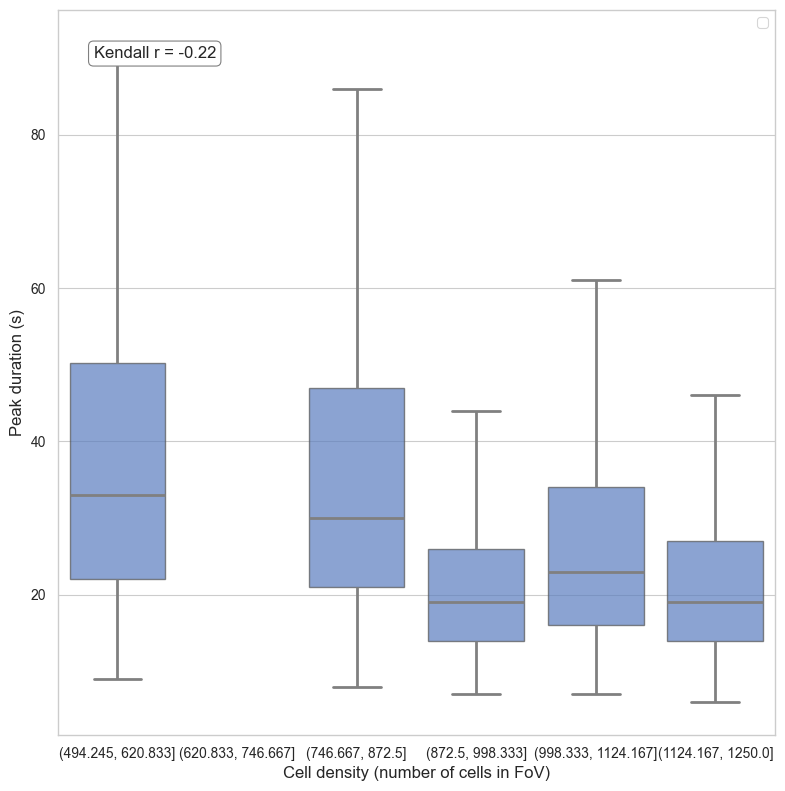

In [79]:
plot_xy_with_regression(
    data=celldensity_peaks[celldensity_peaks["In event"] == "individual"],
    x_col="Dataset cell density",
    y_col="Duration (s)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak duration (s)",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_14/control_peaks_duration_by_individual_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)

[2025-08-26 13:38:35] [INFO] calcium: plot_box_median_iqr_with_trend: removed 511/13713 outliers (-52.1, 113)
[2025-08-26 13:38:35] [INFO] calcium: Saved figure to C:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Report\Figures\Chapter_4\figure_3_14\control_peaks_prominence_by_individual_event.svg


c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:1846: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


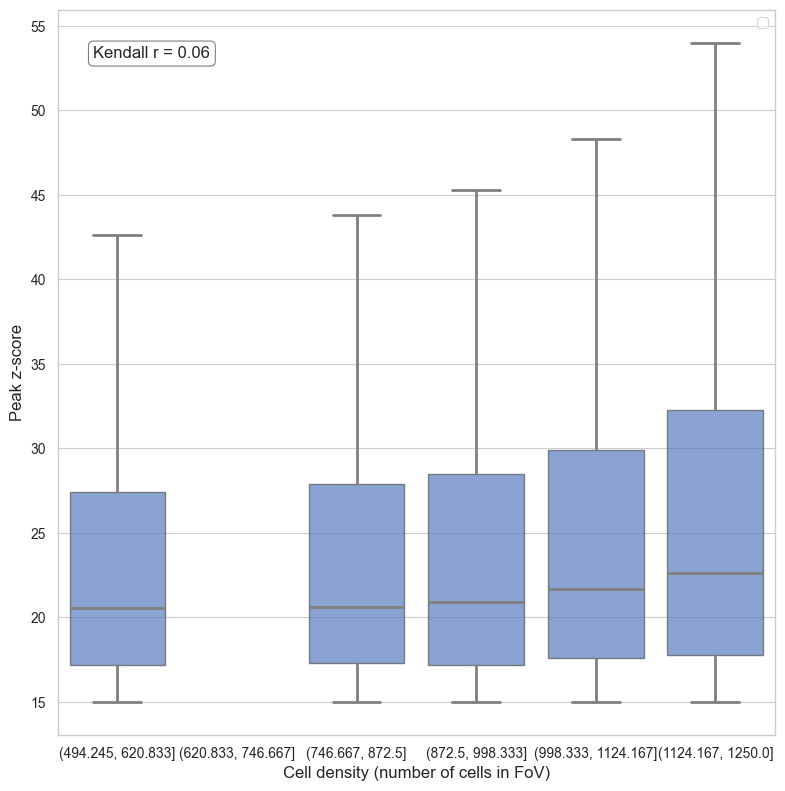

In [80]:

plot_xy_with_regression(
    data=celldensity_peaks[celldensity_peaks["In event"] == "individual"],
    x_col="Dataset cell density",
    y_col="Prominence (noise std units)",
    xlabel="Cell density (number of cells in FoV)",
    ylabel="Peak z-score",
    binning="fixed",
    n_bins=6,
    filter_outliers=True,
    outliers_bounds=(3, 3),
    outliers_bygroup="Dataset cell density",
    save_path=figure_path_ach / "figure_3_14/control_peaks_prominence_by_individual_event.svg",
    show_trend_line=False,
    corr_method="kendall"
)